# Kaggle team name: AI papi!

| Team Member                | StudentID  |
|----------------------------|------------|
| Per-Christian Færøvik Grieg | StudentID  |
| Syver Verlo Nes            | StudentID  |
| Henning Olweus             | 527221  |

- **Adde dependencies, i tilfelle koden ikke kjører?**
- **pip-install dependencies det som trengs for å kjøre?**
- **Activate viritual enviroment?**

# Possible deductable points (tags)
In order to make it easier to cross off that the ceckpoints for deducted points have been included in the notebook, we have left **tags** where this has been done. Using the search function you can search for the tag in the table below to find places in the notebook where the requirements for the corresponding deduction point has been included. The same tag can be found more than once in the notebook. Some of the EDA, such as correlation heatmaps, can be found in the preprocessing section, as it was easier to do after turning it into hourly data.


| Tag | Possible Deduction Checkpoints |
|-----|--------------------------------|
|SDK123    | Search domain knowledge |
|Intu123     | Check if the data is intuitive |
|UG123     | Understand how the data was generated |
|ExFeat123     | Explore individual features |
|ExPGFeat123     | Explore pairs and groups of features |
|ClFeat123     | Clean up features |
|Pred123     | Only one type of predictor is used (-3). |
|FeatEng123     | no feature engineering (-3). |
|Modinter123     | no model interpretation (-3).  |


# **Structure of long notebook**
---
## **1. EDA**
## **2. Preprocessing**
## **3. Simple ML models**
## **4. AutoML models**
---



# **1. Exploratory Data Analysis (EDA)**
---

### Search for domain knowledge  (SDK123)
Before diving deeper into the data and ML models, we would like to understand what is the main driver of solar production. This can help us better understand the data, the individual features and the importance of them. This we can do by reading about what features or weather conditions has an effect on solar production. We of course have the obvious ones like sunlight  and clear sky, but diving deeper into other conditions can be helpfull when diving into our EDA. 

After some research, we found the following about what affects solar power production the most;

- Latitude: Systems installed at higher latitudes will yield lower production numbers solar-panel-productionthroughout the year due to the tilt of the earth as it spins on its axis. 
- Solar Panel Placement can have an impact (faced south could be beneficial etc.)
- The reflective ability of snow improves irradiance, but can at the same time cover the panels.
- Solar panels are more efficient in the cold
- Angle of the solar power could also play a role, and the angle of the sun
- Shading does also 
- Other climate conditions can also affect irradiance

**In short, what we found is that the most important part for efficient solar production is what affects irradiance, such as climate conditions (covered by snow, cloudy etc.) and placement of the solar panel. Furthermore conditions that affect the efficiency of the panels themselves is important, such as temperature. With this in mind our initial thought was therefore that making one seperate model for A, B and C would be the way to go. The seasonality was pretty intuitive, where production is lower during the night, and in  Norway was lower in the winter (shorter days), and higher in the summer (longer days)**

**Sources:**

(https://www.dynamicslr.com/7-factors-that-impact-your-solar-panel-system-efficiency/)
(https://www.solar.com/learn/solar-panel-production-factors/)
(https://www.trace-software.com/which-are-the-factors-that-affect-solar-panels-efficiency/)
(https://www.eco-greenenergy.com/what-factors-affect-solar-pv-system-efficiency/)


Based on our reading, we decided to structure our findings in the table below. The "low", "moderate" and "high" columns is our hypothesis on the impact certain features will have on predicting solar porduction our research, also reflecting their impact on production. It is a mix of information we have read, as well as our own intuition. It will be interesting to look if this hypothesis holds when we dive deeper into the data and models. 

| Feature Name                         | Low       | Moderate  | High      | Reasoning |
|--------------------------------------|-----------|-----------|-----------|-----------|
| `absolute_humidity_2m:gm3`           |           | x         |           | Can have an effect on cloud formation and therefore an inderectly effect on solar irradiance. |
| `air_density_2m:kgm3`                |           | x         |           | Could maybe or slightly influence the efficiency of solar panels. |
| `ceiling_height_agl:m`               |           | x         |           | Can affect sunlight penetration. |
| `clear_sky_energy_1h:J`              |           |           | x         | Directly related to solar energy under clear sky conditions. |
| `clear_sky_rad:W`                    |           |           | x         | Important as it represents the potential radiation under clear sky |
| `cloud_base_agl:m`                   |           | x         |           | Potenionally effects the solar radiation reaching the ground. |
| `dew_or_rime:idx`                    |           | x         |           | Can indicate moisture levels, which in turn may correlate with cloud cover. |
| `dew_point_2m:K`                     |           | x         |           | Can from our understanding be related to cloud formation, which in turn can block sunlight. |
| `diffuse_rad:W`                      |           | x         |           | Diffuse radiation can still be absorbed by the solar panels, affecting our predictions. |
| `diffuse_rad_1h:J`                   |           | x         |           | Same as row above, but could maybe tell us more because it gives us it over time. |
| `direct_rad:W`                       |           |           | x         | We see this as one of the most important features for solar energy production, and it therfore affects our predictions significantly. |
| `direct_rad_1h:J`                    |           |           | x         | Same as above . |
| `effective_cloud_cover:p`            |           | x          |          | Pretty important as it can directly impacts the amount of sunlight reaching the solar panels. |
| `elevation:m`                        |           | x         |           | Could have some infuence, as it can tell something avout weather patterns and sunlight exposure. |
| `fresh_snow_12h:cm`                  |          | x          |           |Longer duration of snowfall can potentionally have a strong effect on solar production, hence our predictions. |
| `fresh_snow_1h:cm`                   | x         |           |           | Short-duration snow can affect predictions but less so than all-day events. |
| `fresh_snow_24h:cm`                  |          | x          |           | Longer duration of snowfall can potentionally have a strong effect on solar production, hence our predictions. |
| `fresh_snow_3h:cm`                   | x         |           |           | Short-duration snow can affect predictions but less so than all-day events. |
| `fresh_snow_6h:cm`                   |          | x          |           | Longer duration of snowfall can potentionally have a strong effect on solar production, hence our predictions. |
| `is_day:idx`                         |           |x           |          | Is day gives is important as it says something about the potential for solar production, foundational for our prediction. |
| `is_in_shadow:idx`                   |          | x       |           | Indicates potential shading which is important for accurate predictions. |
| `msl_pressure:hPa`                   | x          |          |           | Pressure can say something about weather patterns that could affect solar irradiance. |
| `precip_5min:mm`                     |          |x           |           | As we see it, precipitation can both clean or cover the solar panels, impacting short-term predictions. |
| `precip_type_5min:idx`               |          |x           |           | Same as above. |
| `pressure_100m:hPa`                  |           | x         |           | Pressure at altitude can indicate weather trends, indirectly affecting predictions. |
| `pressure_50m:hPa`                   |           | x         |           | Can tell us something about the weather and as well as weather to comeffects weather trend analysis for prediction. |
| `prob_rime:p`                        | x         |           |           | Rime could affect surface conditions of panels, impacting predictions

In [63]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import display, HTML

%matplotlib inline

In [2]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

In [3]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')


In [4]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

In [5]:
x_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
x_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
x_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

In [14]:
# Merge x_train observed and x_train_estimated
x_train_a = pd.concat([X_train_observed_a,x_train_estimated_a])
x_train_b = pd.concat([X_train_observed_b,x_train_estimated_b])
x_train_c = pd.concat([X_train_observed_c,x_train_estimated_c])

In [67]:
display(train_a)
display(train_b)
display(train_c)


,time,pv_measurement
0,2019-06-02 22:00:00,0.00
1,2019-06-02 23:00:00,0.00
2,2019-06-03 00:00:00,0.00
3,2019-06-03 01:00:00,0.00
4,2019-06-03 02:00:00,19.36
...,...,...
34080,2023-04-30 19:00:00,9.02
34081,2023-04-30 20:00:00,0.00
34082,2023-04-30 21:00:00,0.00
34083,2023-04-30 22:00:00,0.00


,time,pv_measurement
0,2018-12-31 23:00:00,0.000000
1,2019-01-01 00:00:00,0.000000
2,2019-01-01 01:00:00,0.000000
3,2019-01-01 02:00:00,0.000000
4,2019-01-01 03:00:00,0.000000
...,...,...
32843,2023-04-30 19:00:00,0.828587
32844,2023-04-30 20:00:00,-0.000000
32845,2023-04-30 21:00:00,-0.000000
32846,2023-04-30 22:00:00,-0.000000


,time,pv_measurement
0,2018-12-31 23:00:00,NaN
1,2019-01-01 00:00:00,NaN
2,2019-01-01 01:00:00,NaN
3,2019-01-01 02:00:00,NaN
4,2019-01-01 03:00:00,NaN
...,...,...
32150,2023-04-30 19:00:00,50.96
32151,2023-04-30 20:00:00,2.94
32152,2023-04-30 21:00:00,0.00
32153,2023-04-30 22:00:00,-0.00


We see that the targets, or "pv_measurement", are given hourly. This represent the  

In [ ]:
#Sweet wiz --> looking at each feature
#Correlation between each

## **Understanding how the data was generated:** [UG123]
- By looking at the raw data, we get a brief understanding of how it was generated and what challenges this may impose:
    - We see that the pv_measurements in train_a,b,c are taken at an hourly basis, while the weather data is measured every fifteen minutes. We have to convert this to match the two datasets.
    - We can tell that the forecasted weather data is created once every day, and only forecasts the next day.
    - We also see that some of the data is missing, indicating a malfunction in some of the equipment. To solve this we could either remove rows/columns, impute the data or leave it be.

In [22]:
x_train_estimated_a.head(2)

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,...,340.799011,-38.466999,0.0,284.700012,100.0,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,...,345.451996,-38.955002,0.0,284.700012,100.0,23604.099609,0.7,-0.4,0.7,-0.0


In [18]:
train_a.head(2)

,time,pv_measurement
0,2019-06-02 22:00:00,0.0
1,2019-06-02 23:00:00,0.0


In [20]:
x_train_a.isna().sum()

date_forecast                          0
absolute_humidity_2m:gm3               0
air_density_2m:kgm3                    0
ceiling_height_agl:m               26166
clear_sky_energy_1h:J                  0
clear_sky_rad:W                        0
cloud_base_agl:m                   10160
dew_or_rime:idx                        0
dew_point_2m:K                         0
diffuse_rad:W                          0
diffuse_rad_1h:J                       0
direct_rad:W                           0
direct_rad_1h:J                        0
effective_cloud_cover:p                0
elevation:m                            0
fresh_snow_12h:cm                      0
fresh_snow_1h:cm                       0
fresh_snow_24h:cm                      0
fresh_snow_3h:cm                       0
fresh_snow_6h:cm                       0
is_day:idx                             0
is_in_shadow:idx                       0
msl_pressure:hPa                       0
precip_5min:mm                         0
precip_type_5min

## Analysis of Target variable  - Looking at PV_measurement [Intu123]
- By plotting the pv_measurements, we can see that the data is mostly intuitive. 
    - Measurements are higher during daytime than during nighttime
    - Measurements are higher in summer than winter
    - Measurements vary a great deal, which is expected since weather can be unpredictable.
- However we also noticed:
    - There are longer periods with measurements = 0.
    - There are periods where the data is missing

In [18]:
# Time-Series plot of PV_measurement 
def solar_prod_plot(y_train, years_per_plot = 5):
    df = y_train.copy()
    # Get the unique years
    unique_years = df['time'].dt.year.unique()

    # Loop over the years in chunks
    for i in range(0, len(unique_years), years_per_plot):
        subset_years = unique_years[i:i+years_per_plot]

        # Filter the dataframe for the current chunk of years
        subset_df = df[df['time'].dt.year.isin(subset_years)]

        plt.figure(figsize=(15, 6))
        plt.plot(subset_df['time'], subset_df['pv_measurement'])

        title = f"Solar Power Production for {subset_years[0]}"
        if len(subset_years) > 1:
            title += f" to {subset_years[-1]}"

        plt.title(title)
        plt.xlabel("Time")
        plt.ylabel("PV Measurement")
        plt.show();

        
def nan_vals(y_train):
    return y_train[y_train['pv_measurement'].isna()]

def remove_constant_intervals(y_train, low_thresh, upp_thresh):
    """
    Identify and remove intervals of constant PV readings that exceed a specified duration. 
    Constant readings may indicate sensor malfunctions or data logging issues.
    
    Parameters:
    ----------
    y_train : pd.DataFrame
        Dataframe containing the time-series data of solar power production.
    threshold : int
        The minimum duration required for an interval to be considered for removal.
        
    Returns:
    -------
    pd.DataFrame
        The input dataframe with intervals of constant readings (exceeding the duration threshold) removed.
    """
    df = y_train.copy()
    
    # Calculate the difference in production values
    df['diff'] = df['pv_measurement'].diff()

    # Identify where the difference is zero
    df['zero_diff'] = df['diff'].abs() < 1e-5

    # Identify groups of consecutive zero differences
    df['group'] = (df['zero_diff'] != df['zero_diff'].shift()).cumsum()

    # Filter out only the groups with consecutive zero differences
    constant_intervals = df[df['zero_diff']].groupby('group').agg(start=('time', 'min'), 
                                                                  end=('time', 'max'),
                                                                  duration=('time', 'size'))
    
    # Filter intervals based on the threshold
    interval_df_thresh = constant_intervals[(constant_intervals['duration'] > low_thresh) & (constant_intervals['duration'] <upp_thresh)]
    
    # Remove rows from the main dataframe that fall within these intervals
    for _, row in interval_df_thresh.iterrows():
        start_time, end_time = row['start'], row['end']
        df = df[(df['time'] < start_time) | (df['time'] > end_time)]
    
    # Drop the added columns used for calculations
    df.drop(columns=['diff', 'zero_diff', 'group'], inplace=True)
    
    return df, constant_intervals


**Plotting 1 year at a time**

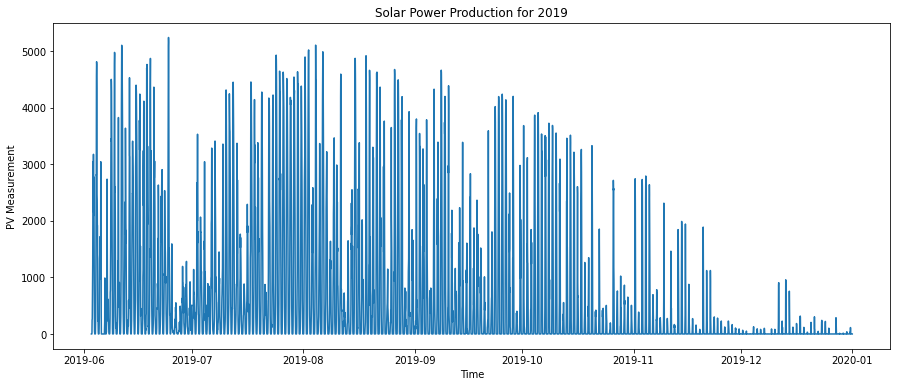

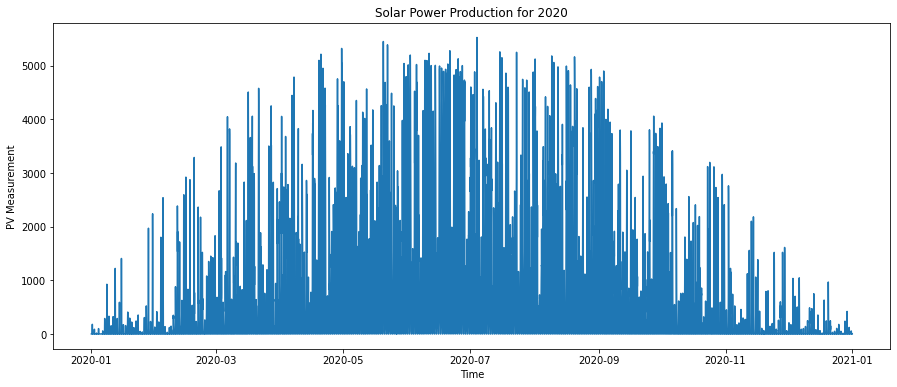

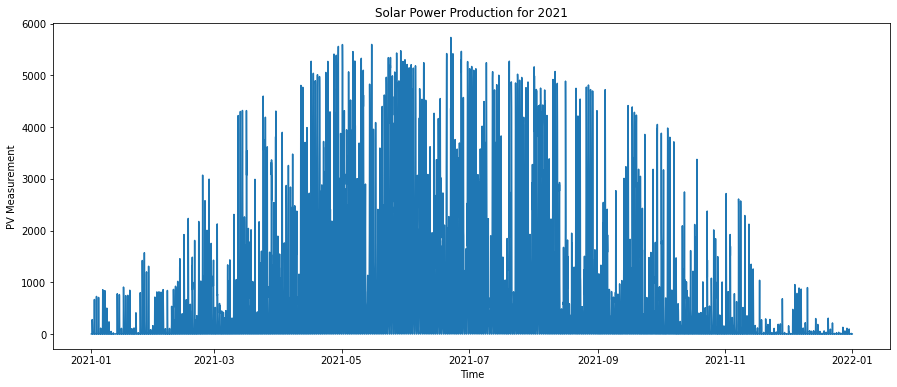

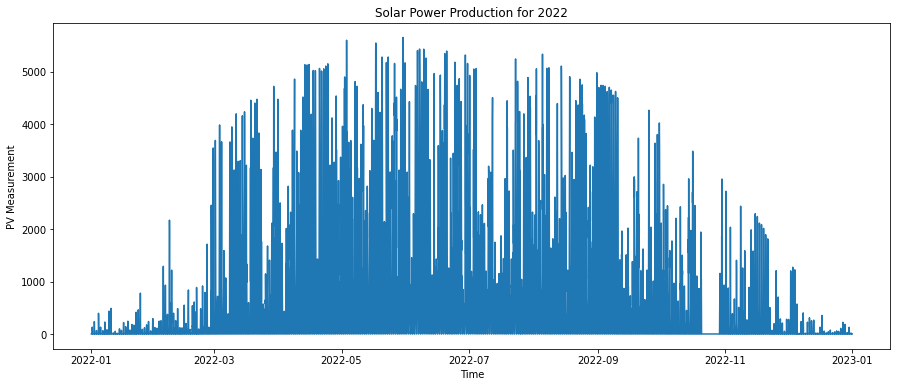

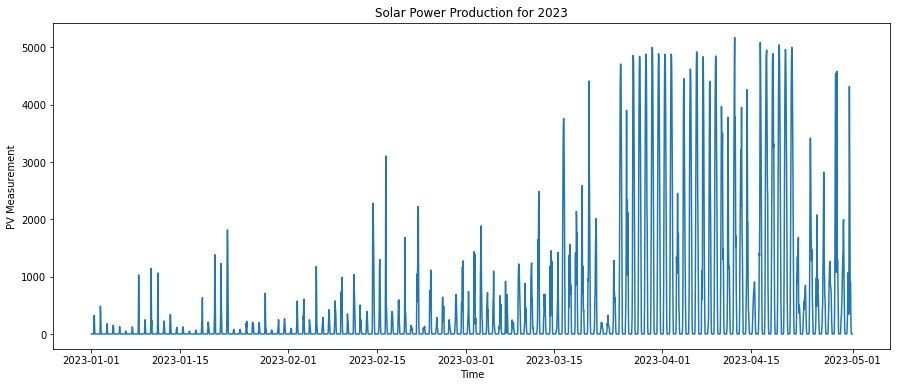

In [4]:
solar_prod_plot(train_a,1)

(Intu123)
In our domain knowledge search we discussed that the production data should have a yearly seasonality. This seasonality should show a peak in the summer months, and less production in the winter months, due to a shorter period of daylight. This corresponds well with the plots above, and the data is therefore intuitive. Lookin at the plots for b and c below, we can see the same:


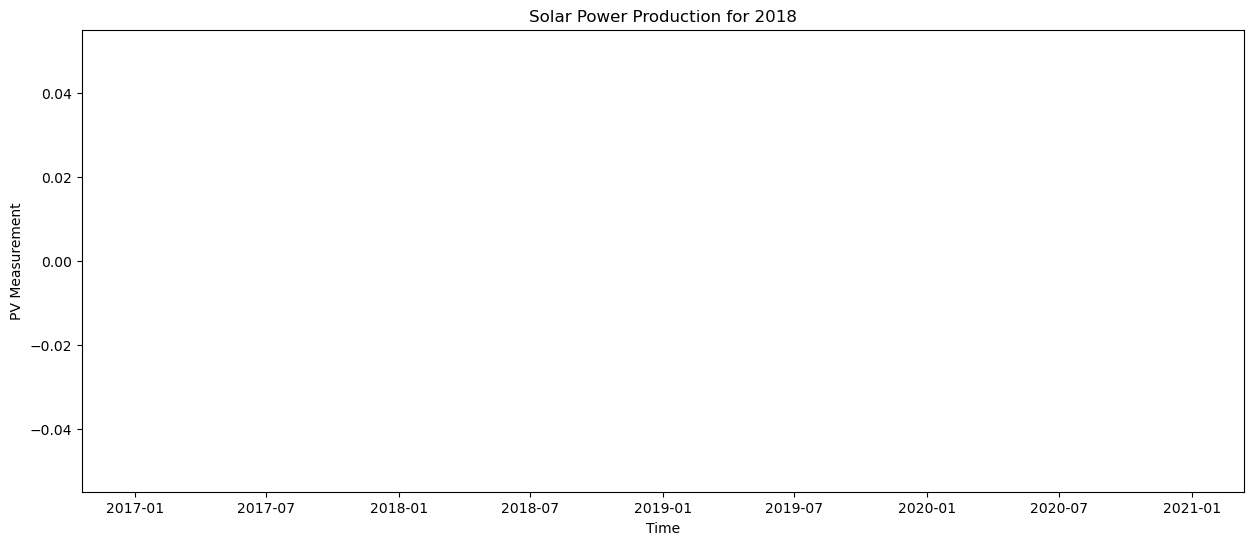

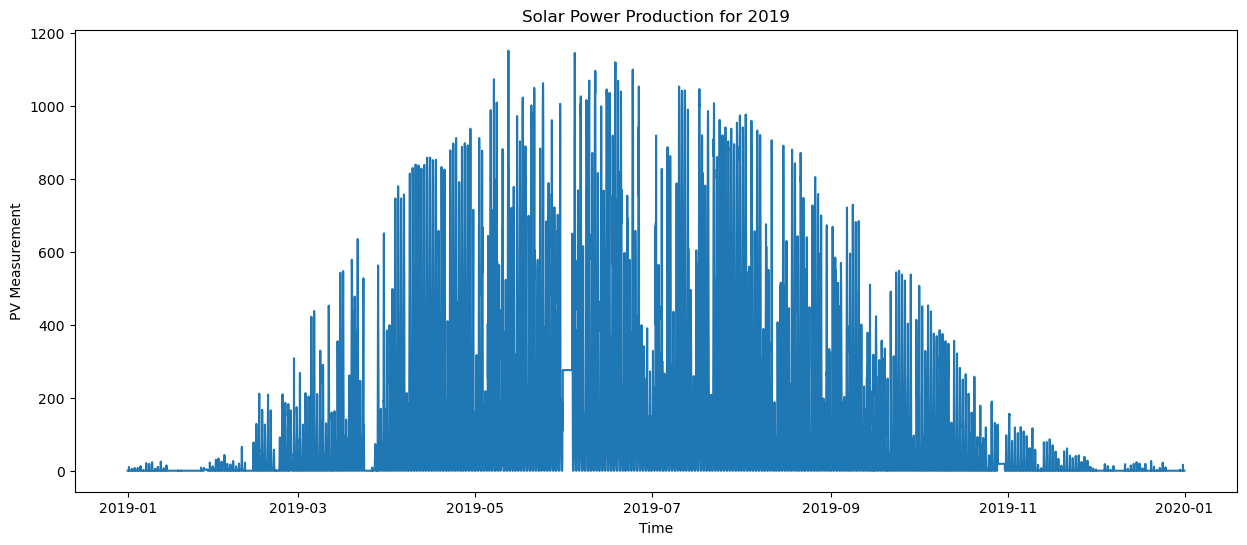

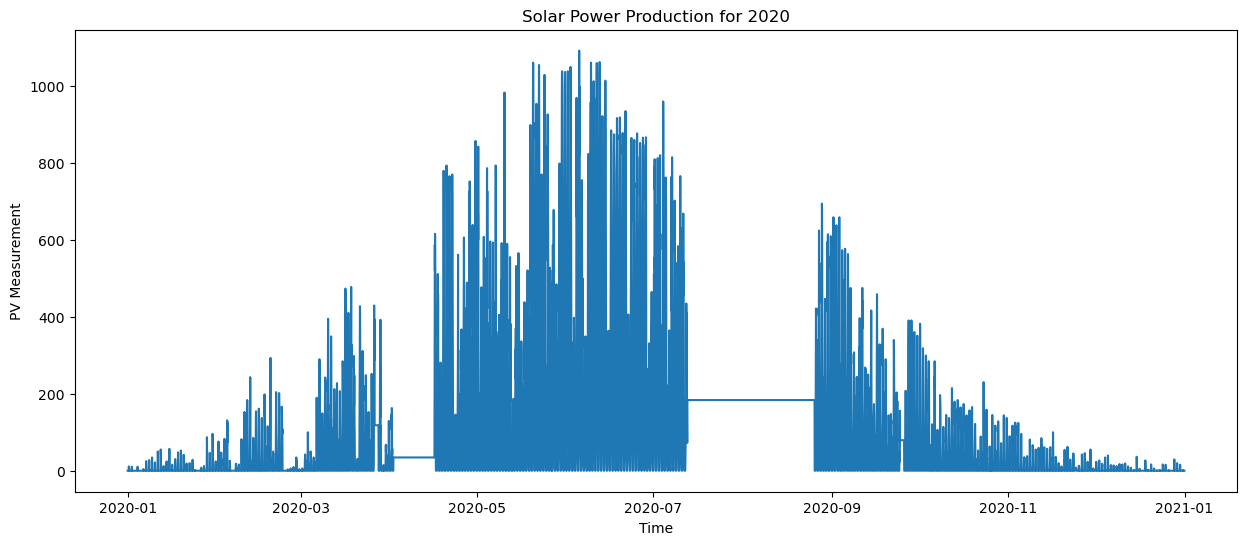

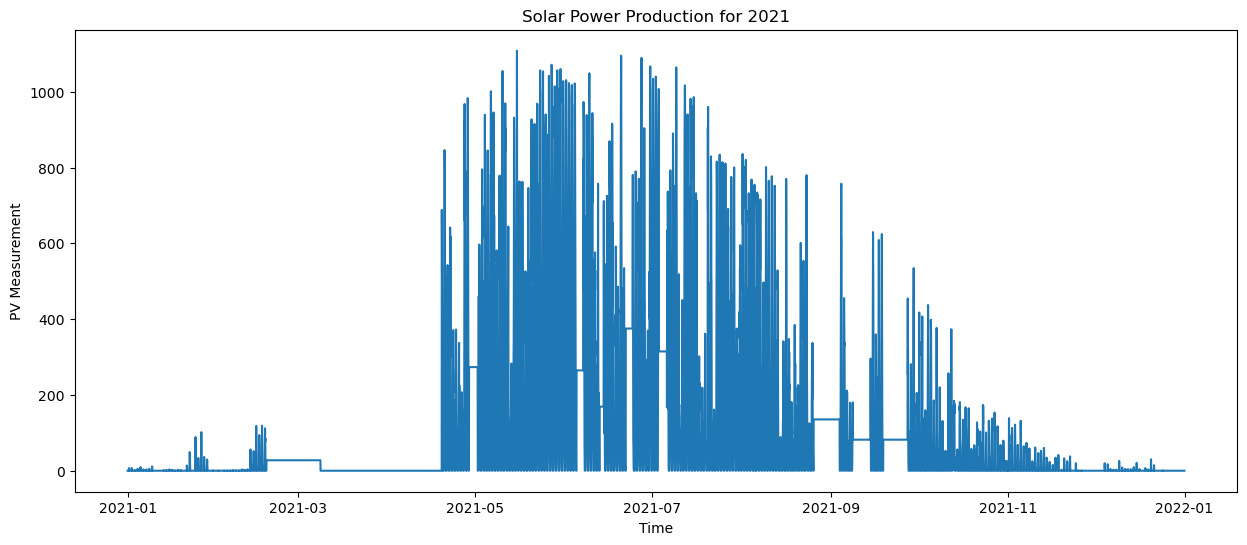

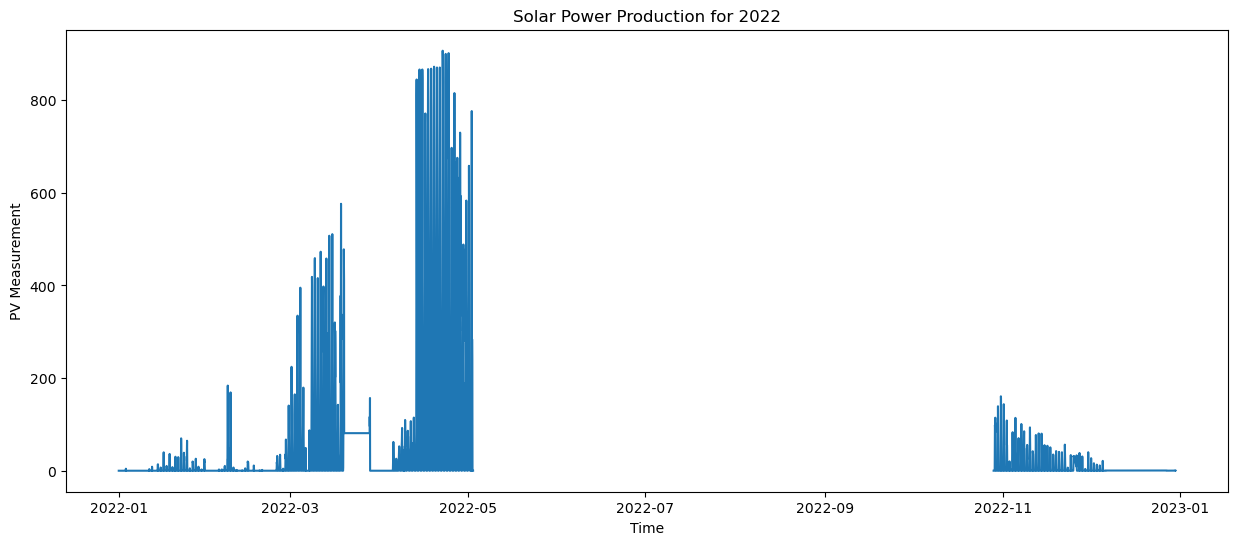

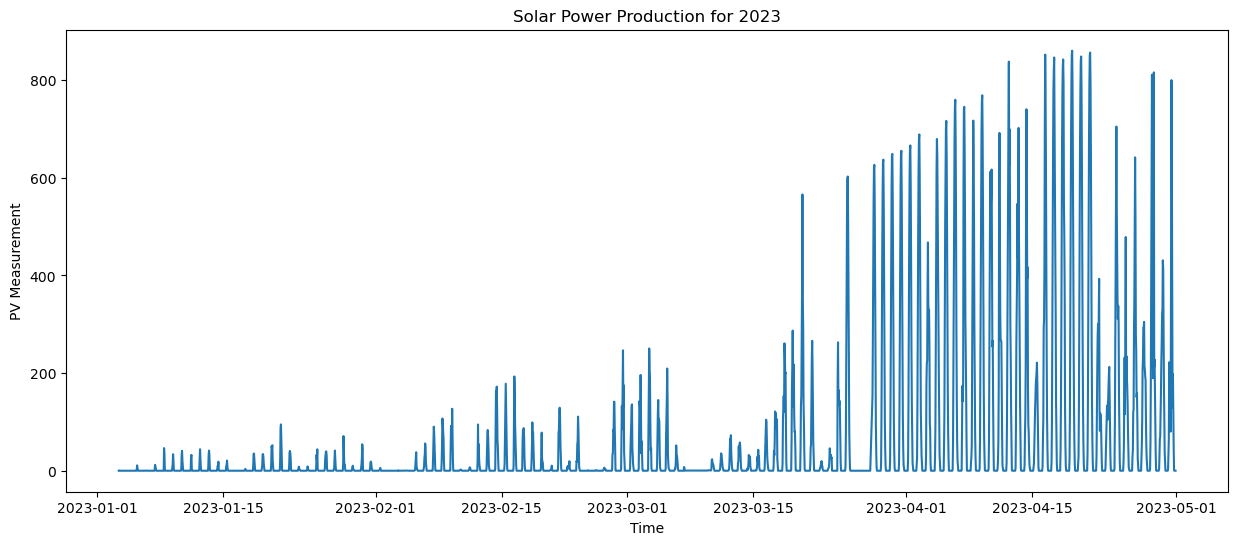

In [19]:
solar_prod_plot(train_b,1)

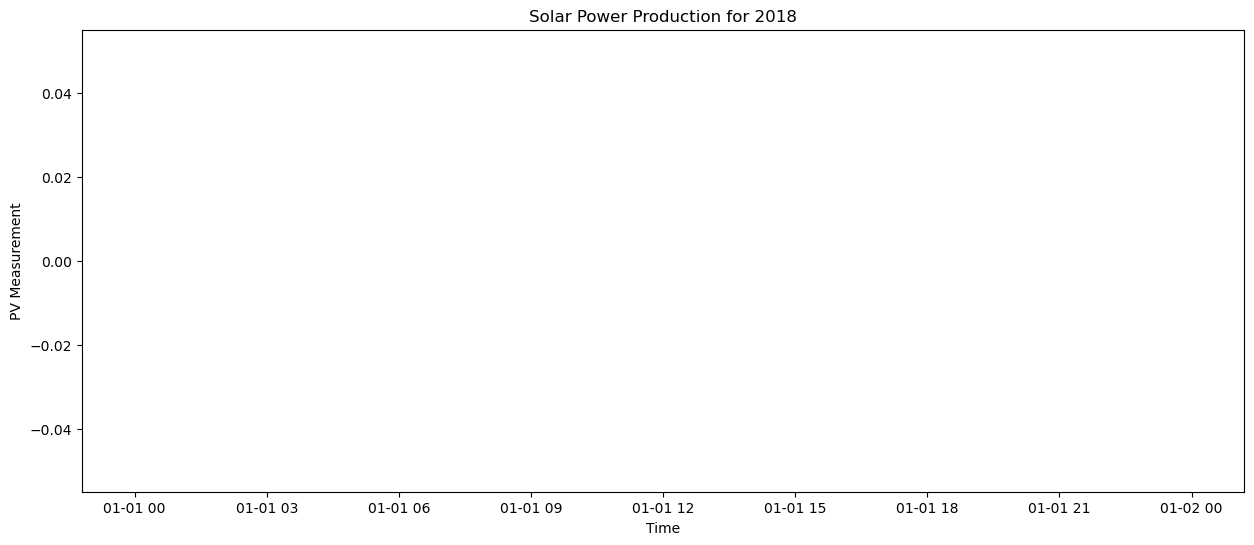

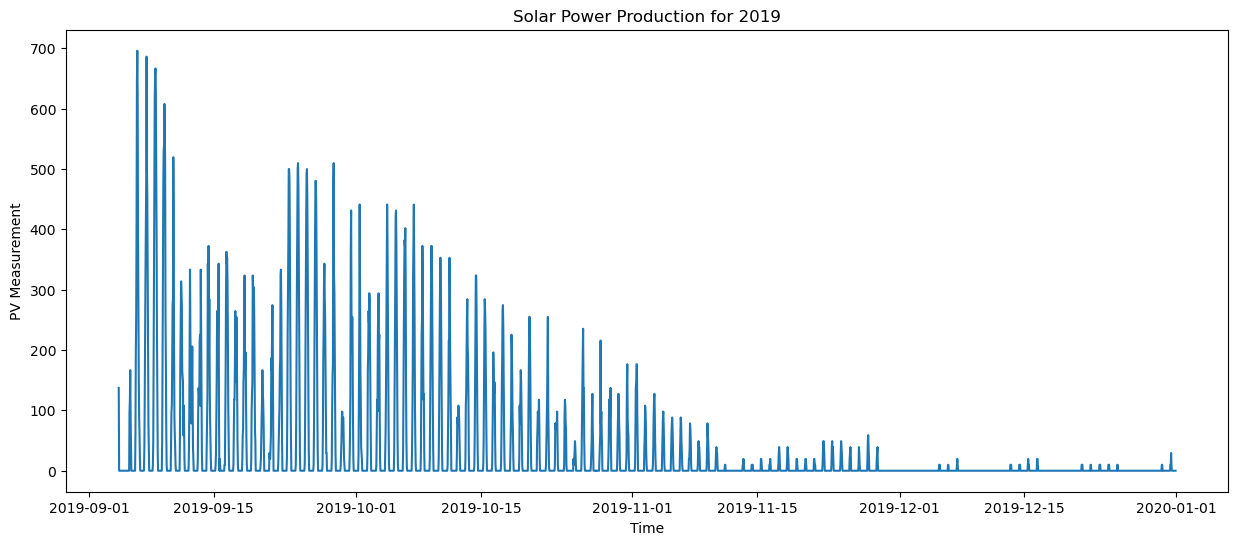

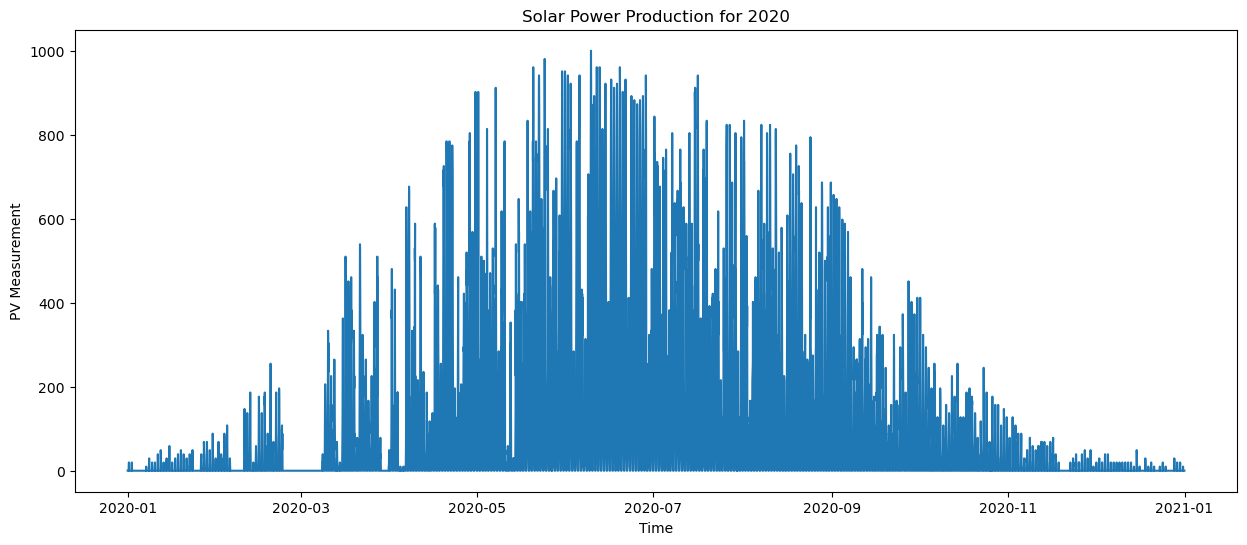

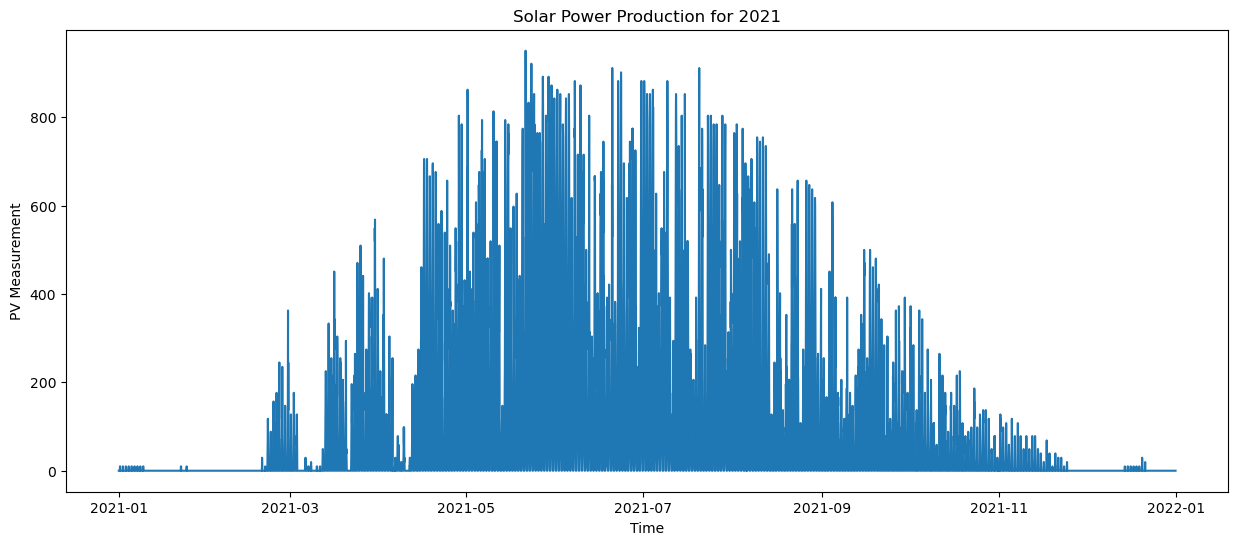

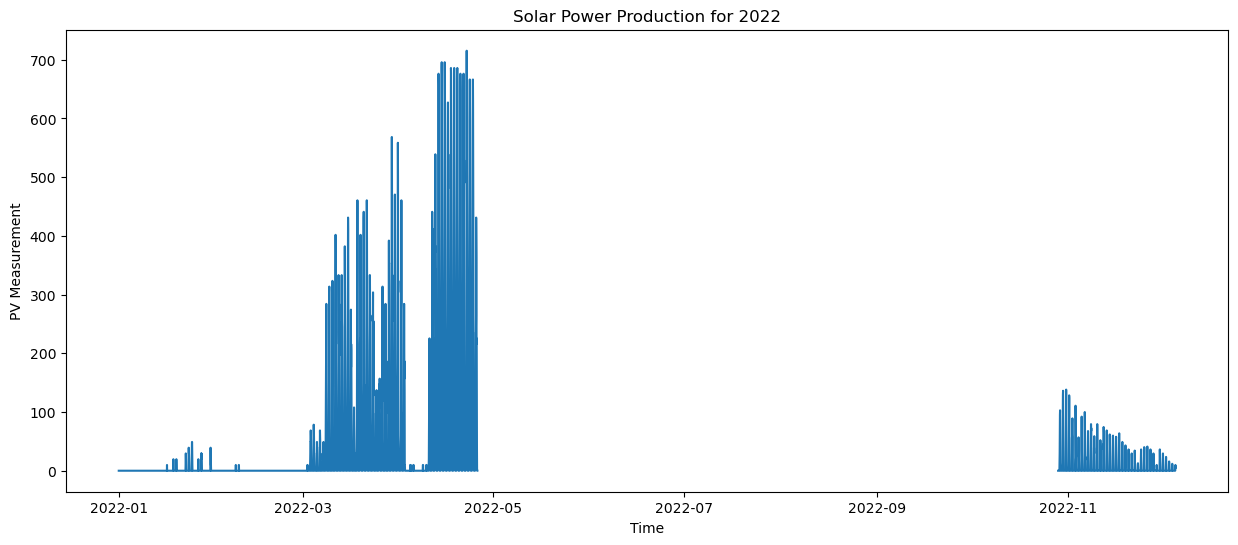

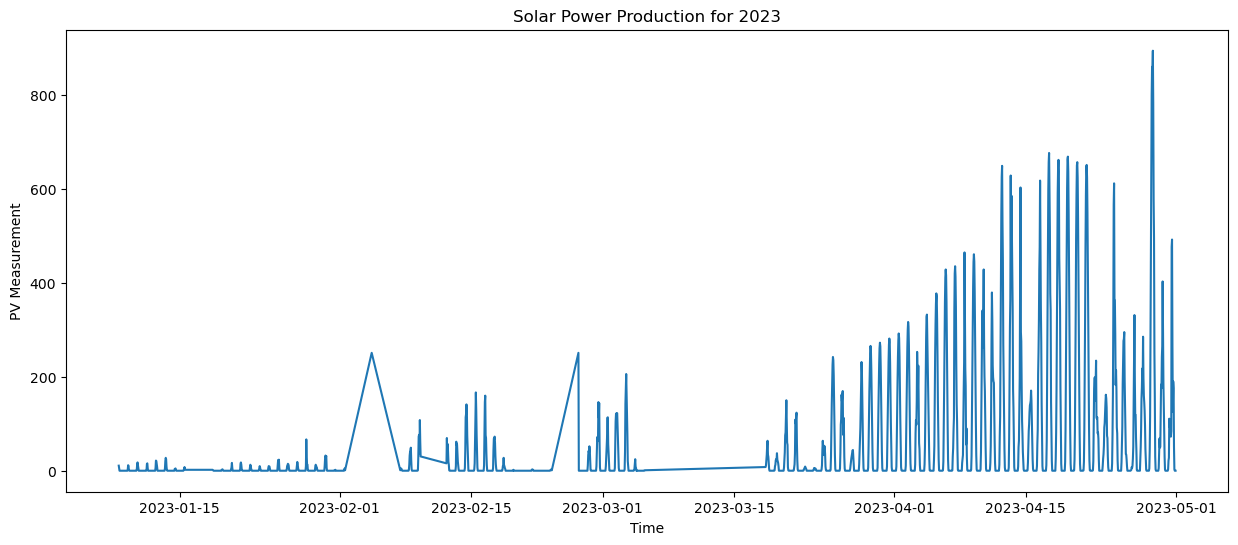

In [20]:
solar_prod_plot(train_c,1)

In [ ]:
#Removed all constant values with duration > 24 hours
#-> Resulted in very poor model performance Got a public score of 370 on kaggle

#Remove rows in groups of constant values, where duration of constant measurements is > 1 day (24 hours)
#y_train_a_filtered, const_interval_a = remove_constant_intervals(y_train_a,24,10**6)

#update X_train_a by removing coresponding rows that have been filtered here
#X_train_a, y_train_a = align_X_y(X_train_a, y_train_a_filtered)

#Remove rows in groups of constant values, where duration of constant measurements is > 1 day (24 hours)
#y_train_b_filtered, const_interval_b = remove_constant_intervals(y_train_b,24,10**6)

#update X_train_a by removing coresponding rows that have been filtered here
#X_train_b, y_train_b = align_X_y(X_train_b, y_train_b_filtered)

#Remove rows in groups of constant values, where duration of constant measurements is > 1 day (24 hours)
#y_train_c_filtered, const_interval_c = remove_constant_intervals(y_train_c,24,10**6)

#update X_train_a by removing coresponding rows that have been filtered here
#X_train_c, y_train_c = align_X_y(X_train_c, y_train_c_filtered)

## Analysis of Decision Variables - Weather featueres
1. Look at each feature isolated (missing and supsicious values) 
2. Look at features vs solar power production (how can we best capture the relationships in our model?)

In [13]:
import seaborn
def plot_feature(feature_name,seaborn_style = True):
    if seaborn_style:
        sns.set_style("whitegrid")
    else:
        seaborn.reset_defaults()
    fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
    x_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
    X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

    X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
    x_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
    X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

    X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
    x_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
    X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')

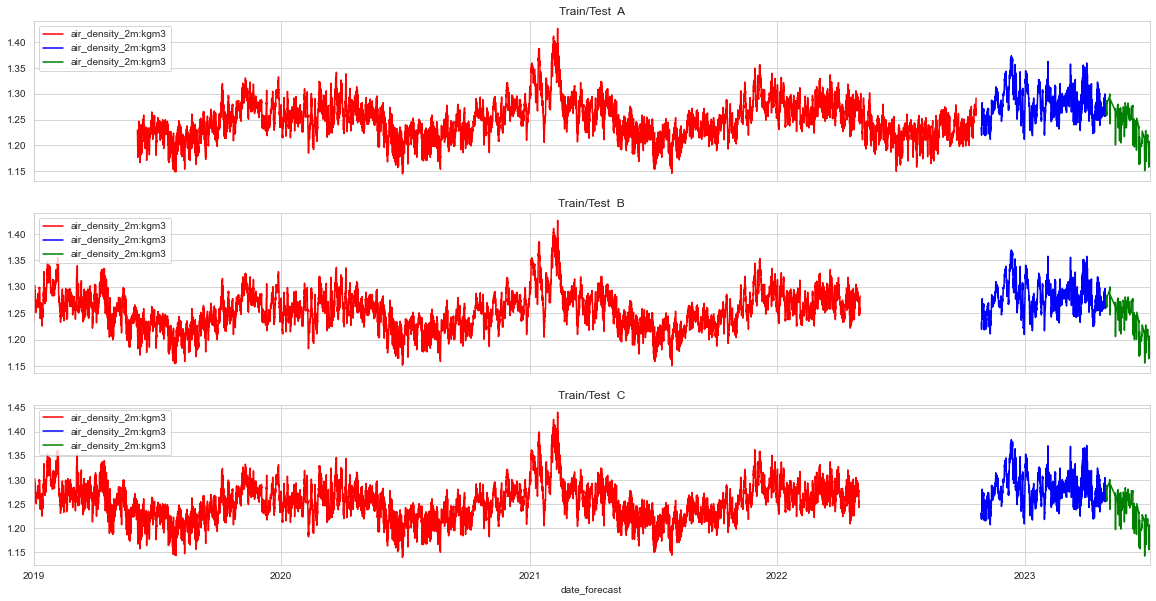

In [14]:
#Plotting features with high importance 
high_importance_feats = ['clear_sky_energy_1h:J', 'clear_sky_rad:W', 'direct_rad:W' ,'direct_rad_1h:J', 'effective_cloud_cover:p', 'id_day:idx']

for feat in high_importance_feats:
    plot_feature(feat)

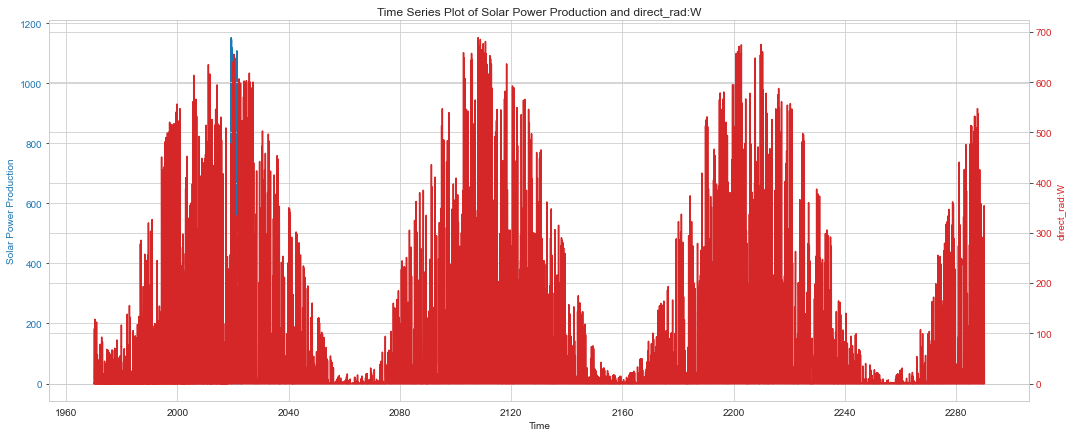

In [16]:

#Here we are plotting on the modified dataset
def time_series_plot(feature):
    fig, ax1 = plt.subplots(figsize=(15, 6))
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Solar Power Production', color='tab:blue')
    ax1.plot(train_b['time'], train_b['pv_measurement'], color='tab:blue', label='Solar Power Production')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()  
    ax2.set_ylabel(feature, color='tab:red')  
    ax2.plot(x_train_b.index, x_train_b[feature], color='tab:red', label=feature)
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    plt.title(f'Time Series Plot of Solar Power Production and {feature}')
    plt.show()


time_series_plot('direct_rad:W')

In [ ]:
for feat in high_importance_feats:
    time_series_plot(feat)

When looking at if the data is intuitive, we have use what we have learned in our search for domain knowledge.
- Does Solar production should correlate positively with irradiance?
- Production should typically be higher in summer months (assuming the location is in the Northern Hemisphere) due to longer daylight hours --> seasonality?
- Bad weather should usually show a drop in production.

### Understand how the data was generated?

### Explore individual features 

Maybe plot the most important features from domain knowledge analysis, together with seasonal decomp

### Explore pairs and groups of features 


# **2. Preprocessing**
---

## **The strategy:**
- Part 1: Preprocessing
   1. Import the data
   2. Experiment with removing columns containing NaN-values
   3. Aggregate data from 15 minute to hourly intervals:
      - Method 1: Take the mean over all four 15minutes recording, resulting in hourly measurements.
      - Method 2: Create a separate column for each 15-minute value, effectively quadrupling the number of columns.
   4. Handle consecutive pv measurements
   5. Remove rows in y-train with NaN values in pv measurement
   6. Remove rows that have timestamps that are not present in both x and y
   7. Remove rows containing NaN values for all features
- Part 2: Feature engineering
   1. Add extraced time-related features (hour, day, month, year) + binary observed column + remove date_calc
   2. Add cyclical features
   3. Add direct_rad x sun_elevation feature (for autogluon)
   4. Remove 'date_forecast' from test data


## **Part 1: Preprocessing**

In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import random
from autogluon.tabular import TabularPredictor
from sklearn.model_selection._split import _BaseKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)


## **1. Import the datasets**

In [27]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

x_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
x_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
x_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

x_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
x_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
x_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

x_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
x_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
x_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

In [28]:
# Merge x_train observed and x_train_estimated
x_train_a = pd.concat([x_train_observed_a,x_train_estimated_a])
x_train_b = pd.concat([x_train_observed_b,x_train_estimated_b])
x_train_c = pd.concat([x_train_observed_c,x_train_estimated_c])

## **2. Remove NaN columns**
- We experimented with removing different columns containing NaN values. 
- The columns containing the most NaN-values were examined, and we tried removing them checking how it affected the predictions
- The optimal results varied depending on the model used, and we therefore ended up creating two different x_trains. 
- Tags: [ClFeat123]

In [22]:
x_train_a.isna().sum()

date_forecast                          0
absolute_humidity_2m:gm3               0
air_density_2m:kgm3                    0
ceiling_height_agl:m               26166
clear_sky_energy_1h:J                  0
clear_sky_rad:W                        0
cloud_base_agl:m                   10160
dew_or_rime:idx                        0
dew_point_2m:K                         0
diffuse_rad:W                          0
diffuse_rad_1h:J                       0
direct_rad:W                           0
direct_rad_1h:J                        0
effective_cloud_cover:p                0
elevation:m                            0
fresh_snow_12h:cm                      0
fresh_snow_1h:cm                       0
fresh_snow_24h:cm                      0
fresh_snow_3h:cm                       0
fresh_snow_6h:cm                       0
is_day:idx                             0
is_in_shadow:idx                       0
msl_pressure:hPa                       0
precip_5min:mm                         0
precip_type_5min

In [29]:
#Remove snow:density column as well as rows with only NaN values
def remove_nan_cols(x,remove_cols):
    df = x.copy()
    df = df.drop(columns = remove_cols ) #Should we include 'cloud_base_agl:m' and ceiling_height_agl:m ['snow_density:kgm3']
    return df

In [30]:
#For Catboost
x_train_a1 = remove_nan_cols(x_train_a,['snow_density:kgm3'])
x_train_b1 = remove_nan_cols(x_train_b,['snow_density:kgm3'])
x_train_c1 = remove_nan_cols(x_train_c,['snow_density:kgm3'])

x_test_a1 = remove_nan_cols(x_test_estimated_a,['snow_density:kgm3'])
x_test_b1 = remove_nan_cols(x_test_estimated_b,['snow_density:kgm3'])
x_test_c1 = remove_nan_cols(x_test_estimated_c,['snow_density:kgm3'])

In [31]:
#For Autogluon
x_train_a2 =  remove_nan_cols(x_train_a,['snow_density:kgm3', 'cloud_base_agl:m'])
x_train_b2 =  remove_nan_cols(x_train_b,['snow_density:kgm3', 'cloud_base_agl:m'])
x_train_c2 =  remove_nan_cols(x_train_c,['snow_density:kgm3', 'cloud_base_agl:m'])

x_test_a2 =  remove_nan_cols(x_test_estimated_a,['snow_density:kgm3', 'cloud_base_agl:m'])
x_test_b2 =  remove_nan_cols(x_test_estimated_b,['snow_density:kgm3', 'cloud_base_agl:m'])
x_test_c2 =  remove_nan_cols(x_test_estimated_c,['snow_density:kgm3', 'cloud_base_agl:m'])

## **3. Transform data to hourly**
- We tried two different solutions which we ended up not using: 
    1. Different aggregation-methods based on our presumptions of the data
    2. Creating four times as many rows(one for each 15-minute period), with corresponding pv_measurement_fifteen_minute = pv_measurement_hourly/4.
- In the end we ended up using:
    1. **For CatBoost:** Simple mean of four 15-minute intervals to transform them into hourly estimates.
    2. **For Autogluon:** Four times as many columns (one for each feature within each 15-minute period within corresponding hour), where one row corresponds to one hour.

### **i. Different aggregation methods based on feature-type (Not used)**

In [32]:
# Calculating from 15-minute intervals to hourly intervals based on different aggregation methods
def resample_to_hourly(df, aggregation_methods):
    df.set_index('date_forecast', inplace=True)
    df_hourly = df.resample('H').agg(aggregation_methods)
    df_hourly.reset_index(inplace=True)
    
    return df_hourly

# Aggregation methods based on features' names
aggregation_methods = {
    'date_calc' : 'max',
    'absolute_humidity_2m:gm3': 'mean',
    'air_density_2m:kgm3': 'mean',
    'ceiling_height_agl:m': 'mean',
    'clear_sky_energy_1h:J': 'sum',
    'clear_sky_rad:W': 'mean',
    'cloud_base_agl:m': 'mean',
    'dew_or_rime:idx': 'max',
    'dew_point_2m:K': 'mean',
    'diffuse_rad:W': 'mean',
    'diffuse_rad_1h:J': 'sum',
    'direct_rad:W': 'mean',
    'direct_rad_1h:J': 'sum',
    'effective_cloud_cover:p': 'mean',
    'elevation:m': 'mean',
    'fresh_snow_12h:cm': 'sum',
    'fresh_snow_1h:cm': 'sum',
    'fresh_snow_24h:cm': 'sum',
    'fresh_snow_3h:cm': 'sum',
    'fresh_snow_6h:cm': 'sum',
    'is_day:idx': 'max',
    'is_in_shadow:idx': 'max',
    'msl_pressure:hPa': 'mean',
    'precip_5min:mm': 'sum',
    'precip_type_5min:idx': 'max',
    'pressure_100m:hPa': 'mean',
    'pressure_50m:hPa': 'mean',
    'prob_rime:p': 'mean',
    'rain_water:kgm2': 'sum',
    'relative_humidity_1000hPa:p': 'mean',
    'sfc_pressure:hPa': 'mean',
    'snow_density:kgm3': 'mean',
    'snow_depth:cm': 'mean',
    'snow_drift:idx': 'max',
    'snow_melt_10min:mm': 'sum',
    'snow_water:kgm2': 'sum',
    'sun_azimuth:d': 'mean',
    'sun_elevation:d': 'mean',
    'super_cooled_liquid_water:kgm2': 'mean',
    't_1000hPa:K': 'mean',
    'total_cloud_cover:p': 'mean',
    'visibility:m': 'mean',
    'wind_speed_10m:ms': 'mean',
    'wind_speed_u_10m:ms': 'mean',
    'wind_speed_v_10m:ms': 'mean',
    'wind_speed_w_1000hPa:ms': 'mean'
}

# Apply the function to each dataset
# x_train_a_hourly = resample_to_hourly(x_train_merged_a, aggregation_methods)
# x_train_b_hourly = resample_to_hourly(x_train_merged_b, aggregation_methods)
# x_train_c_hourly = resample_to_hourly(x_train_merged_c, aggregation_methods)

# x_test_a_hourly = resample_to_hourly(x_test_estimated_a, aggregation_methods)
# x_test_b_hourly = resample_to_hourly(x_test_estimated_b, aggregation_methods)
# x_test_c_hourly = resample_to_hourly(x_test_estimated_c, aggregation_methods)


### **ii. Four times as many rows (Not used)**

In [33]:
def resample(df, datetime_column='time', value_column='pv_measurement'):
    # Set the datetime column as the index
    df[datetime_column] = pd.to_datetime(df[datetime_column])
    df = df.set_index(datetime_column)

    # Resample the dataframe to 15-minute intervals and forward fill the values
    df_resampled = df.resample('15T').ffill()

    # Adjust the pv_measurement values to be a quarter of the original
    df_resampled[value_column] /= 4

    # Reset the index if you want the timestamp as a column
    df_resampled = df_resampled.reset_index()

    return df_resampled

# train_a = resample(train_a)
# train_b = resample(train_b)
# train_c = resample(train_c)
# train_a.head()

### **Method 1: Mean over four 15minutes recordings, resulting in hourly measurements. (CatBoost)**

In [34]:
def resample_to_hourly(x): 
    df = x.copy()
    df.set_index('date_forecast', inplace=True)
    
    # Aggregating by averaging over quartarly measurements
    df_hourly = df.resample('H').mean()
    df_hourly.reset_index(inplace=True)
    return df_hourly

x_train_a_hourly = resample_to_hourly(x_train_a1)
x_train_b_hourly = resample_to_hourly(x_train_b1)
x_train_c_hourly = resample_to_hourly(x_train_c1)

x_test_a_hourly = resample_to_hourly(x_test_a1)
x_test_b_hourly = resample_to_hourly(x_test_b1)
x_test_c_hourly = resample_to_hourly(x_test_c1)

In [35]:
#use only rows in test that are given in the test csv
test = pd.read_csv('test.csv')
pred_time_stamps = test['time'].unique()



With the datasets now being hourly, it is easier to plot correlation heatmaps to further research if the data is intuitive. According do our domain knowledge research, some of the features turned out to have a big effect on solar production. These features should therefore have a positive correlation with our production values.

In [56]:
#From table in domain search
important_features = ["date_forecast","clear_sky_energy_1h:J","clear_sky_rad:W","direct_rad:W","direct_rad_1h:J"]

In [58]:
def plot_heat_map(df1, df2, features):
    heat_map_a = pd.merge(df1[features], df2, left_on='date_forecast', right_on='time')
    heat_map_a = heat_map_a.drop(columns="time")
    correlation_matrix = heat_map_a.corr()
    plt.figure(figsize=(10, 8))  # Adjust the size as needed
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.show()

- Looking at the features we crossed out as a having a high impact on solar production and therefore our predictions, namely "date_forecast","clear_sky_energy_1h:J","clear_sky_rad:W","direct_rad:W","direct_rad_1h:J", we can see that they all have positive correlation with the production values "pv_measurement", and with eachother (ignoring "date_forecast"). **(Intu123)**

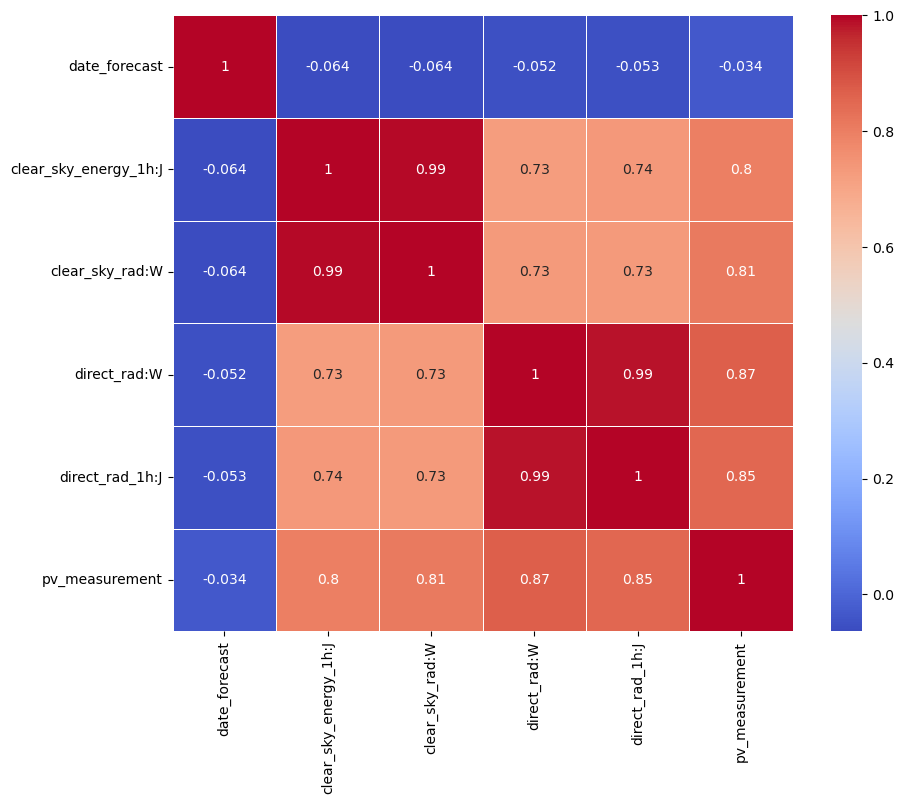

In [59]:
plot_heat_map(x_train_a_hourly,train_a,important_features)

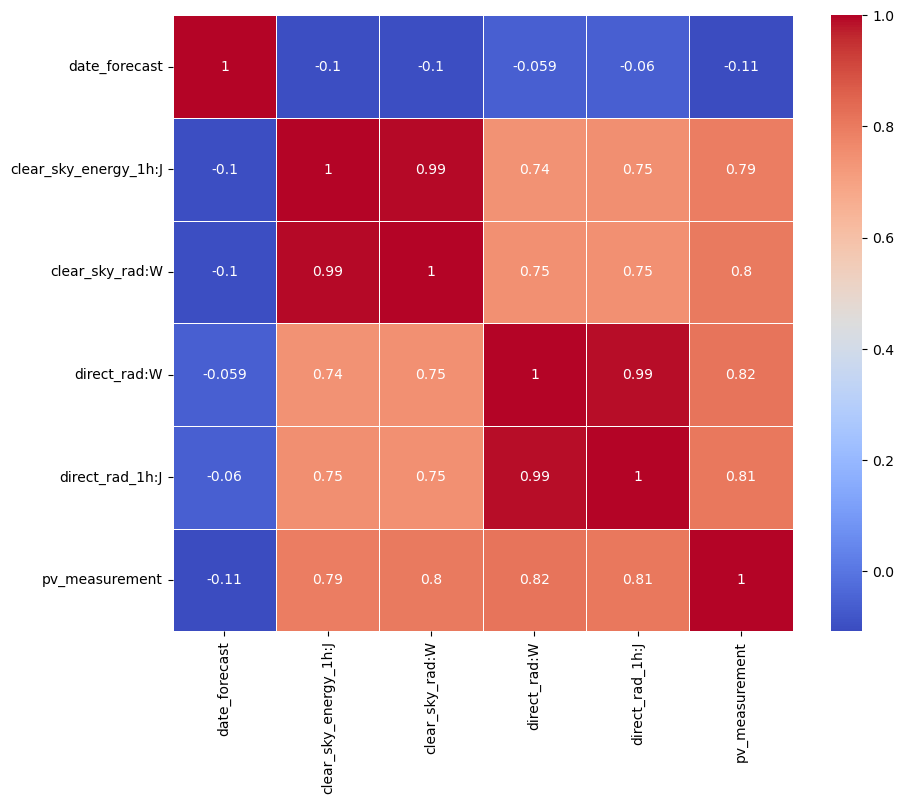

In [60]:
plot_heat_map(x_train_b_hourly,train_b,important_features)

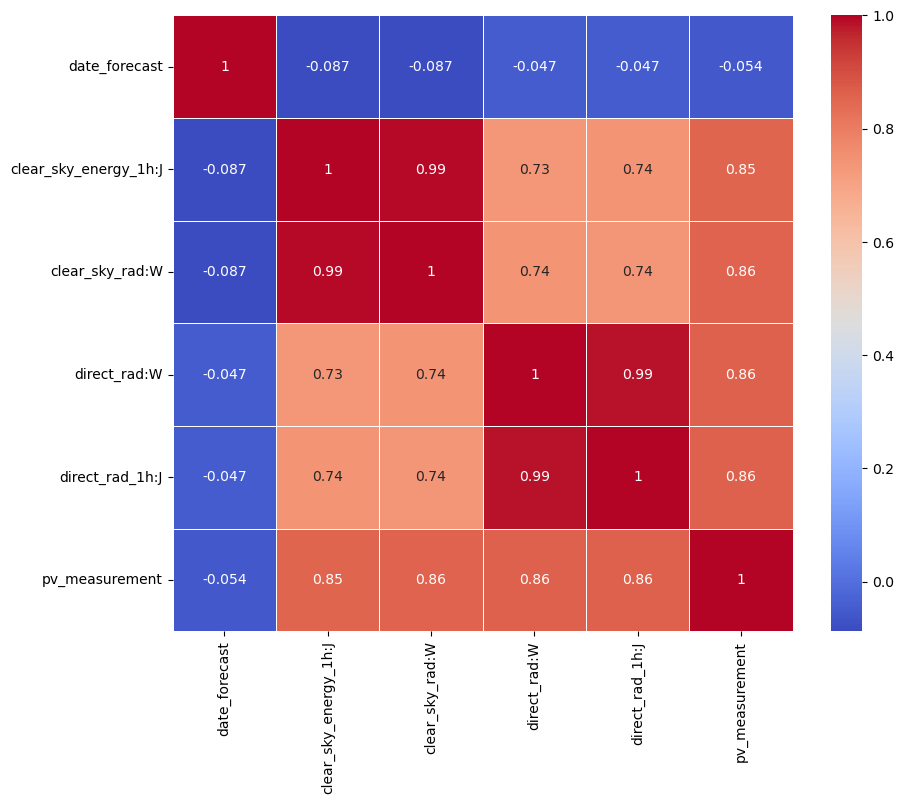

In [61]:
plot_heat_map(x_train_c_hourly,train_c,important_features)

### **Method 2: Separate column for each 15-minute feature-value, quadrupling the number of columns. (Autogluon)**

In [ ]:
def resample_to_hourly_quarters(x, date_column='date_forecast', exclude_column='date_calc'):
    df = x.copy()
    # Ensure the date column is in datetime format and set as the index
    df[date_column] = pd.to_datetime(df[date_column])
    df.set_index(date_column, inplace=True)
    
    # Separate the column to exclude from the resampling
    excluded_data = df[[exclude_column]].resample('H').first()  # You can use 'first' or 'last' here
    
    # Remove the excluded column from df before pivoting
    df = df.drop(columns=[exclude_column])

    # Add a column for the 15-minute period within the hour
    df['quarter'] = df.index.minute // 15  # Use floor division to get the quarter number (0, 1, 2, 3)

    # Pivot the table. For each feature, create a new column for each 15-minute period.
    df_pivot = df.pivot_table(index=df.index.floor('H'),
                              columns='quarter',
                              aggfunc='first')  # We use 'first' because each quarter should be unique
    
    # Flatten the multi-level column index
    df_pivot.columns = ['{}_Q{}'.format(feature, quarter) for feature, quarter in df_pivot.columns]

    # Reset the index to be able to merge on the date_column
    df_pivot.reset_index(inplace=True)
    excluded_data.reset_index(inplace=True)

    # Merge back the excluded column
    df_hourly = pd.merge(excluded_data, df_pivot, on=date_column)

    return df_hourly

# Make sure to pass the column name that contains the datetime information
x_train_a_hourly2 = resample_to_hourly_quarters(x_train_a2, date_column='date_forecast')
x_train_b_hourly2 = resample_to_hourly_quarters(x_train_b2, date_column='date_forecast')
x_train_c_hourly2 = resample_to_hourly_quarters(x_train_c2, date_column='date_forecast')

x_test_a_hourly2 = resample_to_hourly_quarters(x_test_a2, date_column='date_forecast')
x_test_b_hourly2 = resample_to_hourly_quarters(x_test_b2, date_column='date_forecast')
x_test_c_hourly2 = resample_to_hourly_quarters(x_test_b2, date_column='date_forecast')

## **4. Handle identical consecutive pv measurements**
- From the EDA we noticed abormally long periods of zero-values in pv_measurement. We therefore decided to remove these.
- By taking a closer look at the data, we also noticed some consecutive identical pv_measurement values. Since pv_measurements contain three decimals, we found this extremely unlikely, and decided to remove them.
- Tags: [ClFeat123]

In [ ]:
#Filters out rows from a DataFrame where the 'pv_measurement' column has consecutive identical values beyond a specified threshold.
def remove_constant_intervals(y_train, low_thresh, upp_thresh = 10**6):
    """
    Identify and remove intervals of constant PV readings that exceed a specified duration. 
    Constant readings may indicate sensor malfunctions or data logging issues.
    """
    
    df = y_train.copy()
    
    # Calculate the difference in production values
    df['diff'] = df['pv_measurement'].diff()

    # Identify where the difference is zero
    df['zero_diff'] = df['diff'].abs() < 1e-5

    # Identify groups of consecutive zero differences
    df['group'] = (df['zero_diff'] != df['zero_diff'].shift()).cumsum()

    # Filter out only the groups with consecutive zero differences
    constant_intervals = df[df['zero_diff']].groupby('group').agg(start=('time', 'min'), 
                                                                  end=('time', 'max'),
                                                                  duration=('time', 'size'))
    
    # Filter intervals based on the threshold
    interval_df_thresh = constant_intervals[(constant_intervals['duration'] > low_thresh) & (constant_intervals['duration'] <upp_thresh)]
    
    # Remove rows from the main dataframe that fall within these intervals
    for _, row in interval_df_thresh.iterrows():
        start_time, end_time = row['start'], row['end']
        df = df[(df['time'] < start_time) | (df['time'] > end_time)]
    
    # Drop the added columns used for calculations
    df.drop(columns=['diff', 'zero_diff', 'group'], inplace=True)
    
    return df

In [ ]:
#Remove rows in groups of constant values, where duration of constant measurements is > 1 day (24 hours)
train_a = remove_constant_intervals(train_a,24)
train_b = remove_constant_intervals(train_b,24)
train_c = remove_constant_intervals(train_c,24)

## **5. Remove rows in train with NaN values in pv measurement**
- By looking at the data, we also noticed NaN values in pv_measurement. We removed these.

In [ ]:

# Identify the indices of the rows with NaN values in the 'pv_measurement' column
nan_indices_a = train_a[train_a['pv_measurement'].isna()].index
nan_indices_b = train_b[train_b['pv_measurement'].isna()].index
nan_indices_c = train_c[train_c['pv_measurement'].isna()].index

# Drop these indices from y_train
train_a = train_a.drop(nan_indices_a).reset_index(drop = True)
train_b = train_b.drop(nan_indices_b).reset_index(drop = True)
train_c = train_c.drop(nan_indices_c).reset_index(drop = True)



## **6. Remove rows with time-stamps not present in both x and y**
- In order to ensure one target-value for each x-train row, we must remove those not present in both.
- Tags: [ClFeat123]

In [ ]:
# Remove all rows with date-time values that are not present in both x and y in order to synchronize x and its labels. 
def remove_non_synchronous_rows(x_train, y_train, x_date_column='date_forecast', y_date_column='time'):
    # Convert date columns to datetime format for easier comparison
    x_train[x_date_column] = pd.to_datetime(x_train[x_date_column])
    y_train[y_date_column] = pd.to_datetime(y_train[y_date_column])
    
    # Find common dates
    common_dates = x_train[x_date_column][x_train[x_date_column].isin(y_train[y_date_column])]
    
    # Filter both datasets based on common dates
    x_train_synced = x_train.loc[x_train[x_date_column].isin(common_dates)]
    y_train_synced = y_train.loc[y_train[y_date_column].isin(common_dates)]
    
    return x_train_synced, y_train_synced

# Remove the rows with date and time that only shows up in one of the sets
x_train_a1, train_a = remove_non_synchronous_rows(x_train_a_hourly, train_a)
x_train_b1, train_b = remove_non_synchronous_rows(x_train_b_hourly, train_b)
x_train_c1, train_c = remove_non_synchronous_rows(x_train_c_hourly, train_c)

# Remove the rows with date and time that only shows up in one of the sets
x_train_a2, train_a = remove_non_synchronous_rows(x_train_a_hourly2, train_a)
x_train_b2, train_b = remove_non_synchronous_rows(x_train_b_hourly2, train_b)
x_train_c2, train_c = remove_non_synchronous_rows(x_train_c_hourly2, train_c)

## **7. Remove rows with NaN-values for all features**
- By looking at the data, we notice 24 rows that had NaN values in all columns. 
- As diffuse_rad had no other nan values these rows where removed by removing all rows with nan in the diffuse_rad column
- Tags: [ClFeat123]


x_train_a1.isna().sum()

In [ ]:
x_train_a2.isna().sum()

In [ ]:
#For Catboost
x_train_a1 = x_train_a1.dropna(subset=['diffuse_rad:W'])
x_train_b1 = x_train_b1.dropna(subset=['diffuse_rad:W'])
x_train_c1 = x_train_c1.dropna(subset=['diffuse_rad:W'])

x_test_a1 = x_test_a1.dropna(subset=['diffuse_rad:W'])
x_test_b1 = x_test_b1.dropna(subset=['diffuse_rad:W'])
x_test_c1 = x_test_c1.dropna(subset=['diffuse_rad:W'])

In [ ]:
#For Autogluon
x_train_a2 = x_train_a2.dropna(subset=['diffuse_rad:W_Q1'])
x_train_b2 = x_train_b2.dropna(subset=['diffuse_rad:W_Q1'])
x_train_c2 = x_train_c2.dropna(subset=['diffuse_rad:W_Q1'])

x_test_a2 = x_test_a_hourly2.dropna(subset=['diffuse_rad:W_Q1'])
x_test_b2 = x_test_b_hourly2.dropna(subset=['diffuse_rad:W_Q1'])
x_test_c2 = x_test_c_hourly2.dropna(subset=['diffuse_rad:W_Q1'])

## 8. Remove outliers of pv measurement during night (Not used)

**Plot Hourly Averages (plot_hourly_avg):** This function plots the average PV measurement for each hour across the dataset. This to identifying what PV measurement values are typical for each hour.

**Plot Distribution for a Single Hour (plot_dist_hour):** This function is used to plot the distribution of PV measurements for a specific hour. This is useful for understanding the spread and frequency of PV measurements during a particular hour, aiding in identifying outliers.

**Get Nighttime Statistics (get_nighttime_stats):** This function filters the data to include only nighttime hours (as defined by night_start and night_end parameters). It calculates descriptive statistics for these hours and plots the distribution of PV measurements. The plot includes markers for the 75th percentile and the maximum value, which can be used to understand the spread and identify potential outliers.

**Set Nighttime Measurements to Zero (set_nighttime_to_zero):** This function is crucial for cleaning the data. It sets PV measurements to zero during nighttime hours if they exceed a defined threshold (thresh). This is based on the assumption that PV measurements should be negligible at night, and any high value is likely an error or misreading.

In [ ]:
#Looked at average pv_measurement for each hour of the day
#This to identify what values could be considered anomalies during the night hours
def plot_hourly_avg(y_train):
    # Grouping by hour and calculating the average PV measurement for each hour
    train_data = y_train.copy()
    train_data['hour'] = y_train['time'].dt.hour
    hourly_avg = train_data.groupby('hour')['pv_measurement'].mean()

    # Plotting the average PV production for each hour
    plt.figure(figsize=(12, 6))
    hourly_avg.plot(kind='bar', color='skyblue')
    plt.title('Average PV Production by Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average PV Production')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#Ploted the distribution of a single hour in order to 
def plot_dist_hour(y_train, hour):
    train_data = y_train.copy()
    train_data['hour'] = y_train['time'].dt.hour
    
    # Filtering the data for the given hour
    hour_data = train_data[train_data['hour'] == hour]
    
    # Plotting the distribution of PV measurements for 1 am
    plt.figure(figsize=(12, 6))
    plt.hist(hour_data['pv_measurement'], bins=50, color='teal', alpha=0.7)
    plt.title(f'Distribution of PV Measurements at {hour}')
    plt.xlabel('PV Measurement')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print(hour_data['pv_measurement'].value_counts())
#train_c[(train_c['time'].dt.hour == 2) &(train_c['pv_measurement'] == 9.8)]

def get_nighttime_stats(y_train,night_start,night_end):
    train_data = y_train.copy()
    train_data['hour'] = y_train['time'].dt.hour

    # Filtering the data for nighttime hours (8 pm to 4 am)
    nighttime_data = train_data[(train_data['hour'] >= night_start) | (train_data['hour'] <= night_end)]

    # Descriptive statistics for nighttime PV measurements
    nighttime_stats = nighttime_data['pv_measurement'].describe()

    # Plotting the distribution of nighttime PV measurements
    plt.figure(figsize=(12, 6))
    plt.hist(nighttime_data['pv_measurement'], bins=50, color='purple', alpha=0.7)
    plt.axvline(nighttime_stats['75%'], color='red', linestyle='dashed', label='75th Percentile')
    plt.axvline(nighttime_stats['max'], color='green', linestyle='dashed', label='Max Value')
    plt.title('Distribution of Nighttime PV Measurements')
    plt.xlabel('PV Measurement')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(nighttime_stats)
    
def set_nighttime_to_zero(y_train, night_start,night_end, thresh):
    df = y_train.copy()
    df['hour'] = y_train['time'].dt.hour
    mask = (df['hour'] >= 23) | (df['hour'] <= 3) & (df['pv_measurement'] > thresh)
    df.loc[mask, 'pv_measurement'] = 0
    df = df.drop(columns = ['hour'])
    return df

#train_a[(train_a['time'].dt.hour == 2) &(train_a['pv_measurement'] >0)]
#train_a = set_nighttime_to_zero(train_a,23,3,0)
#train_b = set_nighttime_to_zero(train_b,23,3,0)
#train_c = set_nighttime_to_zero(train_c,23,3,0)
#train_a[(train_a['time'].dt.hour == 2) &(train_a['pv_measurement'] >0)]

## **Part 2: Feature Engineering**
- **The features we ended up not using:**
    - Lag-features for pv_measurement
    - Rolling averages
    - Extraced date_calc features
- **The features we ended up using:**
    1. Add extraced time-related features (hour, day, month, year) + binary observed column + remove date_calc
    2. Add cyclical features
    3. Add direct_rad x sun_elevation feature (for autogluon)
    4. Remove 'date_forecast' from test data

### **i. Lag-features (Not used)**
- For 1, 2 and 3 years back on the exact same time
- Got worse predictions with lag-features.

In [ ]:
def add_lag_features(x,y):
    target_map = y['pv_measurement'].to_dict()
    x['lag_1'] = (x.index - pd.Timedelta('365 days')).map(target_map)
    x['lag_2'] = (x.index - pd.Timedelta('730 days')).map(target_map)
    x['lag_3'] = (x.index - pd.Timedelta('1095 days')).map(target_map)
    return x

# x_train_a_hourly = add_lag_features(x_train_a_hourly,train_a)
# x_train_b_hourly = add_lag_features(x_train_b_hourly,train_b)
# x_train_c_hourly = add_lag_features(x_train_c_hourly,train_c)

# x_test_a_hourly = add_lag_features(x_test_a_hourly, train_a)
# x_test_b_hourly = add_lag_features(x_test_b_hourly, train_b)
# x_test_c_hourly = add_lag_features(x_test_c_hourly, train_c)

# x_test_a_hourly

### **ii. Rolling features (Not used)**
- Tried adding rolling averages for the features with highest feature importance for 3 and 6 hours. 
- Added no value.

In [ ]:
def add_rolling_features(x):
    data = x.copy()
    # Calculate rolling averages for 'direct_rad:W' and 'diffuse_rad:W'
    data['direct_rad_3h_roll_avg'] = data['direct_rad:W'].rolling('3H').mean()
    data['diffuse_rad_3h_roll_avg'] = data['diffuse_rad:W'].rolling('3H').mean()
    data['direct_rad_6h_roll_avg'] = data['direct_rad:W'].rolling('6H').mean()
    data['diffuse_rad_6h_roll_avg'] = data['diffuse_rad:W'].rolling('6H').mean()

    return data

In [ ]:
#Add avg pv at this time over the past week or month.
def calculate_rolling_same_time_average(merged_df, period='7D'):
    
    df = merged_df.copy()
    # Resample the data at the desired frequency
    resampled_df = df.resample(period, on='date_forecast',).mean()
    
    
    # Reindex the resampled data to match the original index, filling missing values by interpolation
    return resampled_df

#merged_a['weekly_avg_pv_hourly'] = calculate_rolling_same_time_average(merged_a, '7D')

# Calculate the rolling average at the same time over the past month
#merged_a['monthly_avg_same_time'] = calculate_rolling_same_time_average(merged_a, '30D')

### **iii. Cyclical data for day of year (Not used)**
- Tried adding cyclical data for day of year, in order for the model to understand that the last day of the year is the day before the first day of the year.
- Added no value.

In [ ]:
def cyclic_day_of_year(x):
    # Reset the index if 'date_forecast' is currently set as the index
    train_data = x.copy()
    train_data.reset_index(inplace=True)
    # Calculate the day of the year from 'date_forecast'
    train_data['day_of_year'] = train_data['date_forecast'].dt.dayofyear
    # Constants for sine and cosine calculations
    days_in_year = 366  # Considering leap years
    # Create sine and cosine features for cyclical encoding of the day of the year
    train_data['day_of_year_sin'] = np.sin(2 * np.pi * train_data['day_of_year'] / days_in_year)
    train_data['day_of_year_cos'] = np.cos(2 * np.pi * train_data['day_of_year'] / days_in_year)
    # Check the dataframe with the new cyclical features
    train_data[['day_of_year', 'day_of_year_sin', 'day_of_year_cos']].head()
    train_data.set_index('date_forecast', inplace=True)
    return train_data

### **1. Add time features: hour, day, month, year** [FeatEng123]
- We extracted these features as pv_measurement is heavily dependent on date and time.

In [ ]:
# Extracts year, month, day, and hour features from a given datetime column and remove date_calc.
def extract_date_features(X):
    df = X.copy()
    # Extract features
    df['year'] = df['date_forecast'].dt.year
    df['month'] = df['date_forecast'].dt.month
    df['day'] = df['date_forecast'].dt.day
    df['hour'] = df['date_forecast'].dt.hour
    
    df['observed'] = (df['date_calc'].isna()).astype(int)
    df['observed'] = df['observed'].astype(str)
    
    
    df = df.drop(columns = ['date_calc'])
    
    return df

In [ ]:
x_train_a1 = extract_date_features(x_train_a1)
x_train_b1 = extract_date_features(x_train_b1)
x_train_c1 = extract_date_features(x_train_c1)

x_test_a1 = extract_date_features(x_test_a1)
x_test_b1 = extract_date_features(x_test_b1)
x_test_c1 = extract_date_features(x_test_c1)


In [ ]:
x_train_a2 = extract_date_features(x_train_a2)
x_train_b2 = extract_date_features(x_train_b2)
x_train_c2 = extract_date_features(x_train_c2)

x_test_a2 = extract_date_features(x_test_a2)
x_test_b2 = extract_date_features(x_test_b2)
x_test_c2 = extract_date_features(x_test_c2)

### **2. Add cyclical features** [FeatEng123]
- Added sinus and cosinus waves encoding the hour and month of the date_forecast-column.
- This is used to help the model understand the cyclical nature of time, e.g. that hour 23 comes before the hour 00, and that month 12 comes before month 1. 

In [ ]:
# Creating cyclical features for hour of the day and month of the year
def add_cyclic(x_train):
    train_data = x_train.copy()
   
    train_data['hour_sin'] = np.sin(2 * np.pi * train_data['hour'] / 24)
    train_data['hour_cos'] = np.cos(2 * np.pi * train_data['hour'] / 24)
    train_data['month_sin'] = np.sin(2 * np.pi * (train_data['month']-1) / 12)
    train_data['month_cos'] = np.cos(2 * np.pi * (train_data['month']-1) / 12)
    
    #train_data.drop(columns = ['hour','month'],inplace = True)
    return train_data

x_train_a1 = add_cyclic(x_train_a1)
x_train_b1 = add_cyclic(x_train_b1)
x_train_c1 = add_cyclic(x_train_c1)

x_test_a1 = add_cyclic(x_test_a1)
x_test_b1 = add_cyclic(x_test_b1)
x_test_c1 = add_cyclic(x_test_c1)

x_train_a2 = add_cyclic(x_train_a2)
x_train_b2 = add_cyclic(x_train_b2)
x_train_c2 = add_cyclic(x_train_c2)

x_test_a2 = add_cyclic(x_test_a2)
x_test_b2 = add_cyclic(x_test_b2)
x_test_c2 = add_cyclic(x_test_c2)

### **3. Add direct_rad x sun_elevation feature for Autogluon** [FeatEng123]
- The only feature that gave better predictive ability for Autogluon

In [ ]:
def add_interaction_features(x):
    data = x.copy()
    # Calculate rolling averages for 'direct_rad:W' and 'diffuse_rad:W

    # Create interaction term between 'direct_rad:W' and 'sun_elevation:d'
    data['direct_rad_x_sun_elevation_Q0'] = data['direct_rad:W_Q0'] * data['sun_elevation:d_Q0']
    data['direct_rad_x_sun_elevation_Q1'] = data['direct_rad:W_Q1'] * data['sun_elevation:d_Q1']
    data['direct_rad_x_sun_elevation_Q2'] = data['direct_rad:W_Q2'] * data['sun_elevation:d_Q2']
    data['direct_rad_x_sun_elevation_Q3'] = data['direct_rad:W_Q3'] * data['sun_elevation:d_Q3']
    return data


x_train_a2 = add_interaction_features(x_train_a2)
x_train_b2 = add_interaction_features(x_train_b2)
x_train_c2 = add_interaction_features(x_train_c2)

x_test_a2 = add_interaction_features(x_test_a2)
x_test_b2 = add_interaction_features(x_test_b2)
x_test_c2 = add_interaction_features(x_test_c2)

### 4. Remove 'date_forecast' 
- We tried both, and found that removing date_forecast gave best results
- This column is removed for the train data in the model building section

In [ ]:
x_test_a1=x_test_a1.drop(columns = ['date_forecast'])
x_test_b1=x_test_b1.drop(columns = ['date_forecast'])
x_test_c1=x_test_c1.drop(columns = ['date_forecast'])

x_test_a2=x_test_a2.drop(columns = ['date_forecast'])
x_test_b2=x_test_b2.drop(columns = ['date_forecast'])
x_test_c2=x_test_c2.drop(columns = ['date_forecast'])

# **3. Simple ML models**
---

## **XGBoost** [Pred123]
- **What we tried:**
    1. Different train/validation splits
        - Helped: Yes
        - Optimal: 12.5% of last data.
    2. MinMax scaler.
        - Helped: No
    3. Bayesian Optimization for finding best hyperparameters:
        - Helped: No
    4. Early stopping to prevent overfitting:
        - Helped: Yes
    5. Retraining on the entire dataset after finding right hyperparams and epochs.
        - Helped: Yes
- **Best MAE Kaggle:**
    - 159.7


In [ ]:
#!pip install xgboost

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from hyperopt import STATUS_OK, hp, fmin, tpe, Trials, space_eval
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from baeysianOptimization import BayesianOptimization

In [ ]:
x_train = pd.read_csv('cleaned_and_combined_data/x_train_combined.csv')
y_train = pd.read_csv('cleaned_and_combined_data/y_train_combined.csv')
x_test = pd.read_csv('cleaned_and_combined_data/x_test_combined.csv')

### 1. Try different validation splits
- Optimal = 12.5% of data

In [ ]:
# Determine the split index
split_index = int(0.875 * len(x_train))

# Split the data into training and validation sets
x_train_df = x_train[:split_index]
y_train_df = y_train[:split_index]
x_valid_df = x_train[split_index:]
y_valid_df = y_train[split_index:]
# Drop the specified columns
columns_to_drop=(['hour_sin','hour_cos','month_sin','month_cos'])
x_train_df.drop(columns=columns_to_drop, inplace=True)
x_valid_df.drop(columns=columns_to_drop, inplace=True)
x_test.drop(columns=columns_to_drop, inplace=True)

# For cross-validation and training after validation
combined_xdf = pd.concat([x_train_df, x_valid_df], axis=0).reset_index(drop=True)
combined_ydf = pd.concat([y_train_df, y_valid_df], axis=0).reset_index(drop=True)



,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,day_of_year,direct_rad_3h_roll_avg,diffuse_rad_3h_roll_avg,direct_rad_6h_roll_avg,diffuse_rad_6h_roll_avg,direct_rad_x_sun_elevation,location_A,location_B,location_C,observed,estimated
0,4.325,1.28675,912.7000,0.0,0.000,1061.5500,0.0,271.65002,0.000,0.00,0.00,0.0,74.950,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.675,0.0,0.0,1000.550,1006.800,0.0,0.0,80.275,1013.100,NaN,0.0,0.0,0.0,0.0,16.02650,-10.5410,0.0,273.80000,74.950,29907.500,3.950,2.100,3.35,0.0,2023,5,1,0,121,0.000000,0.000000,0.000,0.00000,-0.00000,1,0,0,0,1
1,4.275,1.28600,1482.1000,0.0,0.000,1075.1001,0.0,271.45000,0.000,0.00,0.00,0.0,77.475,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.150,0.0,0.0,1000.050,1006.300,0.0,0.0,79.825,1012.600,NaN,0.0,0.0,0.0,0.0,30.49725,-7.8945,0.0,273.80000,77.475,29519.074,3.825,1.925,3.30,0.0,2023,5,1,1,121,0.000000,0.000000,0.000,0.00000,-0.00000,1,0,0,0,1
2,4.150,1.28375,1791.3000,0.0,0.000,1200.4000,0.0,271.05000,0.000,0.00,0.00,0.0,88.100,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1012.675,0.0,0.0,999.500,1005.800,0.0,0.0,78.000,1012.050,NaN,0.0,0.0,0.0,0.0,44.51725,-3.8155,0.0,273.84998,88.100,31009.125,3.650,1.750,3.20,0.0,2023,5,1,2,121,0.000000,0.000000,0.000,0.00000,-0.00000,1,0,0,0,1
3,4.025,1.28200,2312.8750,40497.7,11.675,1179.8500,0.0,270.65000,9.375,67380.91,2.10,15061.4,68.600,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1012.175,0.0,0.0,998.975,1005.225,0.0,0.0,75.625,1011.525,NaN,0.0,0.0,0.0,0.0,58.08300,1.4125,0.0,273.90000,68.600,34552.500,3.500,1.450,3.15,0.0,2023,5,1,3,121,0.700000,3.125000,0.525,2.34375,2.96625,1,0,0,0,1
4,3.900,1.28100,2198.2998,566994.4,76.875,920.0500,0.0,270.37500,47.400,408838.80,25.45,198284.8,66.300,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1011.725,0.0,0.0,998.550,1004.750,0.0,0.0,74.225,1011.050,NaN,0.0,0.0,0.0,0.0,71.34100,7.4685,0.0,273.92500,66.300,35483.875,3.325,1.300,3.05,0.0,2023,5,1,4,121,9.183334,18.925001,5.510,11.35500,190.07333,1,0,0,0,1


### 2. Try MinMax Scaling
- Did not help

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# # Exclude boolean columns (location_A, location_B, location_C)
# columns_to_scale = x_train.columns.difference(['location_A', 'location_B', 'location_C'])

# scaler = MinMaxScaler()
# x_train[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])
# x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])


### 3. Try Bayesian Optimization to find optimal hyperparameters
- Did not help

In [ ]:
# Bayesian Optimization used for finding optimal hyperparams
class BayesianOptimization:
    def __init__(self, x_train, y_train, x_valid, y_valid, space):
        self.x_train = x_train
        self.y_train = y_train
        self.x_valid = x_valid
        self.y_valid = y_valid
        self.space = space
        self.trials = Trials()

    def objective(self, params):
        model = xgb.XGBRegressor(**params, early_stopping_rounds=50)
        model.fit(self.x_train, self.y_train, eval_set=[(self.x_valid, self.y_valid)], verbose=False)
        pred = model.predict(self.x_valid)
        mae = mean_absolute_error(self.y_valid, pred)
        return {'loss': mae, 'status': STATUS_OK}

    def optimize(self, n_evals=100):
        best = fmin(fn=self.objective,
                    space=self.space,
                    algo=tpe.suggest,
                    max_evals=n_evals,
                    trials=self.trials)
        return best

    def get_best_params(self):
        return space_eval(self.space, self.trials.argmin)

# The search space used for finding optimal hyperparams. 
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),
    'max_depth': hp.choice('max_depth', range(1, 15, 1)),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'alpha': hp.loguniform('alpha', -5, 2),  # exponential distribution over [0.01, 7.4]
    'lambda': hp.loguniform('lambda', -5, 2), 
    'n_estimators': hp.choice('n_estimators', range(100, 1000, 50))
}

# # Create an instance of the optimizer
# optimizer = BayesianOptimization(x_train_df, y_train_df['pv_measurement'], x_valid_df, y_valid_df['pv_measurement'], space)

# # Optimize
# best_params = optimizer.optimize()

# optimizer.get_best_params()

### 4. Try early stopping with validation set
- Helped

In [ ]:
dtrain = xgb.DMatrix(x_train_df,label = y_train_df['pv_measurement'])
dval = xgb.DMatrix(x_valid_df,label = y_valid_df['pv_measurement'])
test = xgb.DMatrix(x_test)

In [ ]:
fixed_params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'mae',
        'booster': 'gbtree'
}
variable_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.1,
    'lambda': 1,
}
#variable_params = best_params

all_params = {**fixed_params,**variable_params} 
#  Train the model
num_boost_round = 10000  # Maximum number of boosting rounds
early_stopping_rounds = 50  # Stop if validation score doesn't improve for 50 rounds

evals = [(dtrain, 'train'), (dval, 'eval')]
progress = {}


In [ ]:
bst = xgb.train(
    all_params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=evals,
    early_stopping_rounds=early_stopping_rounds,
    evals_result=progress
)

print("Best MAE: {:.2f} with {} rounds".format(
         bst.best_score,
         bst.best_iteration+1))


### 5. Retrain on the entire dataset with optimal stopping round and hyperparams

In [ ]:
# Create a DMatrix for the whole dataset
dtrain_whole = xgb.DMatrix(combined_xdf,label = combined_ydf['pv_measurement'])
# Using the best iteration from previous training
best_iteration = bst.best_iteration + 1
# Retrain the model on the entire dataset
bst_whole = xgb.train(
    all_params,
    dtrain_whole,
    num_boost_round=best_iteration
)

In [ ]:
predictions = bst_whole.predict(test)
predictions

array([-1.5106149 , -0.6375855 , -0.41436076, ...,  9.555201  ,
        2.2275333 , -1.4605165 ], dtype=float32)

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')

# Convert the numpy array to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['prediction'])

# Convert all negative predictions to 0
predictions_df.loc[predictions_df['prediction'] < 0, 'prediction'] = 0

# Join the 'id' column from sample_submission with the predictions
sample_submission['prediction'] = predictions_df['prediction']

# Save to CSV
sample_submission.to_csv('xgboost.csv', index=False)
predictions_df

,prediction
0,0.000000
1,0.000000
2,0.000000
3,79.418022
4,352.832825
...,...
2155,48.357288
2156,23.512861
2157,9.555201
2158,2.227533


## **LightGBM** [Pred123]
- **What we tried:**
    1. Dropping different columns
        - Helped: Yes
        - Optimal: Drop cyclical features
    2. Different validation/train splits
        - Helped: Yes
        - Optimal: 12.5% of data
    3. Different Hyperparams
        - Helped: Yes
        - Optimal: See code
- **Best Kaggle score:**
    - 160.35

In [ ]:
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
x_train_a = pd.read_csv('cleaned_data/A/x_train_a.csv')
y_train_a = pd.read_csv('cleaned_data/A/train_a.csv')
x_test_a = pd.read_csv('cleaned_data/A/x_test_a.csv')

x_train_b = pd.read_csv('cleaned_data/B/x_train_b.csv')
y_train_b = pd.read_csv('cleaned_data/B/train_b.csv')
x_test_b = pd.read_csv('cleaned_data/B/x_test_b.csv')

x_train_c = pd.read_csv('cleaned_data/C/x_train_c.csv')
y_train_c = pd.read_csv('cleaned_data/C/train_c.csv')
x_test_c = pd.read_csv('cleaned_data/C/x_test_c.csv')

### 1. Trying to remove different columns
- Helped

In [ ]:
def prepare_dataset(x_train, y_train, x_test, merge_on, drop_columns):
    # Merge training data with the target variable
    x_train_combined = x_train.merge(y_train, left_on=merge_on[0], right_on=merge_on[1], how='left')
    # Create 'observed' column based on the 'calc_year' column's NaN values
    x_train_combined['observed'] = x_train_combined['calc_year'].isna().astype(int)
    # Drop specified columns from the training data
    train_data = x_train_combined.drop(drop_columns, axis=1).drop(['time'],axis = 1)
    # Repeat the process for test data
    x_test['observed'] = x_test['calc_year'].isna().astype(int)
    test_data = x_test.drop(drop_columns, axis=1).drop(['location'],axis=1)
    
    return train_data, test_data

# Define columns to drop from training and test datasets
drop_columns = ['hour_sin', 'hour_cos', 'month_sin', 'month_cos']

# Call the function with the relevant dataframes and columns
train_data_a, test_data_a = prepare_dataset(x_train_a, y_train_a, x_test_a, 
                                        ['date_forecast', 'time'], 
                                        drop_columns)
train_data_b, test_data_b = prepare_dataset(x_train_b, y_train_b, x_test_b, 
                                        ['date_forecast', 'time'], 
                                        drop_columns)
train_data_c, test_data_c = prepare_dataset(x_train_c, y_train_c, x_test_c, 
                                        ['date_forecast', 'time'], 
                                        drop_columns)



Necessary reformatting in order for LightGBM to process the data

In [ ]:
# LightGBM is unable to handle some characters
def clean_column_names(dataframe):
    # Replace any special JSON characters with an underscore (or remove them)
    clean_names = {col: col.replace(':', '_').replace(',', '_').replace('{', '_').replace('}', '_')
                   .replace('[', '_').replace(']', '_') for col in dataframe.columns}
    return dataframe.rename(columns=clean_names)

# Clean the column names for both train and test datasets
train_data_a = clean_column_names(train_data_a)
test_data_a = clean_column_names(test_data_a)
train_data_b = clean_column_names(train_data_b)
test_data_b = clean_column_names(test_data_b)
train_data_c = clean_column_names(train_data_c)
test_data_c = clean_column_names(test_data_c)

In [ ]:
# Split the data
X_a = train_data_a.drop('pv_measurement', axis=1)
y_a = train_data_a['pv_measurement']

X_b = train_data_b.drop('pv_measurement', axis=1)
y_b = train_data_b['pv_measurement']

X_c = train_data_c.drop('pv_measurement', axis=1)
y_c = train_data_c['pv_measurement']

### 2. Trying different train/val splits
- Helped

In [ ]:
# Found the optimal split ratio to be 0.875 or 12.5% of the dataset as validation
split_ratio = 0.875

def train_val_split(x,y,split_ratio):
    x_train = x[:int(len(x) * split_ratio)]
    x_val = x[int(len(x) * split_ratio):]
    y_train = y[:int(len(y) * split_ratio)]
    y_val = y[int(len(y) * split_ratio):]

    return x_train,x_val,y_train,y_val

X_train_a, X_val_a, y_train_a, y_val_a = train_val_split(X_a,y_a,split_ratio)
X_train_b, X_val_b, y_train_b, y_val_b = train_val_split(X_b,y_b,split_ratio)
X_train_c, X_val_c, y_train_c, y_val_c = train_val_split(X_c,y_c,split_ratio)


In [ ]:
# Transforming the datasets into LightGBM datasets
train_data_a = lgb.Dataset(X_train_a, label=y_train_a)
val_data_a = lgb.Dataset(X_val_a, label=y_val_a, reference=train_data_a)
train_data_b = lgb.Dataset(X_train_b, label=y_train_b)
val_data_b = lgb.Dataset(X_val_b, label=y_val_b, reference=train_data_b)
train_data_c = lgb.Dataset(X_train_c, label=y_train_c)
val_data_c = lgb.Dataset(X_val_c, label=y_val_c, reference=train_data_c)

### 3. Trying different hyperparameters
- Helped
- Optimal below

In [ ]:
# Define the parameters for the LightGBM model
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',  # Use MAE for evaluation
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [ ]:
# Train the model
gbm_a = lgb.train(params,
                train_data_a,
                num_boost_round=10000,
                valid_sets=val_data_a,
                callbacks=[lgb.early_stopping(stopping_rounds=10)])

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[153]	valid_0's l1: 118.296


In [ ]:
gbm_b = lgb.train(params,
                train_data_b,
                num_boost_round=10000,
                valid_sets=val_data_b,
                callbacks=[lgb.early_stopping(stopping_rounds=10)])

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[149]	valid_0's l1: 16.8359


In [ ]:
gbm_c = lgb.train(params,
                train_data_c,
                num_boost_round=10000,
                valid_sets=val_data_c,
                callbacks=[lgb.early_stopping(stopping_rounds=10)])

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[143]	valid_0's l1: 23.4166


In [ ]:
y_pred_a = gbm_a.predict(test_data_a, num_iteration=gbm_a.best_iteration)
formatted_predictions_a = [format(x, '.5f') for x in y_pred_a]
y_pred_b = gbm_b.predict(test_data_b, num_iteration=gbm_b.best_iteration)
formatted_predictions_b = [format(x, '.5f') for x in y_pred_b]
y_pred_c = gbm_c.predict(test_data_c, num_iteration=gbm_c.best_iteration)
formatted_predictions_c = [format(x, '.5f') for x in y_pred_c]

In [ ]:
# Concatinating the predictions
predictions = formatted_predictions_a + formatted_predictions_b + formatted_predictions_c

#Reading the sample submission to ensure the format is correct
sample_submission = pd.read_csv('sample_submission.csv')

# Convert the numpy array to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['prediction'])

# Convert all negative predictions to 0
predictions_df['prediction'] = predictions_df['prediction'].astype(float)
predictions_df.loc[predictions_df['prediction'] < 0, 'prediction'] = 0.0

# Join the 'id' column from sample_submission with the predictions
sample_submission['prediction'] = predictions_df['prediction']

# Save to CSV
sample_submission.to_csv('lightgbm.csv', index=False)
predictions_df

,prediction
0,3.11523
1,3.11523
2,3.11523
3,63.09452
4,400.21175
...,...
2155,38.99164
2156,12.44847
2157,0.37067
2158,0.20967


## **Catboost**
**What we tried:**
- Removed rows with high direct_rad:W and low pv measurement
- Added direct_rad x sun_elevation feature
- Defined own validation splits 
- Added lag features 
- Added hourly and monthly average of pv_measurements over 4 years as feature
- Tested combinations of ['estimated','dew_or_rime:idx','is_day:idx','is_in_shadow:idx','precip_type_5min:idx','snow_drift:idx'] to define as categorical for catboost model
- Average over several models based on random seeds

**Best Kaggle Score: 143,87**

### Remove rows with high rad values and zero PV (Not used)


**get_percentiles_df Function:** Calculates and returns percentiles for different solar radiation measurements. Calculates specific percentiles (50th to 95th) for four columns (direct_rad:W, direct_rad_1h:J, clear_sky_rad:W, clear_sky_energy_1h:J). These percentiles help understand the distribution of radiation measurements.

**get_anomals Function:** Identifies anomalous data points where solar radiation is high but corresponding PV measurements are zero, which may indicate erroneous data.
It uses the get_percentiles_df to determine a threshold based on a specified percentile. Then it identifies rows where the solar radiation measurement (as specified by feature) exceeds this threshold, but the corresponding PV measurement is zero. These are considered anomalies.

In [ ]:
def remove_rad_null(merged_df):
    merged_data = merged_df.copy()
    merged_data['clear_sky_rad:W'].fillna(0, inplace=True)
    merged_data['clear_sky_rad:W'].fillna(0, inplace=True)
    merged_data['direct_rad:W'].fillna(0, inplace=True)
    merged_data['direct_rad_1h:J'].fillna(0, inplace=True)
    return merged_data
"""
m_a = remove_rad_null(merged_a)
m_b = remove_rad_null(merged_b)
m_c = remove_rad_null(merged_c)
"""

def get_percentiles_df(merged_df):
    merged_data = merged_df.copy()
    merged_data['clear_sky_rad:W'].fillna(0, inplace=True)
    merged_data['clear_sky_rad:W'].fillna(0, inplace=True)
    merged_data['direct_rad:W'].fillna(0, inplace=True)
    merged_data['direct_rad_1h:J'].fillna(0, inplace=True)

    # Calculate and display percentiles
    percentiles = [50,60,70,80,85,90,95]
    percentile_values_direct_rad= np.percentile(merged_data['direct_rad:W'], percentiles)
    percentile_values_direct_rad_1h = np.percentile(merged_data['direct_rad_1h:J'], percentiles)
    percentile_values_clear_sky_rad = np.percentile(merged_data['clear_sky_rad:W'], percentiles)
    percentile_values_clear_sky_energy = np.percentile(merged_data['clear_sky_energy_1h:J'], percentiles)
    percentile_values_df = pd.DataFrame({
        'Percentile': percentiles,
        'direct_rad:W':percentile_values_direct_rad,
        'direct_rad_1h:J': percentile_values_direct_rad_1h,
        'clear_sky_rad:W': percentile_values_clear_sky_rad,
        'clear_sky_energy_1h:J': percentile_values_clear_sky_energy
        })
    
    return percentile_values_df

def get_anomals(merged_data,feature,percentile): 
    #identify the rows where the "direct_rad:W" column in x_train_a is high
    #but the PV measurement in train_a is zero -> Indicates wrong
    
    percentile_df = get_percentiles_df(merged_data)
    
    # Define a threshold for high solar radiation
    threshold = percentile_df[percentile_df['Percentile']==percentile][feature].values[0],

    # Find rows where 'direct_rad:W' is high but PV measurement is zero
    anomalous_rows = merged_data[(merged_data[feature] > threshold) & (merged_data['pv_measurement'] == 0)]
    
    
    # Display the anomalous rows
    return anomalous_rows
"""
merged_a1 = merged_a.copy().drop(get_anomals(merged_a,'clear_sky_rad:W',90).index)
merged_b1 = merged_b.copy().drop(get_anomals(merged_b,'direct_rad:W',90).index)
merged_c1 = merged_c.copy().drop(get_anomals(merged_c,'direct_rad_1h:J',90).index)
"""

### Add direct_rad x sun_elevation feature (Not used)

In [ ]:

def add_rad_x_sun(merged_data):
    df = merged_data.copy()
    df['rad_x_sun_elevation'] = df['direct_rad:W']*df['sun_elevation:d']
    return df
"""
mod_a = add_rad_x_sun(merged_a)
mod_b = add_rad_x_sun(merged_b)
mod_c = add_rad_x_sun(merged_c)

x_test_a_mod = add_rad_x_sun(x_test_a)
x_test_b_mod = add_rad_x_sun(x_test_b)
x_test_c_mod = add_rad_x_sun(x_test_c)
"""

### Defined own validation splits (Not used)
The split_dataset function provides two different methods for splitting into training and validation sets:

**Half of estimated training data in validation (own_split=True):**
This method first filters out the estimated part of the training data, and uses half of it in the validation set. 
This is because we are predicting on estimated weather data, i.e. we wish the model to put an emphasis on the estimated data when training.

**Randomized Split (own_split=False):**
This uses sklearns train_test_split to randomly sample 20% of the data for validation.

In [ ]:
def split_dataset(train_data, estimated_column = 'estimated'):
    estimated_one = train_data[train_data[estimated_column] == 1]

    #Split the filtered dataset into two
    half_index = len(estimated_one) // 2
    validation_set = estimated_one[half_index:]

    # Combine the first half of observed_zero with the rest of the data where observed != 0
    training_set = pd.concat([train_data[train_data[estimated_column] == 0], estimated_one[:half_index]])
    
    return training_set, validation_set

def build_catboost(merged_df,own_split = False):    
    if own_split:
        train_data, val_data = split_dataset(merged_df)
        train_data.drop(columns=['date_forecast','time'],inplace = True)
        val_data.drop(columns=['date_forecast','time'],inplace = True)
        
        X_train = train_data.drop(columns=['pv_measurement'])
        X_validation = val_data.drop(columns=['pv_measurement'])
        
        y_train = train_data['pv_measurement']
        y_validation = val_data['pv_measurement']
        
    else:
        merged_df = merged_df.drop(columns=['date_forecast','time'])
            
        X = merged_df.drop(columns=['pv_measurement'])
        y = merged_df['pv_measurement']
    
        X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=42)
  
    catboost_model = CatBoostRegressor(
        iterations=1000,
        learning_rate=0.1,
        depth=6,
        loss_function='MAE',
        eval_metric='MAE',
        random_seed=42,
        verbose=200
    )
    
    catboost_model.fit(X_train, y_train, eval_set=(X_validation, y_validation), use_best_model=True, early_stopping_rounds=200)
    return catboost_model


#model_a = build_catboost(merged_a_cat,True)
#model_b = build_catboost(merged_b_cat,True)
#model_c = build_catboost(merged_c_cat,True)

### Add lag features (Not used)

In [ ]:
def add_lag_feature(data, lag_hours, column_name='pv_measurement'):
    """
    Add lag features to the dataset.

    Parameters:
    data (pd.DataFrame): The original dataset.
    lag_hours (int): The number of hours to lag.
    column_name (str): The name of the column to create the lag feature for.

    Returns:
    pd.DataFrame: The dataset with the new lag feature.
    """

    # Create the lag feature
    df = data.copy()
    lag_feature_name = f"{column_name}_lag_{lag_hours}h"
    df[lag_feature_name] = df[column_name].shift(lag_hours)

    return df

"""
laged_a = add_lag_feature(merged_a,24)
laged_b = add_lag_feature(merged_b,24)
laged_c = add_lag_feature(merged_c,24)

x_test_a_laged = x_test_a.copy()
x_test_b_laged = x_test_b.copy()
x_test_c_laged = x_test_c.copy()


# add an empty column for the lag feature in the test set:
x_test_a_laged[f'pv_measurement_lag_{1}h'] = None
x_test_b_laged[f'pv_measurement_lag_{1}h'] = None
x_test_c_laged[f'pv_measurement_lag_{1}h'] = None

In [ ]:

def predict_with_lag(model, test_data, initial_lag_value, lag_hours=1, column_name='pv_measurement'):
    """
    Predict using a model that requires a lag feature, updating the test set iteratively.

    model (model object): The trained model used for prediction.
    test_data (pd.DataFrame): The test dataset without the target column.
    initial_lag_value (float): The last known value of the target variable from the training set.
    lag_hours (int): The number of hours to lag.
    column_name (str): The name of the target column.

    """
    predictions = []
    lag_feature_name = f"{column_name}_lag_{lag_hours}h"
    current_lag_value = initial_lag_value
    
    for index, row in test_data.iterrows():
        # Set the current lag value
        row[lag_feature_name] = current_lag_value
        
        # Make a prediction
        prediction = model.predict(row.to_frame().transpose())[0]
        predictions.append(prediction)
        
        # Update the lag value with the current prediction
        current_lag_value = prediction
    
    return pd.Series(predictions, index=test_data.index)

"""
initial_lag_val_a = merged_a.tail(24).iloc[0,52]
initial_lag_val_b = merged_b.tail(24).iloc[0,52]
initial_lag_val_c = merged_c.tail(24).iloc[0,52]

# Then, use the function to make predictions:
laged_pred_a = np.array(predict_with_lag(model=laged_model_a, test_data=x_test_a_laged, 
                               initial_lag_value=initial_lag_val_a, lag_hours=24))
laged_pred_b = np.array(predict_with_lag(model=laged_model_b, test_data=x_test_b_laged, 
                               initial_lag_value=initial_lag_val_a, lag_hours=24))
laged_pred_c = np.array(predict_with_lag(model=laged_model_c, test_data=x_test_c_laged, 
                               initial_lag_value=initial_lag_val_a, lag_hours=24))
"""

### Added average of pv_measurement over a given time period (Not used)

In [ ]:
def add_average_pv_feature(merged_df, test_df,time_group):
    df = merged_df.copy()
    test_df = test_df.copy()
    # Group by year, month, date, and hour and calculate the mean PV measurement
    average_pv = df.groupby(time_group)['pv_measurement'].mean().reset_index()
    average_pv = average_pv.rename(columns={'pv_measurement': 'average_pv_measurement'})

    # Merge the average PV measurements back into the original dataframe
    df = pd.merge(df, average_pv, on=time_group, how='left')
    test_df = pd.merge(test_df, average_pv, on= time_group, how='left')
    
    return df,test_df

#Tested average over several different time spands
#time_span_1 = ['month', 'day', 'hour']
#time_span_2 = 'week'
#time_span_3 = 'month'

#merged_a_avg1, x_test_a_avg1 = add_average_pv_feature(merged_a,x_test_a,time_span_1)
#merged_a_avg2, x_test_a_avg2 = add_average_pv_feature(merged_a,x_test_a,time_span_2)
#merged_a_avg3, x_test_a_avg3 = add_average_pv_feature(merged_a,x_test_a,time_span_3)


### Tested combinations of specified categorical features catboost model 
- Features tested: ['estimated','dew_or_rime:idx','is_day:idx','is_in_shadow:idx','precip_type_5min:idx','snow_drift:idx']

**Specifying only 'estimated' gave the best results**

In [1]:
def convert_columns_to_cat(merged_data, cat_features):
    df = merged_data.copy()
    for col in cat_features:
        df[col] = df[col].astype(str)
    return df

cat_features=['estimated','dew_or_rime:idx','is_day:idx','is_in_shadow:idx','precip_type_5min:idx','snow_drift:idx']
cat_features1 = ['estimated']
cat_features2= ['estimated', 'is_in_shadow:idx', 'precip_type_5min:idx']

"""
merged_a_cat = convert_columns_to_cat(merged_a,cat_features1)
merged_b_cat = convert_columns_to_cat(merged_b,cat_features1)
merged_c_cat = convert_columns_to_cat(merged_c,cat_features1)

x_test_a_cat = convert_columns_to_cat(x_test_a,cat_features1)
x_test_b_cat = convert_columns_to_cat(x_test_b,cat_features1)
x_test_c_cat = convert_columns_to_cat(x_test_c,cat_features1)
"""

'\nmerged_a_cat = convert_columns_to_cat(merged_a,cat_features1)\nmerged_b_cat = convert_columns_to_cat(merged_b,cat_features1)\nmerged_c_cat = convert_columns_to_cat(merged_c,cat_features1)\n\nx_test_a_cat = convert_columns_to_cat(x_test_a,cat_features1)\nx_test_b_cat = convert_columns_to_cat(x_test_b,cat_features1)\nx_test_c_cat = convert_columns_to_cat(x_test_c,cat_features1)\n'

### Average over several models based on random seeds

**Averaging over 20 models gave best results**

In [ ]:
def build_catboost_multiple_seed(merged_df,x_test,number_of_models):
    merged_df = merged_df.drop(columns=['date_forecast', 'time'])
    X = merged_df.drop(columns=['pv_measurement'])
    y = merged_df['pv_measurement']
    
    predictions = []
    models = []
    scores = []
    seeds = range(number_of_models)
    
    for seed in seeds:
        X_train, X_validation, y_train, y_validation = train_test_split(
            X, y, train_size=0.8, random_state=seed)
        
        catboost_model = CatBoostRegressor(
            cat_features=['estimated'],
            iterations=10000,
            learning_rate=0.1,
            depth=6,
            loss_function='MAE',
            eval_metric='MAE',
            random_seed=seed,
            verbose=False
        )
        
        catboost_model.fit(X_train, y_train, eval_set=(X_validation, y_validation),
                           use_best_model=True, early_stopping_rounds=200)
        
        score = catboost_model.get_best_score()['validation']['MAE']
        scores.append(score)
        # Print the best validation MAE for the current seed
        print(f"Best validation MAE for seed {seed}: {score}")
        
        
        # Predict using the current model
        preds = catboost_model.predict(x_test)
        predictions.append(preds)
        models.append(catboost_model)
    
    # Average the predictions from all models
    averaged_predictions = np.mean(predictions, axis=0)
    average_score = np.mean(scores, axis = 0)
    
    return averaged_predictions,models, average_score

"""
pred_a1, models_a, avg_a = build_catboost_multiple_seed(merged_a1,x_test_a1,20)
pred_b1, models_b, avg_b = build_catboost_multiple_seed(merged_b1,x_test_b1,20)
pred_c1, models_c, avg_c= build_catboost_multiple_seed(merged_c1,x_test_c1,20)
"""

### Evaluating model and plotting feature importance

In [ ]:
def get_feat_importance(model):
    feats = {'feature':merged_a.drop(columns =['date_forecast','time','pv_measurement']).columns,
         'importance':model.get_feature_importance()}
    df = pd.DataFrame(feats).sort_values('importance',ascending = False)
    return df


In [ ]:
get_feat_importance(model_a)

# **4. AutoML models**
---

## **H2O**
**What we tried:**
- Removed Features due to low feature importance: snow_density:kgm3 elevation:m snow_density:kgm3"
- Removed Features due to high corr 'dew_point_2m:K' 'msl_pressure:hPa''sfc_pressure:hPa''pressure_50m:hPa'"
- Different combinations of time features 
**Best Kaggle Score: 154,16

In [ ]:
from h2o.automl import H2OAutoML


def build_model(X_train,y_train,location):
    
    merged_data = X_train.copy()
    merged_data['pv_measurement'] = y_train['pv_measurement'].values
    
    y = 'pv_measurement'
    x = list(X_train.columns)
    train = h2o.H2OFrame(merged_data)
    
    aml = H2OAutoML(
        max_models = 10,
        max_runtime_secs = 60,
        exclude_algos =['DeepLearning'],
        seed = 1,
        # stopping_metric ='logloss',
        sort_metric ='mae',
        balance_classes = False,
        project_name = location
    )

    aml.train(x=x, y=y, training_frame=train)
    
    lb = aml.leaderboard
    leader = aml.leader
    print(lb.head(rows=lb.nrows))
    
    h2o.save_model(leader, path=f'Saved_models/{location.upper()}', force = True)

    return lb,leader

In [ ]:
lb_a,model_a = build_model(x_train_a,train_a,'A')
lb_b,model_b = build_model(x_train_b,train_b,'B')
lb_c,model_c = build_model(x_train_c,train_c,'C')

In [ ]:
preds_a = model_a.predict(h2o.H2OFrame(x_test_a))
preds_b = model_b.predict(h2o.H2OFrame(x_test_b))
preds_c = model_c.predict(h2o.H2OFrame(x_test_c))

### Plotting and comparing different predictions

In [ ]:
def plot_prediction(preds):
    test = pd.read_csv('test.csv')
    predictions= preds['predict'].as_data_frame()
    predictions['time'] = test['time'].unique()
    fig, ax1 = plt.subplots(figsize=(15, 6))
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Prediction', color='tab:blue')
    ax1.plot(predictions['time'], predictions['predict'], color='tab:blue', label='Solar Power Production')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    fig.tight_layout()
    plt.title(f'Time Series Plot of prediction')
    plt.show()
    
plot_prediction(preds_a)

In [ ]:
#Loading best model to compare predictions
model_a_best = h2o.load_model('Saved_models/A/GBM_4_AutoML_1_20231020_170352')
model_b_best = h2o.load_model('Saved_models/B/GBM_8_AutoML_2_20231020_170654')
model_c_best = h2o.load_model('Saved_models/C/GBM_8_AutoML_2_20231020_170654')

preds_a_best = model_a_first.predict(h2o.H2OFrame(X_test_a))
preds_b_best = model_b_first.predict(h2o.H2OFrame(X_test_b))
preds_c_best = model_c_first.predict(h2o.H2OFrame(X_test_c))

In [ ]:
def compare_two_preds(pred1,pred2):
    pred1 = preds_a_original.as_data_frame()
    pred2 = preds_a2.as_data_frame()

    plt.figure(figsize=(10, 8))

    # Scatter plot
    plt.scatter(y_pred1['predict'], y_pred2['predict'], alpha=0.5)

    # Line of equality (for reference)
    plt.plot([y_pred1['predict'].min(), y_pred1['predict'].max()],
             [y_pred2['predict'].min(), y_pred2['predict'].max()],
             color='red', linestyle='--')

    # Labels and title
    plt.xlabel('Predictions from First Model')
    plt.ylabel('Predictions from New model')
    plt.title('Comparison of Predictions from Two Models')

    # Show plot
    plt.grid(True)
    plt.show()
    
compare_two_preds(preds_a,preds_a_best)


### Analysing feature importance 

In [ ]:
def feat_importance(model, n_feats):
    feature_importance = model.varimp(use_pandas=True)
    n_top_feats = feature_importance.iloc[:n_feats,:]
    return n_top_feats

print(feat_importance(model_a, 15))

## **Autogluon hourly**
- **What we tried:**
    1. Validation split equal to half of estimated data
        - Helped: No
    2. Different params (holdout_frac, tuning_data, presets, num_stack_levels)
        - Helped: Yes
        - Optimal: see code
    3. Rows on fifeteen-minute basis, dividing hourly pv_measurement by 4.
        - Helped: No
    4. Plotting predictions
        - Helped: Yes
        - Clearly undershoots
- **Best Kaggle score:**
    - 152.2

In [ ]:
#!pip install autogluon
# !pip uninstall pandas
# !pip install pandas

In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection._split import _BaseKFold
import numpy as np
import random
import numpy as np

# Set the random seed for Python, NumPy
seed_value = 42 
random.seed(seed_value)
np.random.seed(seed_value)

In [ ]:
# Import and convert the datasets

x_train_a_combined = x_train_a1
train_data_a = x_train_a_combined.drop(['hour_sin','hour_cos','month_sin','month_cos'], axis = 1)
test_data_a = x_test_a1.drop(['hour_sin','hour_cos','month_sin','month_cos'], axis = 1)

x_train_b_combined = x_train_b1
train_data_b = x_train_b_combined.drop(['hour_sin','hour_cos','month_sin','month_cos'], axis = 1)
test_data_b = x_test_b1.drop(['hour_sin','hour_cos','month_sin','month_cos'], axis = 1)

x_train_c_combined = x_train_c1
train_data_c = x_train_c_combined.drop(['hour_sin','hour_cos','month_sin','month_cos'], axis = 1)
test_data_c = x_test_c1.drop(['hour_sin','hour_cos','month_sin','month_cos'], axis = 1)

### 1. Trying with validation set equal to half of the estimated data
- Didn't help


In [ ]:
def split_dataset(train_data, observed_column='observed'):
    """
    Splits the dataset into a training set and a validation set.
    The validation set contains the last half of the rows where observed = 0,
    and the training set contains the rest.

    :param train_data: The original training dataset as a pandas DataFrame.
    :param observed_column: The name of the column that indicates if the row is observed.
    :return: A tuple (training_set, validation_set)
    """

    # Filter rows where observed = 0
    observed_zero = train_data[train_data[observed_column] == 0]

    # Split the filtered dataset into two
    half_index = len(observed_zero) // 2
    validation_set = observed_zero[half_index:]

    # Combine the first half of observed_zero with the rest of the data where observed != 0
    training_set = pd.concat([train_data[train_data[observed_column] != 0], observed_zero[:half_index]])

    return training_set, validation_set


# Example usage:
# train_data_a, val_data_a = split_dataset(train_data_a, 'observed')
# train_data_b, val_data_b = split_dataset(train_data_b, 'observed')
# train_data_c, val_data_c = split_dataset(train_data_c, 'observed')


### 2. Tried different parameters
- Helped
- Optimal: see code

In [ ]:
predictor_a= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_a, verbosity = 0,presets='best_quality', time_limit= 1500)
predictor_b= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_b, verbosity = 0,presets='best_quality', time_limit= 1500)
predictor_c= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_c, verbosity = 0,presets='best_quality', time_limit= 1500)

In [ ]:
predictor_a.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-267.685185,1.971009,0.332463,0.000000,0.218951,2,True,3
1,KNeighborsUnif_BAG_L1,-267.707340,0.964720,0.050000,0.964720,0.050000,1,True,1
2,KNeighborsDist_BAG_L1,-269.111756,1.006289,0.063513,1.006289,0.063513,1,True,2


In [ ]:
predictor_b.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-40.354287,1.299392,0.276526,0.001001,0.183523,2,True,3
1,KNeighborsUnif_BAG_L1,-40.354606,0.674721,0.037999,0.674721,0.037999,1,True,1
2,KNeighborsDist_BAG_L1,-40.614342,0.623670,0.055004,0.623670,0.055004,1,True,2


In [ ]:
predictor_c.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-32.956333,0.823769,0.253804,0.000000,0.175807,2,True,3
1,KNeighborsUnif_BAG_L1,-32.988268,0.412117,0.032000,0.412117,0.032000,1,True,1
2,KNeighborsDist_BAG_L1,-33.045750,0.411652,0.045998,0.411652,0.045998,1,True,2


In [ ]:
predictor_a.feature_importance(train_data_a, time_limit = 500)

These features in provided data are not utilized by the predictor and will be ignored: ['snow_drift:idx']
Computing feature importance via permutation shuffling for 50 features using 5000 rows with 10 shuffle sets... Time limit: 500s...
	275.23s	= Expected runtime (27.52s per shuffle set)
	142.52s	= Actual runtime (Completed 10 of 10 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
direct_rad_1h:J,4.234930e+02,1.023146e+01,2.252831e-16,10,4.340077e+02,4.129782e+02
clear_sky_energy_1h:J,2.903054e+02,1.087319e+01,1.161760e-14,10,3.014797e+02,2.791312e+02
diffuse_rad_1h:J,1.369839e+02,5.130030e+00,1.160519e-14,10,1.422560e+02,1.317119e+02
visibility:m,1.327004e+01,6.925697e-01,2.289874e-13,10,1.398179e+01,1.255830e+01
direct_rad_x_sun_elevation,4.602912e+00,1.728048e-01,1.186582e-14,10,4.780501e+00,4.425322e+00
ceiling_height_agl:m,3.542548e+00,1.309915e-01,1.035149e-14,10,3.677166e+00,3.407929e+00
cloud_base_agl:m,2.485212e+00,8.700623e-02,6.332346e-15,10,2.574627e+00,2.395796e+00
clear_sky_rad:W,4.720793e-01,1.299696e-02,7.295756e-16,10,4.854361e-01,4.587225e-01
direct_rad:W,2.228832e-01,4.597916e-03,5.438933e-17,10,2.276084e-01,2.181580e-01
sun_azimuth:d,1.870471e-01,2.827122e-03,3.311439e-18,10,1.899525e-01,1.841417e-01


### 3. Tried with rows for each 15-minute period, dividing pv_measurement by 4
- Didn't help

In [ ]:
# Used for aggregating rows to hourly after predicting. 
def aggregate_rows(df, value_column='pv_measurement'):
    # Determine the number of rows in the dataframe
    n_rows = len(df)

    # Ensure that the number of rows is a multiple of 4
    if n_rows % 4 != 0:
        print(f"Warning: Number of rows ({n_rows}) is not a multiple of 4. Truncating to {n_rows // 4 * 4}.")
        df = df.iloc[:n_rows // 4 * 4]

    # Group by each set of four rows and sum the values
    grouped_values = df[value_column].groupby(df.index // 4).sum()

    # Create a new DataFrame with the summed values
    df_aggregated = pd.DataFrame(grouped_values).reset_index(drop=True)

    return df_aggregated

Predictions

In [ ]:
y_pred_a = predictor_a.predict(test_data_a)
y_pred_a=pd.DataFrame(y_pred_a,columns=['pv_measurement']) 

y_pred_b = predictor_b.predict(test_data_b)
y_pred_b=pd.DataFrame(y_pred_b,columns=['pv_measurement'])

y_pred_c = predictor_c.predict(test_data_c)
y_pred_c=pd.DataFrame(y_pred_c,columns=['pv_measurement'])

predictions = pd.concat([y_pred_a,y_pred_b, y_pred_c], ignore_index= True)

In [ ]:
predictions_df = predictions.rename(columns={'pv_measurement': 'prediction'})

sample_submission = pd.read_csv('sample_submission.csv')

# Convert all negative predictions to 0
predictions_df.loc[predictions_df['prediction'] < 0, 'prediction'] = 0

# Join the 'id' column from sample_submission with the predictions
sample_submission['prediction'] = predictions_df['prediction']

# Save to CSV
sample_submission.to_csv('autogluon_prediction_date_time_included_2.csv', index=False)
predictions_df

,prediction
0,0.000000
1,0.359204
2,0.000000
3,68.532913
4,194.236526
...,...
2155,41.113247
2156,13.955208
2157,5.959343
2158,0.000000


### 4. Training on entire dataset and plotting
- Helped
- Conclusion: clearly undershoots which is why we tried a less granular approach in order to capture more of the highs and lows within a single hour (4X columns) [Modinter123]

In [ ]:
pred_a_whole = predictor_a.predict(train_data_a)
pred_a_whole=pd.DataFrame(pred_a_whole,columns=['pv_measurement'])


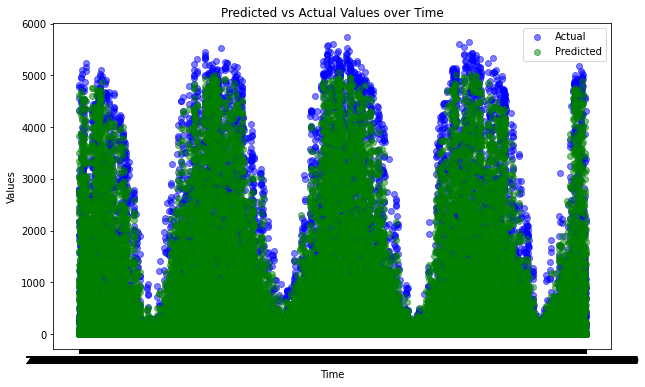

In [ ]:
import matplotlib.pyplot as plt
time_values = y_train_a['time']

# Calculate residuals
residuals = y_train_a['pv_measurement'] - pred_a_whole['pv_measurement']

# Plot actual vs. predicted values over time
plt.figure(figsize=(10, 6))

# Create a scatter plot for actual vs predicted values over time
plt.scatter(time_values, y_train_a['pv_measurement'], alpha=0.5, label='Actual', color='blue')
plt.scatter(time_values, pred_a_whole['pv_measurement'], alpha=0.5, label='Predicted', color='green')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values over Time')
plt.legend()
plt.show()

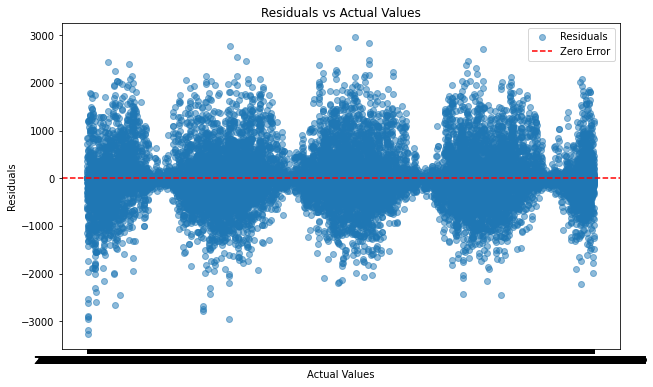

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(time_values, residuals, alpha=0.5, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error')  # Line for zero residual error
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Values')
plt.legend()
plt.show()

## **Autogluon 4x columns**
- **What we tried:**
    1. Interpolating ceiling_height
        - Helped: No
    2. Trying different validation sets (random half of estimated, half estimated + half of data in months in test_data)
        - Helped: No
    3. Train the models with different params
        - Helped: yes
        - Optimal: see code
- **Best Kaggle score: (after running for 10 hours)**
    - 142.87

In [ ]:
#!pip install autogluon
#!pip install pandas

In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.model_selection._split import _BaseKFold
from sklearn.model_selection import train_test_split

import numpy as np
import random

C:\Users\holwe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
seed_value = 42  # Replace with your desired seed value
random.seed(seed_value)
np.random.seed(seed_value)

In [ ]:
train_data_a = x_train_a2
test_data_a = x_test_a2

train_data_b = x_train_b2
test_data_b = x_test_b2

train_data_c = x_train_c2
test_data_c = x_test_c2

### 1. Tried interpolating ceiling_height
- Helped: No

In [ ]:
# # Create a copy of the slice to avoid SettingWithCopyWarning
# ceiling_height_a = x_train_a_combined[['date_forecast','ceiling_height_agl:m_Q0','ceiling_height_agl:m_Q1','ceiling_height_agl:m_Q2','ceiling_height_agl:m_Q3']].copy()

# # Convert the 'date_forecast' column to datetime using .loc
# ceiling_height_a.loc[:, 'date_forecast'] = pd.to_datetime(ceiling_height_a['date_forecast'])

# # Set the 'date_forecast' as the index
# ceiling_height_a.set_index('date_forecast', inplace=True)

# # Now proceed with your interpolation
# ceiling_height_a_interpolated = ceiling_height_a.interpolate(method='time')

# ceiling_height_a_interpolated.reset_index(inplace=True)
# # And finally, use .loc to update the train_data_a DataFrame
# train_data_a.loc[:, ['ceiling_height_agl:m_Q0','ceiling_height_agl:m_Q1','ceiling_height_agl:m_Q2','ceiling_height_agl:m_Q3']] = ceiling_height_a_interpolated

# # Check for NaN values in the original DataFrame
# train_data_a.isna().sum()

### 2. Tried different validation sets
- Helped: No
- Ended up using autogluons internal cross-validation method

In [ ]:
observed_zero = train_data_a[train_data_a['observed'] == 0]
observed_zero['forecast_month'].unique()


array([10, 11, 12,  1,  2,  3,  4], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split

def split_dataset(train_data, date_column='forecast_month', observed_column='observed'):
    """
    Splits the dataset into a training set and a validation set.
    The validation set includes approximately 50% of the estimated data, evenly distributed across months.
    Additionally, it includes about half of the observed data for May, June, and July, if present.
    The training set includes all months, excluding the observed data that is included in the validation set.
    
    :param train_data: The original training dataset as a pandas DataFrame.
    :param date_column: The name of the column that contains the month information.
    :param observed_column: The name of the column that indicates if the data is observed.
    :return: A tuple (training_set, validation_set)
    """
    # Work with a copy to avoid modifying the original DataFrame
    train_data = train_data.copy()
    train_data.sort_values(by='date_forecast', inplace=True)
    
    # Separate observed and estimated data
    estimated_data = train_data[train_data[observed_column] == 0]
    observed_data = train_data[train_data[observed_column] != 0]
    
    # Split the estimated data into training and validation sets
    estimated_train, estimated_val = train_test_split(
        estimated_data, test_size=0.5, random_state=42, stratify=estimated_data[date_column]
    )
    
    # Check if there are any observed data for May, June, and July
    if not observed_data[observed_data[date_column].isin([5, 6, 7])].empty:
        print("hellooo")
        observed_may_june_july = observed_data[observed_data[date_column].isin([5, 6, 7])]
        observed_train_mjj, observed_val_mjj = train_test_split(
            observed_may_june_july, test_size=0.5, random_state=42, stratify=observed_may_june_july[date_column]
        )
    else:
        
        observed_train_mjj = pd.DataFrame()
        observed_val_mjj = pd.DataFrame()
    
    # Combine the estimated and observed May, June, July data for the validation set
    validation_set = pd.concat([estimated_val, observed_val_mjj])
    validation_set.sort_values(by='date_forecast', inplace=True)
    
    # The rest of the observed data (excluding May, June, July) will be added to the training set
    observed_rest = observed_data[~observed_data[date_column].isin([5, 6, 7])]
    
    # Combine all training parts for the final training set
    training_set = pd.concat([estimated_train, observed_train_mjj, observed_rest])
    training_set.sort_values(by='date_forecast', inplace=True)
    
    return training_set, validation_set


# Create a copy of the DataFrame to pass to the function
# train_data_copy = train_data_a.copy()
# train_data_a, val_data_a = split_dataset(train_data_copy, 'forecast_month', 'observed')

# print(len(train_data_a))
# print(len(val_data_a))

# train_data_a.drop(columns=['date_forecast'],inplace=True)
# val_data_a.drop(columns=['date_forecast'],inplace=True)

### 3. Tried training the models with different params
- Helped: yes
- Optimal: see code

In [ ]:
predictor_a= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_a, verbosity = 0,presets='best_quality', time_limit= 1500)
predictor_b= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_b, verbosity = 0,presets='best_quality', time_limit= 1500)
predictor_c= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_c, verbosity = 0,presets='best_quality', time_limit= 1500)

In [ ]:
predictor_a.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-149.188938,32.432311,1392.113622,0.000996,0.369072,3,True,16
1,ExtraTreesMSE_BAG_L2,-150.163459,27.041173,997.323558,4.195550,40.895635,2,True,12
2,XGBoost_BAG_L2,-151.234774,23.147140,979.282969,0.301517,22.855047,2,True,14
3,WeightedEnsemble_L2,-151.455597,13.237985,646.281267,0.000000,0.313442,2,True,7
4,RandomForestMSE_BAG_L2,-151.651290,27.150475,1068.001251,4.304852,111.573328,2,True,10
5,LightGBMXT_BAG_L1,-151.901258,6.174702,275.184407,6.174702,275.184407,1,True,3
6,CatBoost_BAG_L2,-152.007170,22.951064,1010.092329,0.105441,53.664407,2,True,11
7,NeuralNetFastAI_BAG_L2,-152.266179,23.523954,1162.756133,0.678331,206.328211,2,True,13
8,LightGBM_BAG_L2,-152.392072,23.002668,970.579245,0.157045,14.151322,2,True,9
9,LightGBMXT_BAG_L2,-154.741510,23.079154,976.743476,0.233531,20.315554,2,True,8


In [ ]:
predictor_b.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-39.071064,12.543318,1198.722158,0.000000,0.185030,3,True,17
1,NeuralNetFastAI_BAG_L2,-39.264160,12.366797,1158.965005,0.483112,212.942932,2,True,14
2,WeightedEnsemble_L2,-39.475335,7.664803,445.544492,0.000000,0.159031,2,True,8
3,LightGBMXT_BAG_L1,-39.485701,4.902304,261.029939,4.902304,261.029939,1,True,3
4,LightGBMLarge_BAG_L2,-39.762324,12.060205,985.594195,0.176521,39.572123,2,True,16
5,XGBoost_BAG_L2,-39.806729,12.108225,973.654009,0.224540,27.631937,2,True,15
6,LightGBMXT_BAG_L2,-39.980705,12.072204,965.476062,0.188519,19.453990,2,True,9
7,LightGBM_BAG_L2,-40.080502,11.988696,957.705135,0.105011,11.683063,2,True,10
8,ExtraTreesMSE_BAG_L2,-40.083908,13.835861,963.106674,1.952176,17.084602,2,True,13
9,CatBoost_BAG_L2,-40.102727,11.977684,1036.707535,0.094000,90.685463,2,True,12


In [ ]:
predictor_c.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-31.162240,14.376106,1354.781825,0.000000,0.199031,3,True,18
1,NeuralNetFastAI_BAG_L2,-31.453003,10.905966,1114.579106,0.382136,161.063999,2,True,14
2,LightGBMXT_BAG_L1,-31.503435,3.853237,241.988032,3.853237,241.988032,1,True,3
3,WeightedEnsemble_L2,-31.503435,3.854236,242.158066,0.000999,0.170033,2,True,8
4,ExtraTreesMSE_BAG_L2,-31.757871,11.837406,963.221879,1.313576,9.706772,2,True,13
5,XGBoost_BAG_L2,-31.917246,10.672405,981.452165,0.148576,27.937057,2,True,15
6,RandomForestMSE_BAG_L2,-31.951825,11.689503,1000.580390,1.165673,47.065283,2,True,11
7,LightGBM_BAG_L2,-32.086834,10.625361,967.236444,0.101531,13.721337,2,True,10
8,LightGBMXT_BAG_L2,-32.373139,10.672569,972.599141,0.148739,19.084034,2,True,9
9,CatBoost_BAG_L2,-32.692435,10.605824,1016.108301,0.081994,62.593193,2,True,12


Write data to files

In [ ]:
# Make predictions for each location
y_pred_a = predictor_a.predict(test_data_a)
y_pred_a=pd.DataFrame(y_pred_a,columns=['pv_measurement']) 

y_pred_b = predictor_b.predict(test_data_b)
y_pred_b=pd.DataFrame(y_pred_b,columns=['pv_measurement'])

y_pred_c = predictor_c.predict(test_data_c)
y_pred_c=pd.DataFrame(y_pred_c,columns=['pv_measurement'])

# Write predictions to file
import os
output_dir = 'autogluon'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
# Save the dataframes into the folder
y_pred_a.to_csv(os.path.join(output_dir, 'y_pred_a.csv'))
y_pred_b.to_csv(os.path.join(output_dir, 'y_pred_b.csv'))
y_pred_c.to_csv(os.path.join(output_dir, 'y_pred_c.csv'))

Combine final prediction

In [ ]:
# Read the CSV files, use 'usecols' to skip 'Unnamed: 0' if it's always the first column
y_pred_a = pd.read_csv('autogluon/y_pred_a.csv', usecols=lambda column: column != 'Unnamed: 0')
y_pred_b = pd.read_csv('autogluon/y_pred_b.csv', usecols=lambda column: column != 'Unnamed: 0')
y_pred_c = pd.read_csv('autogluon/y_pred_c.csv', usecols=lambda column: column != 'Unnamed: 0')

# Concatenate the dataframes
predictions = pd.concat([y_pred_a, y_pred_b, y_pred_c], ignore_index=True)

# Rename the 'pv_measurement' column to 'prediction'
predictions_df = predictions.rename(columns={'pv_measurement': 'prediction'})

# Convert all negative predictions to 0
predictions_df.loc[predictions_df['prediction'] < 0, 'prediction'] = 0

# Add an 'id' column based on the length of the dataframe
predictions_df.insert(0, 'id', range(len(predictions_df)))

# Read the sample_submission CSV
sample_submission = pd.read_csv('sample_submission.csv')

# Ensure that the 'id' column in sample_submission matches the one in predictions_df
sample_submission = sample_submission.merge(predictions_df[['id', 'prediction']], on='id', how='left')

# Save the updated sample_submission to CSV without the index
predictions_df.to_csv('autogluon_prediction_four_columns_remove_consecutive_vals.csv', index=False)



## Pycaret

First we ran Pycaret with standard preprocessing, not any additional feature engineering. We fast found out that Pycaret didnt give as good results as H20 and autoglueon. Therefore we deicded to not go far in the development and testing of pycaret. However, we did some testing of lag features with pycaret, but it didnt give any improvement.

- **What we tried:**
    1. Testing pycaret with pv_measurment lag feauture
        - Helped: No
    2. Testing pycaret with seasonal lag feauture (from seasonal decomposition of Pv_measurement)
        - Helped: No
- **Best Kaggle score: (after running for 10 hours)**
    - 177.67


### 1. Testing pycaret with pv_measurment lag feauture



In [ ]:
#%pip install pycaret
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection._split import _BaseKFold
import pycaret
from pycaret.regression import * 
import pycaret.regression as pycr 
from sklearn.linear_model import LinearRegression
from pycaret.time_series import TSForecastingExperiment
from statsmodels.tsa.seasonal import seasonal_decompose
import pycaret.utils as pycu

In [ ]:
x_train_a = pd.read_csv('cleaned_data/A/x_train_a.csv')
y_train_a = pd.read_csv('cleaned_data/A/train_a.csv')
x_test_a = pd.read_csv('cleaned_data/A/x_test_a.csv')

x_train_b = pd.read_csv('cleaned_data/B/x_train_b.csv')
y_train_b = pd.read_csv('cleaned_data/B/train_b.csv')
x_test_b = pd.read_csv('cleaned_data/B/x_test_b.csv')

x_train_c = pd.read_csv('cleaned_data/C/x_train_c.csv')
y_train_c = pd.read_csv('cleaned_data/C/train_c.csv')
x_test_c = pd.read_csv('cleaned_data/C/x_test_c.csv')

In [ ]:
x_train_a_combined = x_train_a.merge(y_train_a, left_on='date_forecast', right_on='time', how='left')
x_train_a_combined['observed'] = x_train_a_combined['calc_year'].isna().astype(int)
train_data_a = x_train_a_combined.drop(['time', 'calc_year', 'calc_month', 'calc_day', 'calc_hour'], inplace=True,axis = 1)
x_test_a['observed'] = x_test_a['calc_year'].isna().astype(int)
test_data_a = x_test_a.drop([ 'calc_year', 'calc_month', 'calc_day', 'calc_hour'], axis = 1)

x_train_b_combined = x_train_b.merge(y_train_b, left_on='date_forecast', right_on='time', how='left')
x_train_b_combined['observed'] = x_train_b_combined['calc_year'].isna().astype(int)
train_data_b = x_train_b_combined.drop(['time', 'calc_year', 'calc_month', 'calc_day', 'calc_hour'], inplace=True,axis = 1)
x_test_b['observed'] = x_test_b['calc_year'].isna().astype(int)
test_data_b = x_test_b.drop([ 'calc_year', 'calc_month', 'calc_day', 'calc_hour'], axis = 1)

x_train_c_combined = x_train_c.merge(y_train_c, left_on='date_forecast', right_on='time', how='left')
x_train_c_combined['observed'] = x_train_c_combined['calc_year'].isna().astype(int)
train_data_c = x_train_c_combined.drop(['time', 'calc_year', 'calc_month', 'calc_day', 'calc_hour'],inplace=True, axis = 1)
x_test_c['observed'] = x_test_c['calc_year'].isna().astype(int)
test_data_c = x_test_c.drop([ 'calc_year', 'calc_month', 'calc_day', 'calc_hour'], axis = 1)

- Function for making lag features. As we are predicting 30 days ahead, the lag has to be more than that. Given that we are using methods such as moving window. We therefore have a function with the possibility of many different lags. As some of the date-indexes can be missing, we are using strings to find corresoponding lag values. 

In [ ]:
def add_lag_feature_and_dropna(dataframe, column_name, lag_hours):
    '''
    Add a lag feature for a given column in a DataFrame with a DateTime index and drop rows with NaN in the lagged column.
    
    Parameters:
    - dataframe: The input DataFrame with a DateTime index.
    - column_name: The name of the column to create a lag feature for.
    - lag_hours: The number of hours to lag.
    
    Returns:
    - A DataFrame with the new lagged feature column added and NaN rows dropped.
    '''
    lag_column_name = f"{column_name}_lag_{lag_hours}"
    dataframe[lag_column_name] = dataframe[column_name].shift(lag_hours)
    dataframe.dropna(subset=[lag_column_name], inplace=True)
    return dataframe

def add_multiple_lag_features_and_dropna_indexproof(dataframe, column_name, lag_list):
    """
    Add multiple lag features for a given column based on datetime values.
    This version ensures that the initial dates where we can't fetch the lagged data will have NaN values.
    
    Parameters:
    - dataframe: The input DataFrame with a DateTime column.
    - column_name: The name of the column to create lag features for.
    - lag_list: A list of tuples, where the first value indicates the unit (e.g., "hours", "days", "months", "years", "monthshours", "yearshours", "yearmonthshours")
                and the second value indicates the number. For "monthshours", the number should be a tuple itself (e.g., (1, 1) for "1 month + 1 hour").
    
    Returns:
    - A DataFrame with the new lagged feature columns added, NaN rows dropped, and an average of the lag values for each row.
    """
    df_result = dataframe.copy()
    lag_columns = []
    
    for lag_unit, lag_value in lag_list:
        if lag_unit == "hours":
            target_dates = dataframe.index - pd.DateOffset(hours=lag_value)
            lag_column_name = f"{column_name}_lag_{lag_value}h"
            
        elif lag_unit == "days":
            target_dates = dataframe.index - pd.DateOffset(days=lag_value)
            lag_column_name = f"{column_name}_lag_{lag_value}d"
            
        elif lag_unit == "months":
            target_dates = dataframe.index - pd.DateOffset(months=lag_value)
            lag_column_name = f"{column_name}_lag_{lag_value}m"
            
        elif lag_unit == "years":
            target_dates = dataframe.index - pd.DateOffset(years=lag_value)
            lag_column_name = f"{column_name}_lag_{lag_value}y"
            
        elif lag_unit == "monthshours":
            months, hours = lag_value
            target_dates = dataframe.index - pd.DateOffset(months=months, hours=hours)
            lag_column_name = f"{column_name}_lag_{months}m{hours}h"
            
        elif lag_unit == "yearshours":
            years, hours = lag_value
            target_dates = dataframe.index - pd.DateOffset(years=years, hours=hours)
            lag_column_name = f"{column_name}_lag_{years}y{hours}h"
            
        elif lag_unit == "yearmonthshours":
            years, months, hours = lag_value
            target_dates = dataframe.index - pd.DateOffset(years=years, months=months, hours=hours)
            lag_column_name = f"{column_name}_lag_{years}y{months}m{hours}h"

        lagged_values = []
        for date in target_dates:
            lagged_values.append(dataframe.loc[date, column_name] if date in dataframe.index else np.nan)

        df_result[lag_column_name] = lagged_values
        lag_columns.append(lag_column_name)
    
    # Compute the average of the lag columns
    df_result['avg_lag'] = df_result[lag_columns].mean(axis=1)
    
    # Drop rows with NaN in any of the new lagged columns
    df_result.dropna(subset=lag_columns, inplace=True)
    
    return df_result


**Data and training for A**

In [ ]:
X_train_a = x_train_a_combined.copy()
X_train_a['date_forecast'] = pd.to_datetime(X_train_a['date_forecast'])
X_train_a.set_index('date_forecast', inplace=True)
X_train_a

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,pv_measurement,observed
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.700,1.22825,1728.950,0.00,0.000,1728.950,0.0,280.300,0.000,0.0,...,3.600,-3.575,-0.500,0.0,2019,6,2,22,0.00,1
2019-06-02 23:00:00,7.700,1.22350,1689.825,0.00,0.000,1689.825,0.0,280.300,0.000,0.0,...,3.350,-3.350,0.275,0.0,2019,6,2,23,0.00,1
2019-06-03 00:00:00,7.875,1.21975,1563.225,0.00,0.000,1563.225,0.0,280.650,0.000,0.0,...,3.050,-2.950,0.750,0.0,2019,6,3,0,0.00,1
2019-06-03 01:00:00,8.425,1.21800,1283.425,834.60,0.750,1283.425,0.0,281.675,0.300,2107.1,...,2.725,-2.600,0.875,0.0,2019,6,3,1,0.00,1
2019-06-03 02:00:00,8.950,1.21800,1003.500,129872.60,23.100,1003.500,0.0,282.500,11.975,88275.8,...,2.550,-2.350,0.925,0.0,2019,6,3,2,19.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.550,1.27650,1674.200,337859.78,4.225,542.700,0.0,272.425,2.825,225724.2,...,5.175,4.800,1.925,0.0,2023,4,30,19,9.02,0
2023-04-30 20:00:00,4.500,1.27975,1762.400,9083.50,0.000,546.400,0.0,272.300,0.000,20271.5,...,4.650,4.025,2.300,0.0,2023,4,30,20,0.00,0
2023-04-30 21:00:00,4.500,1.28100,1696.650,0.00,0.000,548.350,0.0,272.300,0.000,0.0,...,4.450,3.575,2.600,0.0,2023,4,30,21,0.00,0


- Making Pv_measurement lag features, as can be seen in the last columns in the table below #triedFeatEng123

In [ ]:
lags_all = [("years", 1), ("yearshours", (1,2)),("yearshours", (1,-1)),
            
          ("yearmonthshours", (1,1,0)), ("yearmonthshours", (1,1,1)),("yearmonthshours", (1,1,-1)),
        ("yearmonthshours", (1,-1,0)), ("yearmonthshours", (1,-1,1)),("yearmonthshours", (1,-1,-1))]
            
df_pvm_lag_A = add_multiple_lag_features_and_dropna_indexproof(X_train_a, "pv_measurement",lags_all)
df_pvm_lag_A

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,pv_measurement_lag_1y,pv_measurement_lag_1y2h,pv_measurement_lag_1y-1h,pv_measurement_lag_1y1m0h,pv_measurement_lag_1y1m1h,pv_measurement_lag_1y1m-1h,pv_measurement_lag_1y-1m0h,pv_measurement_lag_1y-1m1h,pv_measurement_lag_1y-1m-1h,avg_lag
date_forecast,,,,,,,,,,,,,,,,,,,,,
2020-07-02 23:00:00,7.70,1.23225,4465.100,0.00,0.000,669.400,0.0,280.15002,0.000,0.0,...,0.00,1.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.122222
2020-07-03 00:00:00,7.60,1.23350,4445.875,0.00,0.000,493.350,0.0,280.00000,0.000,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
2020-07-03 01:00:00,7.60,1.23400,4715.300,1505.30,1.350,417.325,0.0,279.90000,0.875,6268.5,...,0.00,0.00,36.08,0.00,0.00,19.36,0.00,0.00,0.00,6.160000
2020-07-03 02:00:00,7.60,1.23325,4801.750,153324.69,25.275,378.450,0.0,279.95000,15.725,119383.5,...,36.08,0.00,326.70,19.36,0.00,251.02,0.00,0.00,20.24,72.600000
2020-07-03 03:00:00,7.60,1.23175,5191.750,749727.50,86.350,784.200,0.0,280.10000,47.200,453031.5,...,326.70,0.00,456.06,251.02,19.36,263.78,20.24,0.00,158.84,166.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.55,1.27650,1674.200,337859.78,4.225,542.700,0.0,272.42500,2.825,225724.2,...,1.10,223.74,0.00,0.00,0.00,0.00,300.74,587.84,69.30,131.413333
2023-04-30 20:00:00,4.50,1.27975,1762.400,9083.50,0.000,546.400,0.0,272.30000,0.000,20271.5,...,0.00,84.70,0.00,0.00,0.00,0.00,69.30,300.74,0.00,50.526667
2023-04-30 21:00:00,4.50,1.28100,1696.650,0.00,0.000,548.350,0.0,272.30000,0.000,0.0,...,0.00,1.10,0.00,0.00,0.00,0.00,0.00,69.30,0.00,7.822222


- Pycaret initialization 

In [ ]:
pycaret_ml_A = setup(data = X_train_a, target = "pv_measurement")


,Description,Value
0,Session id,3415
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(34022, 51)"
4,Transformed data shape,"(34022, 51)"
5,Transformed train set shape,"(23815, 51)"
6,Transformed test set shape,"(10207, 51)"
7,Numeric features,50
8,Rows with missing values,97.4%
9,Preprocess,True


In [ ]:
best_model_A = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,180.4462,163145.1097,403.6287,0.8805,0.5918,1.3443,5.4020
lightgbm,Light Gradient Boosting Machine,180.5997,159951.6919,399.7166,0.8828,1.2016,1.4480,0.3510
catboost,CatBoost Regressor,182.7307,153109.8769,391.0114,0.8879,1.9269,2.3936,10.4460
rf,Random Forest Regressor,185.5166,172109.9580,414.6771,0.8739,0.6005,1.3731,18.3120
xgboost,Extreme Gradient Boosting,188.7385,170018.5219,411.9999,0.8756,1.6167,1.9410,4.2640
gbr,Gradient Boosting Regressor,205.8934,189315.9366,434.8991,0.8613,1.8817,2.8711,6.5260
huber,Huber Regressor,249.6172,289520.9494,537.9672,0.7879,0.9711,2.7302,0.3870
en,Elastic Net,250.2326,228444.6987,477.7992,0.8326,2.7730,5.3669,0.6420
llar,Lasso Least Angle Regression,254.3526,226448.2920,475.6990,0.8341,2.8494,6.1512,0.0560
lasso,Lasso Regression,254.4964,226611.3795,475.8710,0.8339,2.8518,6.1180,0.6290


- From the leaderboard we se that it did okay. Comparing it to the other autoMLs we didnt see any serious signs that pycaret would be the best yet. 

**Data and training for B**

In [ ]:
X_train_b = x_train_b_combined.copy()
X_train_b['date_forecast'] = pd.to_datetime(X_train_b['date_forecast'])
X_train_b.set_index('date_forecast', inplace=True)
X_train_b

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,pv_measurement,observed
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5.525,1.23975,1200.6750,0.0,0.000,1200.6750,0.0,275.150,0.000,0.00,...,2.800,1.175,2.550,0.0,2019,1,1,0,0.000000,1
2019-01-01 01:00:00,5.425,1.23975,1131.4249,0.0,0.000,1131.4249,0.0,274.825,0.000,0.00,...,3.550,1.525,3.200,0.0,2019,1,1,1,0.000000,1
2019-01-01 02:00:00,5.400,1.23850,1061.0000,0.0,0.000,1061.0000,0.0,274.800,0.000,0.00,...,4.025,2.150,3.425,0.0,2019,1,1,2,0.000000,1
2019-01-01 03:00:00,5.350,1.23975,1021.1500,0.0,0.000,1021.1500,0.0,274.675,0.000,0.00,...,4.900,3.425,3.500,0.0,2019,1,1,3,0.000000,1
2019-01-01 04:00:00,5.675,1.23750,1033.7000,0.0,0.000,1033.7000,0.0,275.500,0.000,0.00,...,6.050,5.575,2.200,0.0,2019,1,1,4,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.550,1.27650,1677.9500,337850.1,4.225,542.8500,0.0,272.425,2.825,225735.89,...,5.175,4.800,1.925,0.0,2023,4,30,19,0.828587,0
2023-04-30 20:00:00,4.500,1.27875,1766.5000,9083.1,0.000,546.3500,0.0,272.300,0.000,20268.10,...,4.650,4.025,2.300,0.0,2023,4,30,20,-0.000000,0
2023-04-30 21:00:00,4.500,1.27900,1698.9250,0.0,0.000,548.0500,0.0,272.300,0.000,0.00,...,4.450,3.600,2.600,0.0,2023,4,30,21,-0.000000,0


In [ ]:

df_pvm_lag_B = add_multiple_lag_features_and_dropna_indexproof(X_train_b, "pv_measurement",lags_all)
df_pvm_lag_B

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,pv_measurement_lag_1y,pv_measurement_lag_1y2h,pv_measurement_lag_1y-1h,pv_measurement_lag_1y1m0h,pv_measurement_lag_1y1m1h,pv_measurement_lag_1y1m-1h,pv_measurement_lag_1y-1m0h,pv_measurement_lag_1y-1m1h,pv_measurement_lag_1y-1m-1h,avg_lag
date_forecast,,,,,,,,,,,,,,,,,,,,,
2020-02-01 01:00:00,4.250,1.22975,1578.575,0.0,0.000,1578.575,0.0,271.525,0.000,0.00,...,0.0000,0.0,0.0000,0.0,0.0,0.000,0.0000,0.0000,0.0000,0.000000
2020-02-01 02:00:00,4.100,1.22750,1496.975,0.0,0.000,1496.975,0.0,271.100,0.000,0.00,...,0.0000,0.0,0.0000,0.0,0.0,0.000,0.0000,0.0000,0.0000,0.000000
2020-02-01 03:00:00,4.175,1.22550,1375.675,0.0,0.000,1375.675,0.0,271.300,0.000,0.00,...,0.0000,0.0,0.0000,0.0,0.0,0.000,0.0000,0.0000,0.0000,0.000000
2020-02-01 04:00:00,4.450,1.22575,1188.700,0.0,0.000,1188.700,0.0,272.025,0.000,0.00,...,0.0000,0.0,0.0000,0.0,0.0,0.000,0.0000,0.0000,0.0000,0.000000
2020-02-01 05:00:00,4.725,1.22675,996.125,0.0,0.000,996.125,0.0,272.875,0.000,0.00,...,0.0000,0.0,0.0000,0.0,0.0,0.000,0.0000,0.0000,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-19 03:00:00,3.550,1.29600,7052.100,0.0,0.000,6678.800,0.0,269.100,0.000,0.00,...,0.0000,0.0,0.0000,0.0,0.0,0.000,0.0000,0.0000,26.7375,2.970833
2023-03-19 04:00:00,3.375,1.29625,6946.750,0.0,0.000,6441.075,0.0,268.450,0.000,0.00,...,0.0000,0.0,6.9000,0.0,0.0,0.000,26.7375,0.0000,126.7875,17.825000
2023-03-19 05:00:00,3.250,1.29750,6842.025,2706.4,2.425,6303.800,0.0,267.925,2.425,17505.50,...,6.9000,0.0,75.0375,0.0,0.0,0.000,126.7875,26.7375,331.2000,62.962500


In [ ]:
X_train_b

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,pv_measurement,observed
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5.525,1.23975,1200.6750,0.0,0.000,1200.6750,0.0,275.150,0.000,0.00,...,2.800,1.175,2.550,0.0,2019,1,1,0,0.000000,1
2019-01-01 01:00:00,5.425,1.23975,1131.4249,0.0,0.000,1131.4249,0.0,274.825,0.000,0.00,...,3.550,1.525,3.200,0.0,2019,1,1,1,0.000000,1
2019-01-01 02:00:00,5.400,1.23850,1061.0000,0.0,0.000,1061.0000,0.0,274.800,0.000,0.00,...,4.025,2.150,3.425,0.0,2019,1,1,2,0.000000,1
2019-01-01 03:00:00,5.350,1.23975,1021.1500,0.0,0.000,1021.1500,0.0,274.675,0.000,0.00,...,4.900,3.425,3.500,0.0,2019,1,1,3,0.000000,1
2019-01-01 04:00:00,5.675,1.23750,1033.7000,0.0,0.000,1033.7000,0.0,275.500,0.000,0.00,...,6.050,5.575,2.200,0.0,2019,1,1,4,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.550,1.27650,1677.9500,337850.1,4.225,542.8500,0.0,272.425,2.825,225735.89,...,5.175,4.800,1.925,0.0,2023,4,30,19,0.828587,0
2023-04-30 20:00:00,4.500,1.27875,1766.5000,9083.1,0.000,546.3500,0.0,272.300,0.000,20268.10,...,4.650,4.025,2.300,0.0,2023,4,30,20,-0.000000,0
2023-04-30 21:00:00,4.500,1.27900,1698.9250,0.0,0.000,548.0500,0.0,272.300,0.000,0.00,...,4.450,3.600,2.600,0.0,2023,4,30,21,-0.000000,0


In [ ]:
pycaret_ml_B = setup(data = X_train_b, target = "pv_measurement")

,Description,Value
0,Session id,6997
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(27053, 51)"
4,Transformed data shape,"(27053, 51)"
5,Transformed train set shape,"(18937, 51)"
6,Transformed test set shape,"(8116, 51)"
7,Numeric features,50
8,Rows with missing values,96.5%
9,Preprocess,True


In [ ]:
best_model_B = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,26.7937,4106.1906,64.0491,0.9040,0.7155,1.8760,4.2190
catboost,CatBoost Regressor,26.8114,3755.4339,61.2465,0.9121,1.0786,5.6719,8.9180
lightgbm,Light Gradient Boosting Machine,26.8702,3950.9797,62.8306,0.9075,0.8333,2.3892,0.2970
rf,Random Forest Regressor,27.6909,4300.7940,65.5613,0.8995,0.7303,1.6838,16.1910
xgboost,Extreme Gradient Boosting,28.0631,4303.3974,65.5829,0.8993,0.9547,3.0181,3.5230
gbr,Gradient Boosting Regressor,30.7131,4736.6804,68.8082,0.8893,1.1013,3.1823,5.2600
dt,Decision Tree Regressor,36.4553,8196.6354,90.4409,0.8078,0.7919,1.6261,0.2830
llar,Lasso Least Angle Regression,38.5912,5862.5023,76.5273,0.8631,1.7502,6.0204,0.0470
lasso,Lasso Regression,38.5929,5862.1456,76.5251,0.8631,1.7505,6.0811,0.4360
br,Bayesian Ridge,39.2920,5808.0593,76.1745,0.8644,1.8338,10.4535,0.0650


**Data and training for C**

In [ ]:
X_train_c = x_train_c_combined.copy()
X_train_c['date_forecast'] = pd.to_datetime(X_train_c['date_forecast'])
X_train_c.set_index('date_forecast', inplace=True)
X_train_c

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,pv_measurement,observed
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-09-04 08:00:00,6.625,1.22075,2287.250,5283377.5,421.225,2287.250,0.0,278.20000,67.975,932039.7,...,1.250,-0.825,0.825,0.0,2019,9,4,8,137.20,1
2019-09-04 09:00:00,6.275,1.21425,2679.075,6726922.0,508.125,2679.075,0.0,277.42500,76.625,1041404.3,...,1.500,-1.500,-0.200,0.0,2019,9,4,9,0.00,1
2019-09-04 10:00:00,5.900,1.20825,2983.750,7747199.5,561.875,2983.750,0.0,276.65002,112.575,1362371.1,...,2.000,-2.000,-0.225,0.0,2019,9,4,10,0.00,1
2019-09-04 11:00:00,5.875,1.20350,3286.550,8254105.0,578.025,3286.550,0.0,276.65000,195.150,2215590.5,...,1.950,-1.950,-0.250,0.0,2019,9,4,11,0.00,1
2019-09-04 12:00:00,6.150,1.20175,3453.425,8205280.0,555.175,3453.425,0.0,277.25000,243.375,3157120.2,...,1.525,-1.500,-0.300,0.0,2019,9,4,12,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.400,1.27550,1456.575,336040.6,4.175,551.225,0.0,272.02500,2.775,219096.0,...,4.075,3.600,1.875,0.0,2023,4,30,19,50.96,0
2023-04-30 20:00:00,4.400,1.27850,1476.350,8827.2,0.000,564.100,0.0,271.95000,0.000,19936.2,...,3.600,2.950,2.125,0.0,2023,4,30,20,2.94,0
2023-04-30 21:00:00,4.400,1.27900,1516.300,0.0,0.000,578.700,0.0,271.90000,0.000,0.0,...,3.600,2.625,2.400,0.0,2023,4,30,21,0.00,0


In [ ]:

df_pvm_lag_C = add_multiple_lag_features_and_dropna_indexproof(X_train_c, "pv_measurement",lags_all)
df_pvm_lag_C

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,pv_measurement_lag_1y,pv_measurement_lag_1y2h,pv_measurement_lag_1y-1h,pv_measurement_lag_1y1m0h,pv_measurement_lag_1y1m1h,pv_measurement_lag_1y1m-1h,pv_measurement_lag_1y-1m0h,pv_measurement_lag_1y-1m1h,pv_measurement_lag_1y-1m-1h,avg_lag
date_forecast,,,,,,,,,,,,,,,,,,,,,
2020-10-04 09:00:00,8.40,1.20575,NaN,3777675.8,298.650,3287.975,0.0,281.80000,58.625000,804660.5,...,245.0,68.6,333.2,0.0,137.2,0.0,58.8,29.4,88.2,106.711111
2020-10-04 10:00:00,8.35,1.20150,NaN,4670687.0,344.200,1167.750,0.0,281.72500,62.050000,869085.0,...,333.2,137.2,441.0,0.0,0.0,0.0,88.2,58.8,98.0,128.488889
2020-10-04 11:00:00,8.50,1.19900,NaN,5063742.0,352.725,930.950,0.0,282.02500,65.524994,918814.2,...,441.0,245.0,382.2,0.0,0.0,0.0,98.0,88.2,78.4,148.088889
2020-10-04 12:00:00,8.65,1.19825,8149.1,4912074.5,323.300,991.025,0.0,282.27500,74.575000,1008793.7,...,382.2,333.2,274.4,0.0,0.0,0.0,78.4,98.0,39.2,133.933333
2020-10-04 13:00:00,8.65,1.19900,8149.1,4232460.0,259.250,3108.700,0.0,282.25000,73.800000,1068125.1,...,274.4,441.0,156.8,0.0,0.0,0.0,39.2,78.4,9.8,111.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-21 07:00:00,2.80,1.30250,NaN,0.0,0.000,802.200,0.0,265.95000,0.000000,0.0,...,0.0,0.0,9.8,49.0,9.8,78.4,0.0,0.0,0.0,16.333333
2022-11-21 08:00:00,2.80,1.29950,NaN,25546.1,7.450,802.200,0.0,265.90000,5.125000,36890.2,...,9.8,0.0,19.6,78.4,49.0,88.2,0.0,0.0,0.0,27.222222
2022-11-21 09:00:00,2.80,1.29475,NaN,302288.3,35.575,NaN,0.0,265.80000,21.500000,191699.2,...,19.6,0.0,29.4,88.2,78.4,78.4,0.0,0.0,9.8,33.755556


In [ ]:
X_train_c

In [ ]:
pycaret_ml_C = setup(data = X_train_c, target = "pv_measurement")

,Description,Value
0,Session id,4062
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(7585, 61)"
4,Transformed data shape,"(7585, 61)"
5,Transformed train set shape,"(5309, 61)"
6,Transformed test set shape,"(2276, 61)"
7,Numeric features,60
8,Rows with missing values,99.7%
9,Preprocess,True


In [ ]:
best_model_C = compare_models(sort='MAE')
#32.1126 raw
#26.48  with lags [("monthshours", (1,1)),
          #("monthshours", (1,24)),("monthshours", (1,24-1)),("monthshours", (1,24+1)),
          #("monthshours", (1,24*2)),("monthshours", (1,24*2-1)),("monthshours", (1,24*2+1))]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,26.0773,2985.7418,54.4779,0.9195,0.8734,0.4127,6.9790
et,Extra Trees Regressor,26.2844,3262.9475,56.9789,0.9119,0.6248,0.4722,1.1060
lightgbm,Light Gradient Boosting Machine,26.2941,3136.3986,55.8842,0.9153,0.7133,0.4415,0.2180
rf,Random Forest Regressor,27.2053,3440.9578,58.5344,0.9069,0.6390,0.4952,3.5770
xgboost,Extreme Gradient Boosting,28.4409,3740.2264,60.9710,0.8988,0.7656,0.4649,1.2480
gbr,Gradient Boosting Regressor,29.5661,3722.4626,60.8447,0.8996,0.9647,0.5033,1.6510
lasso,Lasso Regression,35.7817,4397.2819,66.1463,0.8809,1.6105,0.6539,0.1480
llar,Lasso Least Angle Regression,35.7847,4398.2691,66.1536,0.8809,1.6106,0.6539,0.0370
huber,Huber Regressor,35.9047,5270.9637,72.5062,0.8577,1.1365,0.6864,0.1080
en,Elastic Net,36.2350,4486.8088,66.8348,0.8785,1.6316,0.6716,0.1880


The best model does okay, but as good as when benchmarked against the other models from our other AutoMLs.  

**Setting up the test data**
- Includes some printing to see to test if my preprocessing is correct

In [ ]:
def set_datetime_index_corrected(dataframe, year_col='forecast_year', month_col='forecast_month', day_col='forecast_day', hour_col='forecast_hour'):

    # Combine the year, month, day, and hour columns to create a datetime series
    datetime_series = pd.to_datetime(dataframe[year_col].astype(str) + '-' + 
                                     dataframe[month_col].astype(str) + '-' + 
                                     dataframe[day_col].astype(str) + ' ' + 
                                     dataframe[hour_col].astype(str) + ':00:00')
    
    # Set this datetime series as the dataframe's index
    dataframe.set_index(datetime_series, inplace=True)
    
    # Return the modified dataframe
    return dataframe

In [ ]:
##### A ####

test_data_a_copy = test_data_a.copy().drop(columns=["location"])
X_train_a_copy = X_train_a.copy()
test_data_a_dtidx = set_datetime_index_corrected(test_data_a_copy,year_col='forecast_year', month_col='forecast_month', day_col='forecast_day', hour_col='forecast_hour')
combined_test_train_a = pd.concat([X_train_a_copy,test_data_a_dtidx], axis =0)
pvm_lag_test_train_A = add_multiple_lag_features_and_dropna_indexproof(combined_test_train_a, "pv_measurement",lags_all)
test_lag_A = pvm_lag_test_train_A.loc["2023-05-01 00:00:00":].drop(columns=["pv_measurement"])

In [ ]:
##### B ####

test_data_b_copy = test_data_b.copy().drop(columns=["location"])
X_train_b_copy = X_train_b.copy()
test_data_b_dtidx = set_datetime_index_corrected(test_data_b_copy,year_col='forecast_year', month_col='forecast_month', day_col='forecast_day', hour_col='forecast_hour')
combined_test_train_b = pd.concat([X_train_b_copy,test_data_b_dtidx], axis =0)
pvm_lag_test_train_B = add_multiple_lag_features_and_dropna_indexproof(combined_test_train_b, "pv_measurement",lags_all)
test_lag_B = pvm_lag_test_train_B.loc["2023-05-01 00:00:00":].drop(columns=["pv_measurement"])


In [ ]:
##### C ####

test_data_c_copy = test_data_a.copy().drop(columns=["location"])
X_train_c_copy = X_train_c.copy()
test_data_c_dtidx = set_datetime_index_corrected(test_data_c_copy,year_col='forecast_year', month_col='forecast_month', day_col='forecast_day', hour_col='forecast_hour')
combined_test_train_c = pd.concat([X_train_c_copy,test_data_c_dtidx], axis =0)
pvm_lag_test_train_C = add_multiple_lag_features_and_dropna_indexproof(combined_test_train_c, "pv_measurement",lags_all)
test_lag_C = pvm_lag_test_train_C.loc["2023-05-01 00:00:00":].drop(columns=["pv_measurement"])

In [ ]:
y_pred_a = predict_model(best_model_A, data=test_lag_A)
df_y_pred_a = y_pred_a[['prediction_label']].copy()
df_y_pred_a.columns = ['pv_measurement']
print(df_y_pred_a) #print the DataFrame

                     pv_measurement
2023-05-01 00:00:00       -1.305224
2023-05-01 01:00:00       -1.305224
2023-05-01 02:00:00       -1.305224
2023-05-01 03:00:00       50.723522
2023-05-01 04:00:00      400.496231
...                             ...
2023-07-03 19:00:00      144.999344
2023-07-03 20:00:00      -37.893918
2023-07-03 21:00:00      -87.719269
2023-07-03 22:00:00      -87.661979
2023-07-03 23:00:00     -123.177398

[720 rows x 1 columns]


In [ ]:
y_pred_b = predict_model(best_model_B, data=test_lag_B)
df_y_pred_b = y_pred_b[['prediction_label']].copy()
df_y_pred_b.columns = ['pv_measurement']
df_y_pred_b #print the DataFrame

,pv_measurement
2023-05-01 00:00:00,0.000000
2023-05-01 01:00:00,0.000000
2023-05-01 02:00:00,0.000000
2023-05-01 03:00:00,4.027863
2023-05-01 04:00:00,50.811223
...,...
2023-07-03 19:00:00,38.730593
2023-07-03 20:00:00,14.568682
2023-07-03 21:00:00,16.768368
2023-07-03 22:00:00,4.355625


In [ ]:
y_pred_c = predict_model(best_model_C, data=test_lag_C)
df_y_pred_c = y_pred_c[['prediction_label']].copy()
df_y_pred_c.columns = ['pv_measurement']
df_y_pred_c #print the DataFrame


,pv_measurement
2023-05-01 00:00:00,0.438456
2023-05-01 01:00:00,0.438456
2023-05-01 02:00:00,0.438456
2023-05-01 03:00:00,2.517790
2023-05-01 04:00:00,13.706025
...,...
2023-07-03 19:00:00,45.463205
2023-07-03 20:00:00,10.738984
2023-07-03 21:00:00,2.196515
2023-07-03 22:00:00,-0.062311


In [ ]:
predictions = pd.concat([df_y_pred_a,df_y_pred_b, df_y_pred_c], ignore_index= True)
predictions.tail()

,pv_measurement
2155,45.463205
2156,10.738984
2157,2.196515
2158,-0.062311
2159,-0.453361


In [ ]:
predictions_df = predictions.rename(columns={'pv_measurement': 'prediction'})
sample_submission = pd.read_csv('sample_submission.csv')
# Convert all negative predictions to 0
predictions_df.loc[predictions_df['prediction'] < 0, 'prediction'] = 0

# Join the 'id' column from sample_submission with the predictions
sample_submission['prediction'] = predictions_df['prediction']

# Save to CSV
sample_submission.to_csv('pycaret_prediction.csv', index=False)
predictions_df

,prediction
0,0.000000
1,0.000000
2,0.000000
3,50.723522
4,400.496231
...,...
2155,45.463205
2156,10.738984
2157,2.196515
2158,0.000000


The predictions were submitted to kaggle, but didnt beat or come close to any of the other previously submitted models. However we wanted to test more lag features, and therefore started to test seasonal decomposition and seasonal lag features.

### 2. Testing pycaret with seasonal lag feauture (from seasonal decomposition of Pv_measurement)


- Adding a seasonal decomposition of pv_measurement to table A feature (FeatEng123)

In [ ]:
copyA = x_train_a_combined.copy()
copyA['date_forecast'] = pd.to_datetime(copyA['date_forecast'])
copyA.set_index('date_forecast', inplace=True)

result_yr_seasonal_A = seasonal_decompose(copyA["pv_measurement"], model='additive', period=24*365)
#result_yr_seasonal.plot()
#plt.show()
seasonal_year_A = result_yr_seasonal_A.seasonal
trend_year_A = result_yr_seasonal_A.trend
residual_year_A = result_yr_seasonal_A.resid

df_seasonal_A = pd.DataFrame(index=copyA.index)
df_seasonal_A["seasonal_yr"] = seasonal_year_A

x_train_combined_a_seasonal_only_feat = copyA.merge(df_seasonal_A, left_index=True,right_index=True )
x_train_combined_a_seasonal_feat = x_train_combined_a_seasonal_only_feat
column = "seasonal_yr"
x_train_combined_a_seasonal_feat[column] = (x_train_combined_a_seasonal_feat[column] /x_train_combined_a_seasonal_feat[column].abs().max())


print(x_train_combined_a_seasonal_feat.loc["2020-07-07 21:00:00","pv_measurement"])
print(x_train_combined_a_seasonal_feat.loc["2020-06-06 20:00:00","pv_measurement"])
x_train_combined_a_seasonal_feat

date_forecast
2019-06-02 22:00:00    2293.098314
2019-06-02 23:00:00    2869.718314
2019-06-03 00:00:00    2624.638314
2019-06-03 01:00:00    2562.964981
2019-06-03 02:00:00    2354.478314
                          ...     
2023-04-30 19:00:00     764.204761
2023-04-30 20:00:00    1357.650119
2023-04-30 21:00:00    1137.317373
2023-04-30 22:00:00     971.162503
2023-04-30 23:00:00     704.352861
Name: seasonal, Length: 34022, dtype: float64

0.22
41.36


,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,pv_measurement,observed,seasonal_yr
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.700,1.22825,1728.950,0.00,0.000,1728.950,0.0,280.300,0.000,0.0,...,-3.575,-0.500,0.0,2019,6,2,22,0.00,1,0.599342
2019-06-02 23:00:00,7.700,1.22350,1689.825,0.00,0.000,1689.825,0.0,280.300,0.000,0.0,...,-3.350,0.275,0.0,2019,6,2,23,0.00,1,0.750052
2019-06-03 00:00:00,7.875,1.21975,1563.225,0.00,0.000,1563.225,0.0,280.650,0.000,0.0,...,-2.950,0.750,0.0,2019,6,3,0,0.00,1,0.685996
2019-06-03 01:00:00,8.425,1.21800,1283.425,834.60,0.750,1283.425,0.0,281.675,0.300,2107.1,...,-2.600,0.875,0.0,2019,6,3,1,0.00,1,0.669876
2019-06-03 02:00:00,8.950,1.21800,1003.500,129872.60,23.100,1003.500,0.0,282.500,11.975,88275.8,...,-2.350,0.925,0.0,2019,6,3,2,19.36,1,0.615384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.550,1.27650,1674.200,337859.78,4.225,542.700,0.0,272.425,2.825,225724.2,...,4.800,1.925,0.0,2023,4,30,19,9.02,0,0.199738
2023-04-30 20:00:00,4.500,1.27975,1762.400,9083.50,0.000,546.400,0.0,272.300,0.000,20271.5,...,4.025,2.300,0.0,2023,4,30,20,0.00,0,0.354846
2023-04-30 21:00:00,4.500,1.28100,1696.650,0.00,0.000,548.350,0.0,272.300,0.000,0.0,...,3.575,2.600,0.0,2023,4,30,21,0.00,0,0.297258


- Making seasonal lag of one year, as it has a seasonality of one year (summer/winter) features from the seasonal column (FeatEng123)

In [ ]:
#make seasonal lag feature
dataframe_seasonal_lag_A = add_lag_feature_and_dropna(x_train_combined_a_seasonal_feat, "seasonal_yr", 24*365)
display(dataframe_seasonal_lag_A)
dataframe_seasonal_lag_A.drop(columns= ["seasonal_yr"], inplace= True)
display(dataframe_seasonal_lag_A)

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,pv_measurement,observed,seasonal_yr,seasonal_yr_lag_8760
date_forecast,,,,,,,,,,,,,,,,,,,,,
2020-06-02 08:00:00,7.500,1.22200,6152.650,8987848.00,675.850,2254.150,0.0,280.15002,115.475,1704945.1,...,-1.150,0.0,2020,6,2,8,3751.22,1,0.599342,0.599342
2020-06-02 09:00:00,7.600,1.21650,6818.350,10353380.00,757.225,1702.050,0.0,280.42500,148.800,1902941.8,...,-1.525,0.0,2020,6,2,9,5196.18,1,0.750052,0.750052
2020-06-02 10:00:00,7.825,1.21375,6533.900,11300896.00,806.650,1637.550,0.0,280.90000,188.225,2426745.0,...,-1.800,0.0,2020,6,2,10,5038.00,1,0.685996,0.685996
2020-06-02 11:00:00,8.050,1.21250,6493.475,11759154.00,820.475,1633.225,0.0,281.30000,211.300,2876447.0,...,-1.900,0.0,2020,6,2,11,4487.78,1,0.669876,0.669876
2020-06-02 12:00:00,8.250,1.21225,6660.150,11694132.00,797.700,1516.050,0.0,281.67500,297.175,3660937.5,...,-2.050,0.0,2020,6,2,12,4330.70,1,0.615384,0.615384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.550,1.27650,1674.200,337859.78,4.225,542.700,0.0,272.42500,2.825,225724.2,...,1.925,0.0,2023,4,30,19,9.02,0,0.199738,0.199738
2023-04-30 20:00:00,4.500,1.27975,1762.400,9083.50,0.000,546.400,0.0,272.30000,0.000,20271.5,...,2.300,0.0,2023,4,30,20,0.00,0,0.354846,0.354846
2023-04-30 21:00:00,4.500,1.28100,1696.650,0.00,0.000,548.350,0.0,272.30000,0.000,0.0,...,2.600,0.0,2023,4,30,21,0.00,0,0.297258,0.297258


,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,pv_measurement,observed,seasonal_yr_lag_8760
date_forecast,,,,,,,,,,,,,,,,,,,,,
2020-06-02 08:00:00,7.500,1.22200,6152.650,8987848.00,675.850,2254.150,0.0,280.15002,115.475,1704945.1,...,1.750,-1.150,0.0,2020,6,2,8,3751.22,1,0.599342
2020-06-02 09:00:00,7.600,1.21650,6818.350,10353380.00,757.225,1702.050,0.0,280.42500,148.800,1902941.8,...,1.650,-1.525,0.0,2020,6,2,9,5196.18,1,0.750052
2020-06-02 10:00:00,7.825,1.21375,6533.900,11300896.00,806.650,1637.550,0.0,280.90000,188.225,2426745.0,...,2.000,-1.800,0.0,2020,6,2,10,5038.00,1,0.685996
2020-06-02 11:00:00,8.050,1.21250,6493.475,11759154.00,820.475,1633.225,0.0,281.30000,211.300,2876447.0,...,2.350,-1.900,0.0,2020,6,2,11,4487.78,1,0.669876
2020-06-02 12:00:00,8.250,1.21225,6660.150,11694132.00,797.700,1516.050,0.0,281.67500,297.175,3660937.5,...,2.750,-2.050,0.0,2020,6,2,12,4330.70,1,0.615384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.550,1.27650,1674.200,337859.78,4.225,542.700,0.0,272.42500,2.825,225724.2,...,4.800,1.925,0.0,2023,4,30,19,9.02,0,0.199738
2023-04-30 20:00:00,4.500,1.27975,1762.400,9083.50,0.000,546.400,0.0,272.30000,0.000,20271.5,...,4.025,2.300,0.0,2023,4,30,20,0.00,0,0.354846
2023-04-30 21:00:00,4.500,1.28100,1696.650,0.00,0.000,548.350,0.0,272.30000,0.000,0.0,...,3.575,2.600,0.0,2023,4,30,21,0.00,0,0.297258


In [ ]:
pycaret_ml_A = setup(data = dataframe_seasonal_lag_A, target = "pv_measurement")

,Description,Value
0,Session id,4028
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(25262, 52)"
4,Transformed data shape,"(25262, 52)"
5,Transformed train set shape,"(17683, 52)"
6,Transformed test set shape,"(7579, 52)"
7,Numeric features,51
8,Rows with missing values,96.7%
9,Preprocess,True


- Can see that it gets a pretty low MAE compared to the model with pv_measurement lag feature, interesting

In [ ]:
best_model_A = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,135.6787,90894.5623,301.0369,0.9352,1.1616,1.3250,0.3100
catboost,CatBoost Regressor,138.2740,86344.3576,293.4477,0.9385,1.8614,2.2314,10.0070
et,Extra Trees Regressor,139.1877,101774.3846,318.7300,0.9274,0.5356,1.1488,3.9380
rf,Random Forest Regressor,141.2678,106580.2378,326.1222,0.9241,0.5450,1.1943,14.0000
xgboost,Extreme Gradient Boosting,147.1834,105346.0906,324.3559,0.9249,1.5637,1.7138,3.5220
gbr,Gradient Boosting Regressor,180.3320,136313.6618,368.9343,0.9028,1.9528,2.7738,5.1990
dt,Decision Tree Regressor,194.1917,221911.8417,470.4090,0.8418,0.6779,1.3218,0.3520
huber,Huber Regressor,243.5059,275539.3920,524.5148,0.8038,0.9508,2.7099,0.2860
en,Elastic Net,245.5469,216334.6414,464.7402,0.8460,2.7954,4.7408,0.5250
llar,Lasso Least Angle Regression,255.6046,206751.5693,454.3587,0.8527,3.0002,7.2416,0.0500


In [ ]:
#################### B ####################


In [ ]:
copyB = x_train_b_combined.copy()
copyB['date_forecast'] = pd.to_datetime(copyB['date_forecast'])
copyB.set_index('date_forecast', inplace=True)

result_yr_seasonal_B = seasonal_decompose(copyB["pv_measurement"], model='additive', period=24*365)
#result_yr_seasonal.plot()
#plt.show()
seasonal_year_B = result_yr_seasonal_B.seasonal
trend_year_B = result_yr_seasonal_B.trend
residual_year_B = result_yr_seasonal_B.resid

df_seasonal_B = pd.DataFrame(index=copyB.index)
df_seasonal_B["seasonal_yr"] = seasonal_year_B

x_train_combined_b_seasonal_only_feat = copyB.merge(df_seasonal_B, left_index=True,right_index=True )
x_train_combined_b_seasonal_feat = x_train_combined_b_seasonal_only_feat
column = "seasonal_yr"
x_train_combined_b_seasonal_feat[column] = x_train_combined_b_seasonal_feat[column] /x_train_combined_b_seasonal_feat[column].abs().max()
display(x_train_combined_b_seasonal_feat)


,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,pv_measurement,observed,seasonal_yr
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5.525,1.23975,1200.6750,0.0,0.000,1200.6750,0.0,275.150,0.000,0.00,...,1.175,2.550,0.0,2019,1,1,0,0.000000,1,-0.124526
2019-01-01 01:00:00,5.425,1.23975,1131.4249,0.0,0.000,1131.4249,0.0,274.825,0.000,0.00,...,1.525,3.200,0.0,2019,1,1,1,0.000000,1,-0.106586
2019-01-01 02:00:00,5.400,1.23850,1061.0000,0.0,0.000,1061.0000,0.0,274.800,0.000,0.00,...,2.150,3.425,0.0,2019,1,1,2,0.000000,1,-0.103324
2019-01-01 03:00:00,5.350,1.23975,1021.1500,0.0,0.000,1021.1500,0.0,274.675,0.000,0.00,...,3.425,3.500,0.0,2019,1,1,3,0.000000,1,-0.161220
2019-01-01 04:00:00,5.675,1.23750,1033.7000,0.0,0.000,1033.7000,0.0,275.500,0.000,0.00,...,5.575,2.200,0.0,2019,1,1,4,0.000000,1,-0.181605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.550,1.27650,1677.9500,337850.1,4.225,542.8500,0.0,272.425,2.825,225735.89,...,4.800,1.925,0.0,2023,4,30,19,0.828587,0,0.065367
2023-04-30 20:00:00,4.500,1.27875,1766.5000,9083.1,0.000,546.3500,0.0,272.300,0.000,20268.10,...,4.025,2.300,0.0,2023,4,30,20,-0.000000,0,0.058840
2023-04-30 21:00:00,4.500,1.27900,1698.9250,0.0,0.000,548.0500,0.0,272.300,0.000,0.00,...,3.600,2.600,0.0,2023,4,30,21,-0.000000,0,0.098795


In [ ]:
#make seasonal lag feature (FeatEng123)

dataframe_seasonal_lag_B = add_lag_feature_and_dropna(x_train_combined_b_seasonal_feat, "seasonal_yr", 24*365)
dataframe_seasonal_lag_B.drop(columns= ["seasonal_yr"], inplace= True)
display(dataframe_seasonal_lag_B)

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,pv_measurement,observed,seasonal_yr_lag_8760
date_forecast,,,,,,,,,,,,,,,,,,,,,
2020-02-03 11:00:00,4.175,1.27625,1123.9250,1579067.5,116.675,1123.925,0.0,271.15000,48.824997,657983.60,...,-0.250,1.500,0.0,2020,2,3,11,50.025000,1,-0.124526
2020-02-03 12:00:00,4.225,1.27350,1185.0250,1637795.4,105.850,1185.025,0.0,271.25000,60.650000,788205.70,...,-0.525,1.225,0.0,2020,2,3,12,79.350000,1,-0.106586
2020-02-03 13:00:00,4.100,1.27300,1139.9500,1286438.6,69.475,1139.950,0.0,270.90000,46.750000,773376.20,...,-0.875,0.950,0.0,2020,2,3,13,82.800000,1,-0.103324
2020-02-03 14:00:00,4.100,1.27325,1094.8250,673664.8,25.000,1094.825,0.0,270.84998,22.450000,498368.70,...,-1.750,0.550,0.0,2020,2,3,14,21.562500,1,-0.161220
2020-02-03 15:00:00,3.975,1.27525,1108.0500,136991.6,0.350,1108.050,0.0,270.50000,0.425000,164803.10,...,-2.700,0.750,0.0,2020,2,3,15,0.000000,1,-0.181605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.550,1.27650,1677.9500,337850.1,4.225,542.850,0.0,272.42500,2.825000,225735.89,...,4.800,1.925,0.0,2023,4,30,19,0.828587,0,0.065367
2023-04-30 20:00:00,4.500,1.27875,1766.5000,9083.1,0.000,546.350,0.0,272.30000,0.000000,20268.10,...,4.025,2.300,0.0,2023,4,30,20,-0.000000,0,0.058840
2023-04-30 21:00:00,4.500,1.27900,1698.9250,0.0,0.000,548.050,0.0,272.30000,0.000000,0.00,...,3.600,2.600,0.0,2023,4,30,21,-0.000000,0,0.098795


In [ ]:
pycaret_ml_B = setup(data = dataframe_seasonal_lag_B, target = "pv_measurement")

,Description,Value
0,Session id,2540
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(18293, 52)"
4,Transformed data shape,"(18293, 52)"
5,Transformed train set shape,"(12805, 52)"
6,Transformed test set shape,"(5488, 52)"
7,Numeric features,51
8,Rows with missing values,97.2%
9,Preprocess,True


- Can see below that we get much lower MAE compared to the pycaret with pv_measurement lag features

In [ ]:
best_model_B = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,13.5539,1140.0747,33.7092,0.9721,0.6746,1.2626,2.6650
lightgbm,Light Gradient Boosting Machine,13.7048,1064.7918,32.5681,0.9740,0.7907,1.1331,0.2650
catboost,CatBoost Regressor,14.1043,995.9877,31.5044,0.9757,0.9908,1.2108,8.8580
rf,Random Forest Regressor,14.5710,1332.5409,36.4475,0.9674,0.7134,1.2117,10.7320
xgboost,Extreme Gradient Boosting,14.9073,1184.4565,34.3595,0.9710,0.9305,1.1365,2.5790
dt,Decision Tree Regressor,19.0441,2708.5759,51.8925,0.9340,0.7506,1.1205,0.2120
gbr,Gradient Boosting Regressor,20.5858,1955.0255,44.1134,0.9523,1.1943,1.8054,3.7090
huber,Huber Regressor,39.0133,7402.3202,85.9215,0.8196,0.9481,3.2258,0.2070
en,Elastic Net,39.3534,5867.5237,76.4543,0.8570,1.9115,3.5584,0.3330
knn,K Neighbors Regressor,39.8674,7903.7425,88.7848,0.8073,1.0030,3.0041,0.0890


In [ ]:
#################### C ####################

In [ ]:
copyC = x_train_c_combined.copy()
copyC['date_forecast'] = pd.to_datetime(copyC['date_forecast'])
copyC.set_index('date_forecast', inplace=True)

result_yr_seasonal_C = seasonal_decompose(copyC["pv_measurement"], model='additive', period=24*365)
#result_yr_seasonal.plot()
#plt.show()
seasonal_year_C = result_yr_seasonal_C.seasonal
trend_year_C = result_yr_seasonal_C.trend
residual_year_C = result_yr_seasonal_C.resid



df_seasonal_C = pd.DataFrame(index=copyC.index)
df_seasonal_C["seasonal_yr"] = seasonal_year_C
#merging it into training set

x_train_combined_c_seasonal_only_feat = copyC.merge(df_seasonal_C, left_index=True,right_index=True )
x_train_combined_c_seasonal_feat = x_train_combined_c_seasonal_only_feat
column = "seasonal_yr"
x_train_combined_c_seasonal_feat[column] = x_train_combined_c_seasonal_feat[column] /x_train_combined_c_seasonal_feat[column].abs().max()
display(x_train_combined_c_seasonal_feat)
#456.062
print(x_train_combined_c_seasonal_feat.loc["2020-07-07 21:00:00","pv_measurement"])
print(x_train_combined_c_seasonal_feat.loc["2020-06-06 20:00:00","pv_measurement"])


,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,pv_measurement,observed,seasonal_yr
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-09-04 08:00:00,6.625,1.22075,2287.250,5283377.5,421.225,2287.250,0.0,278.20000,67.975,932039.7,...,-0.825,0.825,0.0,2019,9,4,8,137.20,1,-0.153865
2019-09-04 09:00:00,6.275,1.21425,2679.075,6726922.0,508.125,2679.075,0.0,277.42500,76.625,1041404.3,...,-1.500,-0.200,0.0,2019,9,4,9,0.00,1,-0.153851
2019-09-04 10:00:00,5.900,1.20825,2983.750,7747199.5,561.875,2983.750,0.0,276.65002,112.575,1362371.1,...,-2.000,-0.225,0.0,2019,9,4,10,0.00,1,-0.153834
2019-09-04 11:00:00,5.875,1.20350,3286.550,8254105.0,578.025,3286.550,0.0,276.65000,195.150,2215590.5,...,-1.950,-0.250,0.0,2019,9,4,11,0.00,1,-0.153813
2019-09-04 12:00:00,6.150,1.20175,3453.425,8205280.0,555.175,3453.425,0.0,277.25000,243.375,3157120.2,...,-1.500,-0.300,0.0,2019,9,4,12,0.00,1,-0.153789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.400,1.27550,1456.575,336040.6,4.175,551.225,0.0,272.02500,2.775,219096.0,...,3.600,1.875,0.0,2023,4,30,19,50.96,0,0.621915
2023-04-30 20:00:00,4.400,1.27850,1476.350,8827.2,0.000,564.100,0.0,271.95000,0.000,19936.2,...,2.950,2.125,0.0,2023,4,30,20,2.94,0,0.368760
2023-04-30 21:00:00,4.400,1.27900,1516.300,0.0,0.000,578.700,0.0,271.90000,0.000,0.0,...,2.625,2.400,0.0,2023,4,30,21,0.00,0,0.437803


0.0
9.8


In [ ]:
#make seasonal lag feature

dataframe_seasonal_lag_C = add_lag_feature_and_dropna(x_train_combined_c_seasonal_feat, "seasonal_yr", 24*365)
dataframe_seasonal_lag_C.drop(columns= ["seasonal_yr"], inplace= True)
display(dataframe_seasonal_lag_C)

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,pv_measurement,observed,seasonal_yr_lag_8760
date_forecast,,,,,,,,,,,,,,,,,,,,,
2020-10-24 20:00:00,4.050,1.27000,5255.675,0.0,0.000,4219.625,-1.0,270.775,0.000,0.0,...,-1.800,0.700,0.0,2020,10,24,20,0.00,1,-0.153865
2020-10-24 21:00:00,4.250,1.26150,3885.900,0.0,0.000,3425.600,0.0,271.400,0.000,0.0,...,-1.800,0.625,0.0,2020,10,24,21,0.00,1,-0.153851
2020-10-24 22:00:00,4.475,1.25300,3195.300,0.0,0.000,2897.650,0.0,272.100,0.000,0.0,...,-2.200,0.500,0.0,2020,10,24,22,0.00,1,-0.153834
2020-10-24 23:00:00,4.725,1.24675,3323.475,0.0,0.000,3279.525,0.0,273.000,0.000,0.0,...,-2.300,0.650,0.0,2020,10,24,23,0.00,1,-0.153813
2020-10-25 02:00:00,5.250,1.23800,4204.350,0.0,0.000,2803.450,0.0,274.500,0.000,0.0,...,-2.350,1.275,0.0,2020,10,25,2,0.00,1,-0.153789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.400,1.27550,1456.575,336040.6,4.175,551.225,0.0,272.025,2.775,219096.0,...,3.600,1.875,0.0,2023,4,30,19,50.96,0,0.621915
2023-04-30 20:00:00,4.400,1.27850,1476.350,8827.2,0.000,564.100,0.0,271.950,0.000,19936.2,...,2.950,2.125,0.0,2023,4,30,20,2.94,0,0.368760
2023-04-30 21:00:00,4.400,1.27900,1516.300,0.0,0.000,578.700,0.0,271.900,0.000,0.0,...,2.625,2.400,0.0,2023,4,30,21,0.00,0,0.437803


In [ ]:
pycaret_ml_C = setup(data = dataframe_seasonal_lag_C, target = "pv_measurement")

,Description,Value
0,Session id,1538
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(12924, 52)"
4,Transformed data shape,"(12924, 52)"
5,Transformed train set shape,"(9046, 52)"
6,Transformed test set shape,"(3878, 52)"
7,Numeric features,51
8,Rows with missing values,99.3%
9,Preprocess,True


- Also better compared to the model with pv_measurement

In [ ]:
best_model_C = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,12.0099,733.5743,27.0235,0.9736,0.7083,0.5427,0.2250
catboost,CatBoost Regressor,12.0831,676.0058,25.9280,0.9756,0.8539,0.4734,7.6860
et,Extra Trees Regressor,12.1916,837.5991,28.8798,0.9698,0.6089,0.5735,1.6000
rf,Random Forest Regressor,12.4059,949.9686,30.7477,0.9658,0.6070,0.6047,6.0660
xgboost,Extreme Gradient Boosting,13.3813,931.8480,30.4007,0.9664,0.7611,0.5188,1.8510
dt,Decision Tree Regressor,16.4175,2096.3016,45.4760,0.9238,0.6943,0.7109,0.1250
gbr,Gradient Boosting Regressor,19.1281,1585.4365,39.6946,0.9431,1.1174,0.7841,2.6150
knn,K Neighbors Regressor,29.6394,4492.8588,66.8934,0.8389,0.9025,1.2028,0.0550
huber,Huber Regressor,29.9988,4610.9950,67.7822,0.8348,0.8850,1.3307,0.1140
omp,Orthogonal Matching Pursuit,33.2525,4459.1851,66.6895,0.8402,1.5845,1.4362,0.0350


- Adding sesaonal lag to test sets

In [ ]:
##### A ####

display(test_data_a)

test_data_a_copy = test_data_a.copy().drop(columns=["location"])
x_train_combined_a_seasonal_feat_copy = x_train_combined_a_seasonal_feat.copy()
test_data_a_dtidx = set_datetime_index_corrected(test_data_a_copy,year_col='forecast_year', month_col='forecast_month', day_col='forecast_day', hour_col='forecast_hour')

print(test_data_a_dtidx.shape)
display(x_train_combined_a_seasonal_feat_copy)

combined_test_train_a = pd.concat([x_train_combined_a_seasonal_feat_copy,test_data_a_dtidx], axis =0)
combined_test_train_seas_lag_a = add_lag_feature_and_dropna(combined_test_train_a, "seasonal_yr", 24*365)
test_data_a_seasonal_lag = combined_test_train_seas_lag_a.loc["2023-05-01 00:00:00":]
test_data_a_seasonal_lag.drop(columns=["seasonal_yr","pv_measurement"], inplace= True)
display(test_data_a_seasonal_lag)



,location,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,observed
0,A,4.325,1.28675,912.7000,0.00,0.000,1061.5500,0.0,271.65002,0.000,...,29907.500,3.950,2.100,3.350,0.0,2023,5,1,0,0
1,A,4.275,1.28600,1482.1000,0.00,0.000,1075.1001,0.0,271.45000,0.000,...,29519.074,3.825,1.925,3.300,0.0,2023,5,1,1,0
2,A,4.150,1.28375,1791.3000,0.00,0.000,1200.4000,0.0,271.05000,0.000,...,31009.125,3.650,1.750,3.200,0.0,2023,5,1,2,0
3,A,4.025,1.28200,2312.8750,40497.70,11.675,1179.8500,0.0,270.65000,9.375,...,34552.500,3.500,1.450,3.150,0.0,2023,5,1,3,0
4,A,3.900,1.28100,2198.2998,566994.40,76.875,920.0500,0.0,270.37500,47.400,...,35483.875,3.325,1.300,3.050,0.0,2023,5,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,A,8.350,1.19725,3638.9000,1908372.80,85.100,2013.7500,0.0,281.57500,33.625,...,44056.375,2.450,2.075,-1.350,0.0,2023,7,3,19,0
716,A,8.525,1.20050,3552.1000,737342.70,24.800,1610.9000,0.0,281.85000,14.325,...,44017.176,2.450,2.100,-1.250,0.0,2023,7,3,20,0
717,A,8.825,1.20450,2315.0000,149717.31,1.275,1622.8000,0.0,282.32500,1.300,...,43302.050,2.575,2.150,-1.400,0.0,2023,7,3,21,0
718,A,9.025,1.20700,2202.8000,1440.20,0.000,1767.5500,0.0,282.67502,0.000,...,40505.850,2.250,1.800,-1.350,0.0,2023,7,3,22,0


(720, 50)


,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,pv_measurement,observed,seasonal_yr
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.700,1.22825,1728.950,0.00,0.000,1728.950,0.0,280.300,0.000,0.0,...,-3.575,-0.500,0.0,2019,6,2,22,0.00,1,0.599342
2019-06-02 23:00:00,7.700,1.22350,1689.825,0.00,0.000,1689.825,0.0,280.300,0.000,0.0,...,-3.350,0.275,0.0,2019,6,2,23,0.00,1,0.750052
2019-06-03 00:00:00,7.875,1.21975,1563.225,0.00,0.000,1563.225,0.0,280.650,0.000,0.0,...,-2.950,0.750,0.0,2019,6,3,0,0.00,1,0.685996
2019-06-03 01:00:00,8.425,1.21800,1283.425,834.60,0.750,1283.425,0.0,281.675,0.300,2107.1,...,-2.600,0.875,0.0,2019,6,3,1,0.00,1,0.669876
2019-06-03 02:00:00,8.950,1.21800,1003.500,129872.60,23.100,1003.500,0.0,282.500,11.975,88275.8,...,-2.350,0.925,0.0,2019,6,3,2,19.36,1,0.615384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.550,1.27650,1674.200,337859.78,4.225,542.700,0.0,272.425,2.825,225724.2,...,4.800,1.925,0.0,2023,4,30,19,9.02,0,0.199738
2023-04-30 20:00:00,4.500,1.27975,1762.400,9083.50,0.000,546.400,0.0,272.300,0.000,20271.5,...,4.025,2.300,0.0,2023,4,30,20,0.00,0,0.354846
2023-04-30 21:00:00,4.500,1.28100,1696.650,0.00,0.000,548.350,0.0,272.300,0.000,0.0,...,3.575,2.600,0.0,2023,4,30,21,0.00,0,0.297258


,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,observed,seasonal_yr_lag_8760
2023-05-01 00:00:00,4.325,1.28675,912.7000,0.00,0.000,1061.5500,0.0,271.65002,0.000,0.00,...,3.950,2.100,3.350,0.0,2023,5,1,0,0,0.124771
2023-05-01 01:00:00,4.275,1.28600,1482.1000,0.00,0.000,1075.1001,0.0,271.45000,0.000,0.00,...,3.825,1.925,3.300,0.0,2023,5,1,1,0,0.047417
2023-05-01 02:00:00,4.150,1.28375,1791.3000,0.00,0.000,1200.4000,0.0,271.05000,0.000,0.00,...,3.650,1.750,3.200,0.0,2023,5,1,2,0,-0.040966
2023-05-01 03:00:00,4.025,1.28200,2312.8750,40497.70,11.675,1179.8500,0.0,270.65000,9.375,67380.91,...,3.500,1.450,3.150,0.0,2023,5,1,3,0,-0.112342
2023-05-01 04:00:00,3.900,1.28100,2198.2998,566994.40,76.875,920.0500,0.0,270.37500,47.400,408838.80,...,3.325,1.300,3.050,0.0,2023,5,1,4,0,-0.145538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 19:00:00,8.350,1.19725,3638.9000,1908372.80,85.100,2013.7500,0.0,281.57500,33.625,675098.20,...,2.450,2.075,-1.350,0.0,2023,7,3,19,0,0.377831
2023-07-03 20:00:00,8.525,1.20050,3552.1000,737342.70,24.800,1610.9000,0.0,281.85000,14.325,345284.50,...,2.450,2.100,-1.250,0.0,2023,7,3,20,0,0.205424
2023-07-03 21:00:00,8.825,1.20450,2315.0000,149717.31,1.275,1622.8000,0.0,282.32500,1.300,112676.60,...,2.575,2.150,-1.400,0.0,2023,7,3,21,0,0.141349
2023-07-03 22:00:00,9.025,1.20700,2202.8000,1440.20,0.000,1767.5500,0.0,282.67502,0.000,9402.90,...,2.250,1.800,-1.350,0.0,2023,7,3,22,0,0.331276


In [ ]:
##### B ####

test_data_b_copy = test_data_b.copy().drop(columns=["location"])
x_train_combined_b_seasonal_feat_copy = x_train_combined_b_seasonal_feat.copy()
test_data_b_dtidx = set_datetime_index_corrected(test_data_b_copy,year_col='forecast_year', month_col='forecast_month', day_col='forecast_day', hour_col='forecast_hour')

print(test_data_b_dtidx.shape)
display(x_train_combined_b_seasonal_feat)

combined_test_train_b = pd.concat([x_train_combined_b_seasonal_feat_copy,test_data_b_dtidx], axis =0)
combined_test_train_seas_lag_b = add_lag_feature_and_dropna(combined_test_train_b, "seasonal_yr", 24*365)
test_data_b_seasonal_lag = combined_test_train_seas_lag_b.loc["2023-05-01 00:00:00":]
test_data_b_seasonal_lag.drop(columns=["seasonal_yr","pv_measurement"], inplace= True)

display(test_data_b_seasonal_lag)


(720, 50)


,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,pv_measurement,observed,seasonal_yr
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5.525,1.23975,1200.6750,0.0,0.000,1200.6750,0.0,275.150,0.000,0.00,...,1.175,2.550,0.0,2019,1,1,0,0.000000,1,-0.124526
2019-01-01 01:00:00,5.425,1.23975,1131.4249,0.0,0.000,1131.4249,0.0,274.825,0.000,0.00,...,1.525,3.200,0.0,2019,1,1,1,0.000000,1,-0.106586
2019-01-01 02:00:00,5.400,1.23850,1061.0000,0.0,0.000,1061.0000,0.0,274.800,0.000,0.00,...,2.150,3.425,0.0,2019,1,1,2,0.000000,1,-0.103324
2019-01-01 03:00:00,5.350,1.23975,1021.1500,0.0,0.000,1021.1500,0.0,274.675,0.000,0.00,...,3.425,3.500,0.0,2019,1,1,3,0.000000,1,-0.161220
2019-01-01 04:00:00,5.675,1.23750,1033.7000,0.0,0.000,1033.7000,0.0,275.500,0.000,0.00,...,5.575,2.200,0.0,2019,1,1,4,0.000000,1,-0.181605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.550,1.27650,1677.9500,337850.1,4.225,542.8500,0.0,272.425,2.825,225735.89,...,4.800,1.925,0.0,2023,4,30,19,0.828587,0,0.065367
2023-04-30 20:00:00,4.500,1.27875,1766.5000,9083.1,0.000,546.3500,0.0,272.300,0.000,20268.10,...,4.025,2.300,0.0,2023,4,30,20,-0.000000,0,0.058840
2023-04-30 21:00:00,4.500,1.27900,1698.9250,0.0,0.000,548.0500,0.0,272.300,0.000,0.00,...,3.600,2.600,0.0,2023,4,30,21,-0.000000,0,0.098795


,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,observed,seasonal_yr_lag_8760
2023-05-01 00:00:00,4.300,1.28300,912.3000,0.0,0.000,1059.750,0.0,271.65002,0.000,0.000,...,3.950,2.100,3.375,0.0,2023,5,1,0,0,0.273297
2023-05-01 01:00:00,4.250,1.28300,1482.8002,0.0,0.000,1073.700,0.0,271.45000,0.000,0.000,...,3.825,1.925,3.300,0.0,2023,5,1,1,0,0.340977
2023-05-01 02:00:00,4.150,1.28275,1765.9000,0.0,0.000,1200.100,0.0,271.05000,0.000,0.000,...,3.650,1.750,3.225,0.0,2023,5,1,2,0,0.764185
2023-05-01 03:00:00,4.025,1.28225,2269.7500,40510.2,11.675,1179.000,0.0,270.65000,9.375,67382.305,...,3.500,1.475,3.150,0.0,2023,5,1,3,0,0.650029
2023-05-01 04:00:00,3.900,1.28200,2198.2250,567057.1,76.900,919.150,0.0,270.37500,47.400,408812.200,...,3.325,1.300,3.075,0.0,2023,5,1,4,0,0.305933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 19:00:00,8.350,1.19800,3640.1250,1908360.9,85.100,2015.750,0.0,281.57500,33.625,675011.000,...,2.475,2.075,-1.350,0.0,2023,7,3,19,0,-0.155935
2023-07-03 20:00:00,8.525,1.20075,3351.1000,737351.8,24.800,1613.375,0.0,281.85000,14.350,345239.800,...,2.450,2.100,-1.275,0.0,2023,7,3,20,0,-0.138019
2023-07-03 21:00:00,8.800,1.20375,2753.0250,149728.8,1.275,1624.450,0.0,282.30000,1.300,112669.700,...,2.575,2.150,-1.400,0.0,2023,7,3,21,0,-0.096462
2023-07-03 22:00:00,9.000,1.20600,2204.5000,1440.5,0.000,1768.325,0.0,282.67502,0.000,9413.900,...,2.250,1.800,-1.350,0.0,2023,7,3,22,0,-0.025552


In [ ]:
##### C ####

display(test_data_c)

test_data_c_copy = test_data_c.copy().drop(columns=["location"])
x_train_combined_c_seasonal_feat_copy = x_train_combined_c_seasonal_feat.copy()
test_data_c_dtidx = set_datetime_index_corrected(test_data_c_copy,year_col='forecast_year', month_col='forecast_month', day_col='forecast_day', hour_col='forecast_hour')

print(test_data_c_dtidx.shape)

combined_test_train_c = pd.concat([x_train_combined_c_seasonal_feat_copy,test_data_c_dtidx], axis =0)
combined_test_train_seas_lag_c = add_lag_feature_and_dropna(combined_test_train_c, "seasonal_yr", 24*365)
test_data_c_seasonal_lag = combined_test_train_seas_lag_c.loc["2023-05-01 00:00:00":]
test_data_c_seasonal_lag.drop(columns=["seasonal_yr","pv_measurement"], inplace= True)

display(test_data_c_seasonal_lag)


,location,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,observed
0,C,4.150,1.28600,NaN,0.0,0.000000,1236.500,0.0,271.025,0.000,...,31241.975,3.425,1.450,3.100,0.0,2023,5,1,0,0
1,C,4.050,1.28550,1477.100,0.0,0.000000,1220.425,0.0,270.700,0.000,...,31019.550,3.325,1.400,3.025,0.0,2023,5,1,1,0
2,C,3.900,1.28375,1477.100,0.0,0.000000,1258.650,0.0,270.200,0.000,...,32372.800,3.225,1.225,3.000,0.0,2023,5,1,2,0
3,C,3.750,1.28275,NaN,39890.0,11.549999,1655.175,0.0,269.700,9.300,...,35433.625,3.125,0.950,3.000,0.0,2023,5,1,3,0
4,C,3.700,1.28150,1990.000,564426.7,76.675000,1639.100,0.0,269.450,47.925,...,35455.574,3.025,0.700,2.950,0.0,2023,5,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,C,8.400,1.19675,3493.650,1903925.5,84.775000,1967.375,0.0,281.700,32.200,...,41007.900,2.175,1.900,-1.075,0.0,2023,7,3,19,0
716,C,8.600,1.20000,3078.750,733045.4,24.550000,1449.500,0.0,282.025,13.875,...,41315.950,2.200,2.000,-0.925,0.0,2023,7,3,20,0
717,C,8.875,1.20350,2308.400,147324.3,1.225000,1543.650,0.0,282.350,1.250,...,41665.900,2.250,2.050,-0.950,0.0,2023,7,3,21,0
718,C,9.000,1.20650,2000.450,1378.3,0.000000,1725.950,0.0,282.600,0.000,...,39007.600,1.875,1.700,-0.775,0.0,2023,7,3,22,0


(720, 50)


,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,observed,seasonal_yr_lag_8760
2023-05-01 00:00:00,4.150,1.28600,NaN,0.0,0.000000,1236.500,0.0,271.025,0.000,0.0,...,3.425,1.450,3.100,0.0,2023,5,1,0,0,0.035054
2023-05-01 01:00:00,4.050,1.28550,1477.100,0.0,0.000000,1220.425,0.0,270.700,0.000,0.0,...,3.325,1.400,3.025,0.0,2023,5,1,1,0,-0.080017
2023-05-01 02:00:00,3.900,1.28375,1477.100,0.0,0.000000,1258.650,0.0,270.200,0.000,0.0,...,3.225,1.225,3.000,0.0,2023,5,1,2,0,-0.103031
2023-05-01 03:00:00,3.750,1.28275,NaN,39890.0,11.549999,1655.175,0.0,269.700,9.300,66888.9,...,3.125,0.950,3.000,0.0,2023,5,1,3,0,-0.114538
2023-05-01 04:00:00,3.700,1.28150,1990.000,564426.7,76.675000,1639.100,0.0,269.450,47.925,412029.7,...,3.025,0.700,2.950,0.0,2023,5,1,4,0,-0.114538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 19:00:00,8.400,1.19675,3493.650,1903925.5,84.775000,1967.375,0.0,281.700,32.200,650270.1,...,2.175,1.900,-1.075,0.0,2023,7,3,19,0,0.332963
2023-07-03 20:00:00,8.600,1.20000,3078.750,733045.4,24.550000,1449.500,0.0,282.025,13.875,331501.4,...,2.200,2.000,-0.925,0.0,2023,7,3,20,0,0.252407
2023-07-03 21:00:00,8.875,1.20350,2308.400,147324.3,1.225000,1543.650,0.0,282.350,1.250,108841.0,...,2.250,2.050,-0.950,0.0,2023,7,3,21,0,0.206373
2023-07-03 22:00:00,9.000,1.20650,2000.450,1378.3,0.000000,1725.950,0.0,282.600,0.000,8968.6,...,1.875,1.700,-0.775,0.0,2023,7,3,22,0,0.235140


In [ ]:
y_pred_a = predict_model(best_model_A, data=test_data_a_seasonal_lag)
df_y_pred_a = y_pred_a[['prediction_label']].copy()
df_y_pred_a.columns = ['pv_measurement']
print(df_y_pred_a) #print the DataFrame

                     pv_measurement
2023-05-01 00:00:00       -1.305224
2023-05-01 01:00:00       -1.305224
2023-05-01 02:00:00       -1.305224
2023-05-01 03:00:00       50.723522
2023-05-01 04:00:00      400.496231
...                             ...
2023-07-03 19:00:00      144.999344
2023-07-03 20:00:00      -37.893918
2023-07-03 21:00:00      -87.719269
2023-07-03 22:00:00      -87.661979
2023-07-03 23:00:00     -123.177398

[720 rows x 1 columns]


In [ ]:
y_pred_b = predict_model(best_model_B, data=test_data_b_seasonal_lag)
df_y_pred_b = y_pred_b[['prediction_label']].copy()
df_y_pred_b.columns = ['pv_measurement']
df_y_pred_b #print the DataFrame

,pv_measurement
2023-05-01 00:00:00,0.000000
2023-05-01 01:00:00,0.000000
2023-05-01 02:00:00,0.000000
2023-05-01 03:00:00,4.027863
2023-05-01 04:00:00,50.811223
...,...
2023-07-03 19:00:00,38.730593
2023-07-03 20:00:00,14.568682
2023-07-03 21:00:00,16.768368
2023-07-03 22:00:00,4.355625


In [ ]:
y_pred_c = predict_model(best_model_C, data=test_data_c_seasonal_lag)
df_y_pred_c = y_pred_c[['prediction_label']].copy()
df_y_pred_c.columns = ['pv_measurement']
df_y_pred_c #print the DataFrame


,pv_measurement
2023-05-01 00:00:00,0.438456
2023-05-01 01:00:00,0.438456
2023-05-01 02:00:00,0.438456
2023-05-01 03:00:00,2.517790
2023-05-01 04:00:00,13.706025
...,...
2023-07-03 19:00:00,45.463205
2023-07-03 20:00:00,10.738984
2023-07-03 21:00:00,2.196515
2023-07-03 22:00:00,-0.062311


In [ ]:
predictions = pd.concat([df_y_pred_a,df_y_pred_b, df_y_pred_c], ignore_index= True)
predictions.tail()

,pv_measurement
2155,45.463205
2156,10.738984
2157,2.196515
2158,-0.062311
2159,-0.453361


In [ ]:
predictions_df = predictions.rename(columns={'pv_measurement': 'prediction'})
sample_submission = pd.read_csv('sample_submission.csv')

# Convert all negative predictions to 0
predictions_df.loc[predictions_df['prediction'] < 0, 'prediction'] = 0

# Join the 'id' column from sample_submission with the predictions
sample_submission['prediction'] = predictions_df['prediction']

# Save to CSV
sample_submission.to_csv('pycaret_prediction.csv', index=False)
predictions_df

,prediction
0,0.000000
1,0.000000
2,0.000000
3,50.723522
4,400.496231
...,...
2155,45.463205
2156,10.738984
2157,2.196515
2158,0.000000


The predictions were submitted to Kaggle and gave an even worse score than the other try with pycaret. We believe the good local scores i was a result of overfitting. Because our result from the other autoML models was so much more promising, we decided to not go further with pycaret.

## Model#

## Model#